In [26]:
# !pip install pandas matplotlib numpy

import os 
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


This cell just takes the mice that matter `["6357", "6359", "7999", "8001", "8002", "9493", "9494", "9496", "9497", "8938", "8939", "8941", "9129", "9257", "9258", "9259", "9260"]
` and creates a copy that is named mouseID_session_ID_trial_info.csv that we will work with, as a back-up. 

> In this case, this was already ran this and the files are already in BOX, so don't run this again for now 

In [6]:

#define the path to the mouse data
main_path = 'C:/Users/aleja/Box/Awake Project/Maze data/simplermaze'

#these are the mice we are interested in
mice_that_matter = ["6357", "6359", "7999", "8001", "8002", "9493", "9494", "9496", "9497", "8938", "8939", "8941", "9129", "9257", "9258", "9259", "9260"]


mouse_data = []
for mouse in os.listdir(main_path):
    mid = next(
        (m for m in mice_that_matter 
         if f"mouse{m}" in mouse 
         or f"mouse {m}" in mouse 
         or f"MOUSE{m}" in mouse),
        None
    )

    if mid:  # if a match was found
        mouse_data.append(mouse)

        mouse_dir  = main_path + "/" + mouse
        print(mouse)

        for sessions in os.listdir(mouse_dir):
            sessions_dir = mouse_dir + "/" + sessions

            #rename the sessions to make sure that session_ID all has the same format, aka session#.#

            sessions= sessions.replace(" ", "") #remove spaces
            sessions= sessions.replace("_", "") # remove _ 

            sessions = sessions.replace("habituation", "session1.1") #change habituation with 1.1

            session_ID = sessions[-10:] #I'm sure there is a quicker way to do this but I don't know it lol
            print("    "+ session_ID)

            for files in os.listdir(sessions_dir):

                # only get files that have session_data and .csv in the name
                if ".csv" in files and "session_data" in files:

                    source_file = os.path.join(sessions_dir, files)

                    print("        "+files)

                    # make a copy of the trial files just in case

                    # new_name = f"mouse{mid}_{session_ID}_trial_info.csv"

                    # new_file = os.path.join(sessions_dir, new_name)

                    # print(f"copying {source_file} into {new_file}")

                    # shutil.copyfile(source_file, new_file)
                    
print(len(mouse_data))


mouse 6357
    session3.2
        session_data_2024-08-21_11_14_22.csv
    session3.3
        session_data_2024-08-22_14_33_31.csv
    session3.4
        session_data_2024-08-23_10_42_22.csv
    session3.5
        session_data_2024-08-27_13_05_19.csv
    session3.6
        session_data_2024-08-28_11_58_14.csv
    session3.7
        session_data_2024-08-29_10_23_02.csv
    session3.8
        session_data_2024-08-30_10_07_55.csv
    session1.1
        session_data_2024-08-15_11_23_10.csv
    session3.1
        session_data_2024-08-19_12_36_04.csv
mouse 6359
    session3.2
        session_data_2024-08-21_12_15_03.csv
    session3.3
        session_data_2024-08-22_15_38_26.csv
    session3.4
        session_data_2024-08-23_12_13_19.csv
    session3.5
        session_data_2024-08-27_14_08_35.csv
    session3.6
        session_data_2024-08-28_13_28_27.csv
    session3.7
        session_data_2024-08-29_11_39_28.csv
    session3.8
        session_data_2024-08-30_11_28_10.csv
    session1.1
   

this cell essentially stores all these files in a list called `all_mice_sessions`

In [72]:
main_path = 'C:/Users/aleja/Box/Awake Project/Maze data/simplermaze'

all_mice_sessions = []

for mouse in os.listdir(main_path):
    if "mouse" in mouse or "MOUSE" in mouse:
        mouse_path = os.path.join(main_path, mouse)

        for sessions in os.listdir(mouse_path):
            session_path = os.path.join(mouse_path, sessions)

            for file in os.listdir(session_path):
                if "trial_info.csv" in file and "clean" not in file: 
                    # os.remove(session_path + "/" + file)

                    all_mice_sessions.append(session_path + "/" + file)
                    
                    # check if there is any inconsistency with the naming
                    if "session" not in file:
                        print(file)
        
        
print(len(all_mice_sessions))
# chack the naming
for i in all_mice_sessions:
    folder = os.path.dirname(i)
    fname = os.path.basename(i)
    print (fname)

170
mouse6357_session3.2_trial_info.csv
mouse6357_session3.3_trial_info.csv
mouse6357_session3.4_trial_info.csv
mouse6357_session3.5_trial_info.csv
mouse6357_session3.6_trial_info.csv
mouse6357_session3.7_trial_info.csv
mouse6357_session3.8_trial_info.csv
mouse6357_session1.1_trial_info.csv
mouse6357_session3.1_trial_info.csv
mouse6359_session3.2_trial_info.csv
mouse6359_session3.3_trial_info.csv
mouse6359_session3.4_trial_info.csv
mouse6359_session3.5_trial_info.csv
mouse6359_session3.6_trial_info.csv
mouse6359_session3.7_trial_info.csv
mouse6359_session3.8_trial_info.csv
mouse6359_session1.1_trial_info.csv
mouse6359_session3.1_trial_info.csv
mouse7999_session1.1_trial_info.csv
mouse7999_session3.1_trial_info.csv
mouse7999_session3.2_trial_info.csv
mouse7999_session3.3_trial_info.csv
mouse7999_session3.4_trial_info.csv
mouse7999_session3.5_trial_info.csv
mouse7999_session3.6_trial_info.csv
mouse7999_session3.7_trial_info.csv
mouse7999_session3.8_trial_info.csv
mouse8001_session1.1_tri

this script is the one used to fix a lil naming mistake I made, nothing major. 
But it's important to note that once Shahd will have the session id of the ones that are just numbers, this is the cell that will need to be modified. 

DONE

In [9]:

for i in all_mice_sessions:
    folder = os.path.dirname(i)
    fname = os.path.basename(i)

    if "session" not in fname:

        snippet = fname.split("_")[1] #get the part after the first _ , therefore the session

        
        if "ession" in snippet:
            snippet = snippet.replace("ession", "session")

        elif "sesson" in snippet:
            snippet = snippet.replace("sesson", "session")

        elif "session" not in snippet:

            # here I need to tailor the name to the individual trial
            if "mouse8939" in fname and "3.1" in fname:
                snippet = "session3.1"
            elif "mouse9129_0282091291" in fname:
                snippet = "session1.2"
            else:
                snippet= "session1.1"



        mid = fname.split("_")[0]   # gets the part befoer the _ , therefore the mouse_ID
        new_name = f"{mid}_{snippet}_trial_info.csv"
        new_path = os.path.join(folder, new_name)

        print("RENAMING:", i, "->", new_path)
        os.rename(i, new_path) 


Here we sort the .csvs in `all_mice_sessions` into another variable called `all_mice_sessions_sorted`. Is it necessary? not really. But it helps me understand 

In [37]:
def key(p):
    fname = os.path.basename(p) # gets just the filename and not the whole path to get to it
    parts = fname.replace(".csv", "").split("_")  # ["mouse8938", "session3.10", "trial", "info"]
    mouse = parts[0].replace("mouse", "")
    session = parts[1].replace("session", "")
    major, *minor = session.split(".")
    return int(mouse), int(major), int(minor[0]) if minor else 0

all_mice_sessions_sorted = sorted(all_mice_sessions, key=key)

for i in all_mice_sessions_sorted:
    print(i)



C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\habituation/mouse6357_session1.1_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\session 3.1/mouse6357_session3.1_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-21_11_14_226357session3.2/mouse6357_session3.2_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-22_14_33_316357session3.3/mouse6357_session3.3_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-23_10_42_226357session3.4/mouse6357_session3.4_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-27_13_05_196357session3.5/mouse6357_session3.5_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-28_11_58_146357session3.6/mouse6357_session3.6_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-29_10_23_026357ses

Now we start modifying the datasets. 
1. First thing first, rew_location/area_rewarded are a character, while first_reward_area_visited is rew + character, so we need to add a new column, like `first_rew_area_visited_char` where we just get the final character and apply it to all these datasets. 
   
2. Second, this doesn't really tell us if the mouse eventually reached the reward area, so we need to add a `has_reached_rew_area`. This basically checks rew_location and then will check if any time was spent in any of the rew columns (it would need to be !=0)
3. ~~In some trials the mouse was not detected to have entered the maze but the mouse went to the correct rew_area, so if `first_rew_area_visited_char`== `rew_location` then hit = 1, miss = incorrect = 0~~
 checks the amount of times the mouse entered the right `rew_area` but `hit != 1`


This outputs a new .csv file called `clean_mouseID_sessionID_trial_info.csv` with the new columns and without the passive trials. 

In [38]:
def adjust_datasets(CSV_FILE):
    df = pd.read_csv(CSV_FILE)


    #total number of trials - times the mouse went in and out of the maze
    tot_n_trials= len(df)


    df = df.dropna(subset=['first_reward_area_visited'])

    n_active_trials = len(df)

    # Convert NaN elsewhere to 0 (after selecting active)
    df = df.fillna(0)

    # Safer numeric conversion (avoid FutureWarning)
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], downcast="integer")
        except (ValueError, TypeError):
            pass

    if "first_rew_area_visited_char" not in df.columns:
    # insert column "first_rew_area_visited_char" that contains only the last character of the

        df.insert(5, "first_rew_area_visited_char", df["first_reward_area_visited"].astype(str).str[-1])

    if "has_reached_rew_area" not in df.columns:

        # now we check if the mouse ever got to the correct ROI 
        rew_letter= df["rew_location"].astype(str).str.strip().str.upper()
        rew_cols   = "rew" + rew_letter

        #row indices 
        rows = np.arange(len(df))

        # get the correct values from the matching column for each row
        values = df[rew_cols].to_numpy()[rows, np.arange(len(df))]


        df.insert(6, "has_reached_rew_area",(values != 0).astype(int))

        # now let's correct the incorrect hits/misses/incorrects 
        # condition: first_rew_area_visited_char equals rew_location

        # update hit/miss/incorrect accordingly
        # df.loc[mask, ["hit", "miss", "incorrect"]] = [1, 0, 0]
        out_path = os.path.join(os.path.dirname(CSV_FILE), "clean_" + os.path.basename(CSV_FILE))
        df.to_csv(out_path, index=False)


    mask = (df["first_rew_area_visited_char"] == df["rew_location"]) & (df["hit"] != 1)
    mismatch_count = mask.sum()

    # number of times the mouse entered the maze and actually entered at least a rew area
    n_active_trials = len(df)
    


    #percentages of wrong rejection over total amount of trials
    perc_wrong_rej_tot = round((mismatch_count / tot_n_trials) * 100, 2)
    #percentages of wrong rejection over active trials
    perc_wrong_rej_act = round((mismatch_count / n_active_trials) * 100, 2)

    #get the amount of hits
    hits = int((df["hit"] == 1).sum())

    



    name= os.path.basename(CSV_FILE)[:20]

    # print(f'-   {name} has {mismatch_count} trials where the mouse was incorrectly non rewarded, over {tot_n_trials} times it went in the maze, and {n_active_trials} active trials where the mouse reached at least one reward area\n'+
    #     f'This means {perc_wrong_rej_tot}% misdetection in total, {perc_wrong_rej_act}% misdetection in active trials')

    print(f"converted {name}")
    return name, mismatch_count, hits,  n_active_trials,  tot_n_trials, perc_wrong_rej_act, perc_wrong_rej_tot






the cell below generates a dataframe and .csv file named `mismatch_summary.csv` containing the mouse_id, mismatch count, and the number of trials (considered as total amount of times the mouse went in and out of the maze), and active trials (as in the times the mouse entered the maze and reached a rew area)

In [39]:
results =[]

for i in all_mice_sessions_sorted:
    if "session3" in i:
        results.append(adjust_datasets(i))

#make a csv 
columns = ["file", "mismatch_count", "hits", "tot_active_trials", "tot_trials", 
           "perc_wrong_rej_active", "perc_wrong_rej_tot"]
summary_df = pd.DataFrame(results, columns=columns)


# save the csv 
main_path = 'C:/Users/aleja/Box/Awake Project/Maze data/simplermaze'
summary_csv_path = os.path.join(main_path, "mismatch_summary.csv")
summary_df.to_csv(summary_csv_path, index=False)

summary_df

converted mouse6357_session3.1
converted mouse6357_session3.2
converted mouse6357_session3.3
converted mouse6357_session3.4
converted mouse6357_session3.5
converted mouse6357_session3.6
converted mouse6357_session3.7
converted mouse6357_session3.8
converted mouse6359_session3.1
converted mouse6359_session3.2
converted mouse6359_session3.3
converted mouse6359_session3.4
converted mouse6359_session3.5
converted mouse6359_session3.6
converted mouse6359_session3.7
converted mouse6359_session3.8
converted mouse7999_session3.1


c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_session3.2
converted mouse7999_session3.3
converted mouse7999_session3.4
converted mouse7999_session3.5
converted mouse7999_session3.6
converted mouse7999_session3.7
converted mouse7999_session3.8
converted mouse8001_session3.1
converted mouse8001_session3.2


c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8001_session3.3
converted mouse8001_session3.4
converted mouse8001_session3.5
converted mouse8001_session3.6
converted mouse8001_session3.8
converted mouse8001_1session3.
converted mouse8002_session3.1
converted mouse8002_session3.2


c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8002_session3.4
converted mouse8002_session3.5
converted mouse8002_session3.6
converted mouse8002_2session3.
converted mouse8002_2session3.
converted mouse8938_session3.1
converted mouse8938_session3.2
converted mouse8938_session3.3
converted mouse8938_session3.4
converted mouse8938_session3.5
converted mouse8938_session3.6
converted mouse8938_session3.7
converted mouse8938_session3.8
converted mouse8938_session3.8
converted mouse8938_session3.9
converted mouse8938_session3.1
converted mouse8938_session3.1
converted mouse8938_session3.1
converted mouse8939_session3.1
converted mouse8939_session3.1
converted mouse8939_session3.2
converted mouse8939_session3.3
converted mouse8939_session3.4
converted mouse8939_session3.5
converted mouse8939_session3.6
converted mouse8939_session3.7
converted mouse8939_session3.8


C:\Users\aleja\AppData\Local\Temp\ipykernel_37032\3872644376.py:61: RuntimeWarning: invalid value encountered in scalar divide
  perc_wrong_rej_tot = round((mismatch_count / tot_n_trials) * 100, 2)
C:\Users\aleja\AppData\Local\Temp\ipykernel_37032\3872644376.py:63: RuntimeWarning: invalid value encountered in scalar divide
  perc_wrong_rej_act = round((mismatch_count / n_active_trials) * 100, 2)


converted mouse8939_session3.8
converted mouse8939_session3.9
converted mouse8939_session3.1
converted mouse8939_session3.1
converted mouse8939_session3.1
converted mouse8941_session3.1
converted mouse8941_session3.2
converted mouse8941_session3.3
converted mouse8941_session3.4
converted mouse8941_session3.5
converted mouse8941_session3.6
converted mouse8941_session3.7
converted mouse8941_session3.8
converted mouse8941_session3.9
converted mouse8941_session3.1
converted mouse8941_session3.1
converted mouse8941_session3.1
converted mouse9129_session3.1
converted mouse9129_session3.2
converted mouse9129_session3.3
converted mouse9129_session3.4
converted mouse9129_session3.5
converted mouse9129_session3.6
converted mouse9129_session3.7
converted mouse9129_session3.8
converted mouse9129_session3.9
converted mouse9129_session3.1
converted mouse9129_session3.1
converted mouse9129_session3.1
converted mouse9257_session3.1
converted mouse9257_session3.2
converted mouse9257_session3.3
converte

C:\Users\aleja\AppData\Local\Temp\ipykernel_37032\3872644376.py:63: RuntimeWarning: invalid value encountered in scalar divide
  perc_wrong_rej_act = round((mismatch_count / n_active_trials) * 100, 2)


converted mouse9496_session3.5
converted mouse9496_session3.6
converted mouse9496_session3.7
converted mouse9496_session3.8
converted mouse9497_session3.1
converted mouse9497_session3.2
converted mouse9497_session3.3
converted mouse9497_session3.4
converted mouse9497_session3.5
converted mouse9497_session3.6
converted mouse9497_session3.7
converted mouse9497_session3.8


c:\Users\aleja\OneDrive\Documents\GitHub\mice-maze\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


file  mismatch_count  hits  tot_active_trials  \
0    mouse6357_session3.1               3     3                 14   
1    mouse6357_session3.2               2     5                 18   
2    mouse6357_session3.3               0     1                 20   
3    mouse6357_session3.4               1     6                 34   
4    mouse6357_session3.5               0     6                 27   
..                    ...             ...   ...                ...   
148  mouse9497_session3.4               0     9                 54   
149  mouse9497_session3.5               0    10                 54   
150  mouse9497_session3.6               1    16                 62   
151  mouse9497_session3.7               0    11                 57   
152  mouse9497_session3.8               0    16                 63   

     tot_trials  perc_wrong_rej_active  perc_wrong_rej_tot  
0            21                  21.43               14.29  
1            25                  11.11                8.00  
2            39                   0.00                0.00  
3           124                   2.94                0.81  
4            57                   0.00                0.00  
..          ...                    ...                 ...  
148          81                   0.00                0.00  
149          70                   0.00                0.00  
150         106                   1.61                0.94  
151         105                   0.00                0.00  
152         107                   0.00                0.00  

[153 rows x 7 columns]

The cell below contains the functions to `calculate the left/right time in maze` + the function to `plot` them 

In [34]:


def calculate_left_right_time(filepaths):
    results = {}
    for path in filepaths:
        df = pd.read_csv(path)

        #dropping the passive trials 
        df = df.dropna(subset=['first_reward_area_visited'])

        #clip negative times 
        for col in ["entrance1", "entrance2", "rewA", "rewB", "rewC", "rewD"]:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors="coerce")
                df[col] = df[col].mask(df[col] < 0, pd.NA)   # or .clip(lower=0)

        

        # Ensure numeric types
        df['trial_start_time'] = pd.to_numeric(df['trial_start_time'], errors='coerce')
        df['end_trial_time'] = pd.to_numeric(df['end_trial_time'], errors='coerce')
        df['trial_duration'] = (df['end_trial_time'] - df['trial_start_time']) / 1000  # convert ms to seconds


        # Calculate left and right times
        left_time  = (df['rewA'].sum() + df['rewB'].sum()) / 1000.0  # ms → s
        right_time = (df['rewC'].sum() + df['rewD'].sum()) / 1000.0  # ms → s
        
        # Now calculate proportions inside the loop
        total_time = left_time + right_time
        left_prop = left_time / total_time if total_time > 0 else 0
        right_prop = right_time / total_time if total_time > 0 else 0

        results[path] = {
            'Left_time': left_time,
            'Right_time': right_time,
            'Left_prop': left_prop,
            'Right_prop': right_prop
        }

    return pd.DataFrame(results).T



def plot_left_right(summary_df, mouse_id=None):
    ax = summary_df[['Left_time', 'Right_time']].plot(
        kind='bar', figsize=(8, 5), rot=45)
    ax.set_ylabel("Total Time (s)")
    title = "Time spent Left vs Right per Session"
    if mouse_id:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    ax.legend(title="Side")
    plt.tight_layout()
    plt.show()

    # Plot proportions
    ax = summary_df[['Left_prop', 'Right_prop']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    ax.set_ylabel("Proportion of Time")
    title = "Proportion of Time Left vs Right per Session"
    if mouse_id:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    ax.legend(title="Side")
    plt.tight_layout()
    plt.show()

Here we plot the mice that matter, but only the session 3s

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session 3.1      328.062     438.201   0.428132    0.571868
session3.2       312.882     503.640   0.383189    0.616811
session3.3       300.370     443.856   0.403601    0.596399
session3.4       350.017     588.219   0.373059    0.626941
session3.5       207.109     298.344   0.409749    0.590251
session3.6      1044.719     313.499   0.769184    0.230816
session3.7       674.567     190.979   0.779354    0.220646
session3.8       888.971     539.990   0.622110    0.377890


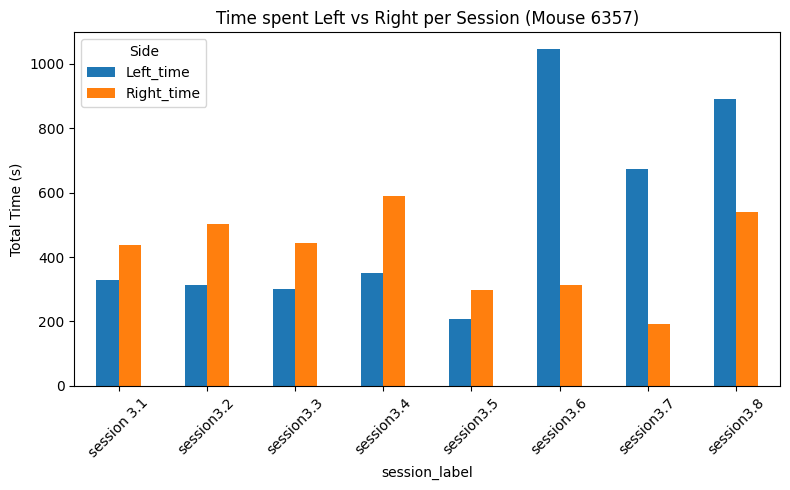

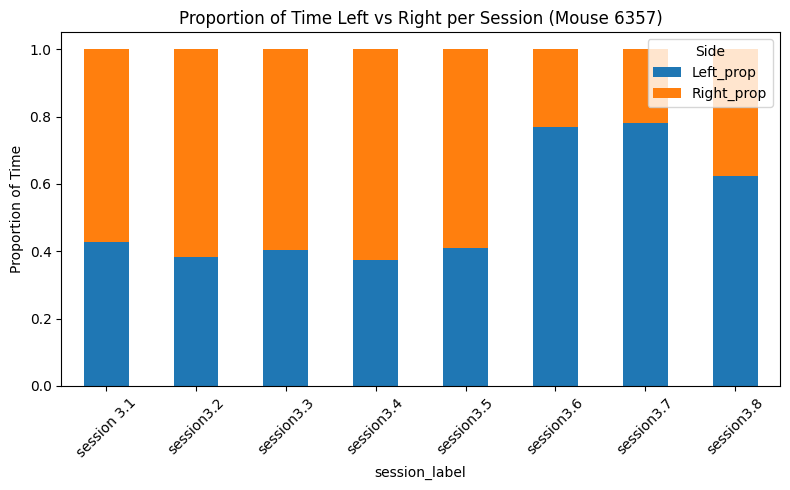

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       156.301     458.163   0.254370    0.745630
session3.2       703.579     925.395   0.431915    0.568085
session3.3       550.680     747.141   0.424311    0.575689
session3.4       717.527     353.018   0.670245    0.329755
session3.5       578.574     478.364   0.547406    0.452594
session3.6       487.704     648.758   0.429142    0.570858
session3.7       472.712     333.835   0.586094    0.413906
session3.8       371.618     363.105   0.505793    0.494207


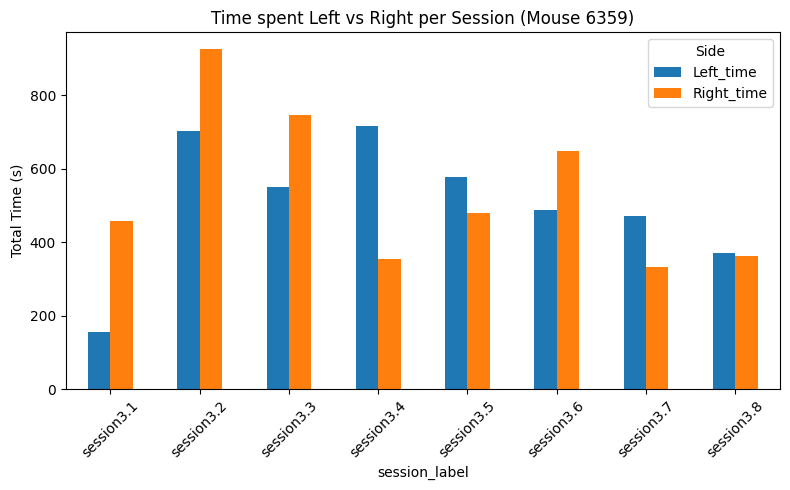

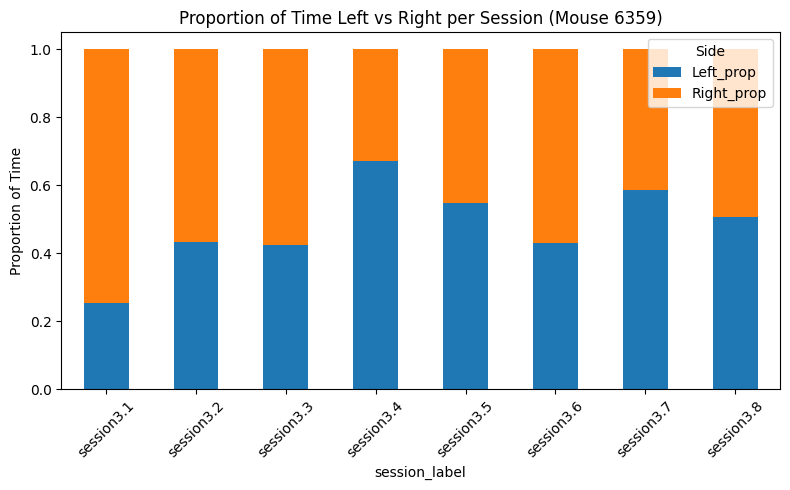

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       757.789     358.593   0.678790    0.321210
session3.2       436.509     461.240   0.486226    0.513774
session3.3       199.219     225.422   0.469147    0.530853
session3.4       110.139      99.277   0.525934    0.474066
session3.5       125.988     101.474   0.553886    0.446114
session3.6       153.284     134.303   0.533000    0.467000
session3.7       126.362     182.247   0.409457    0.590543
session3.8       311.785     261.598   0.543764    0.456236


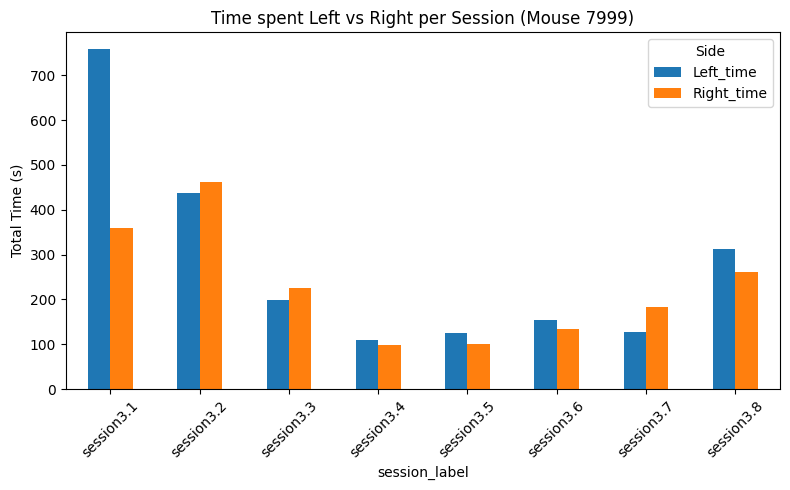

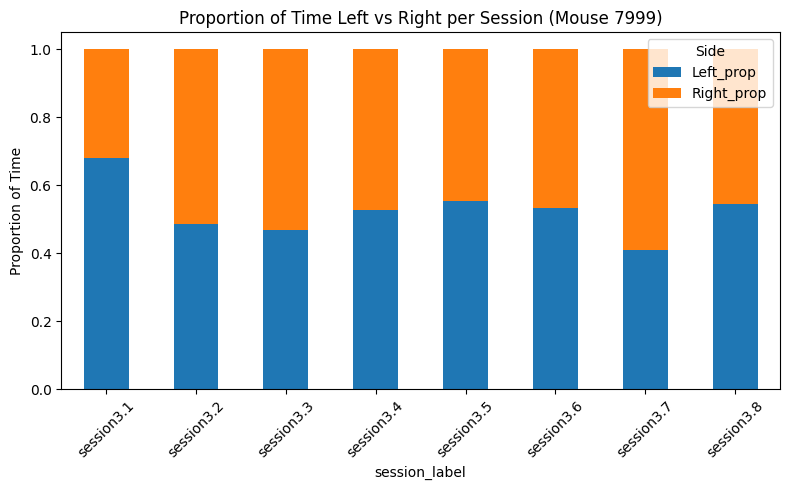

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       617.364     199.706   0.755583    0.244417
session3.2       122.380      98.392   0.554328    0.445672
session3.3       284.941     126.875   0.691913    0.308087
session3.4       147.302     180.005   0.450042    0.549958
session3.5       241.440     247.601   0.493701    0.506299
session3.6       170.645     227.343   0.428769    0.571231
session3.8       136.130     508.764   0.211089    0.788911
session3.7       228.758     420.052   0.352581    0.647419


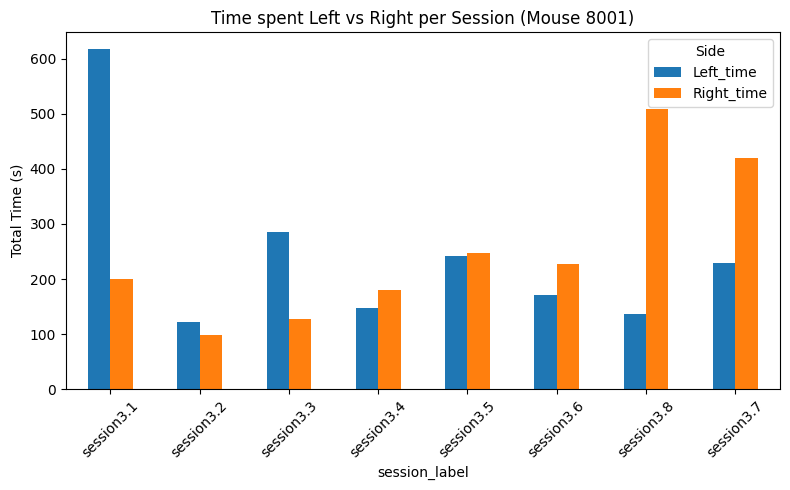

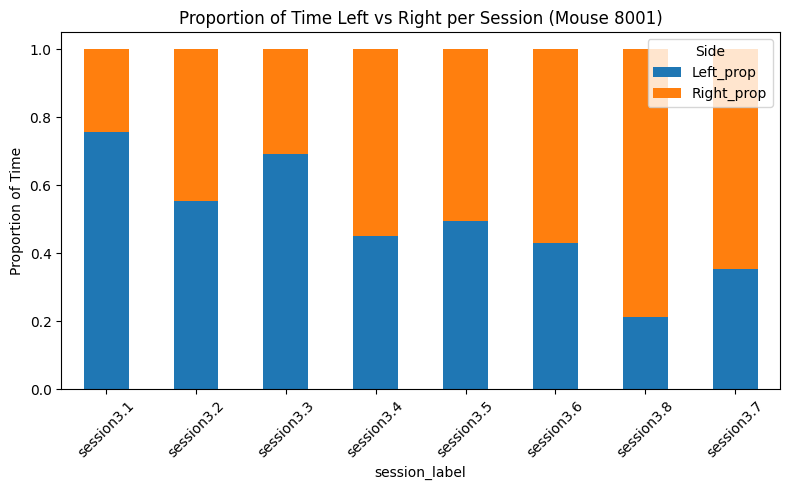

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       494.555     970.078   0.337665    0.662335
session3.2       134.369      87.516   0.605579    0.394421
session3.4       302.444     230.243   0.567771    0.432229
session3.5       419.877     359.038   0.539054    0.460946
session3.6       542.774     593.469   0.477692    0.522308
session3.3       262.842     496.189   0.346286    0.653714
session3.7       323.208     360.842   0.472492    0.527508


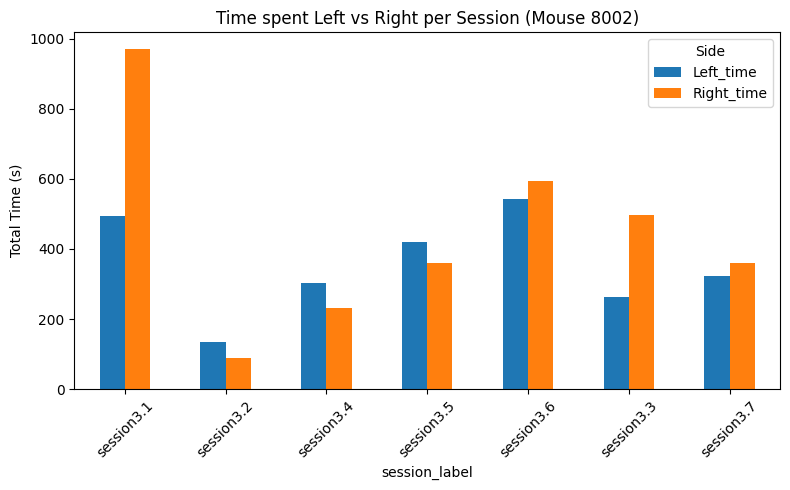

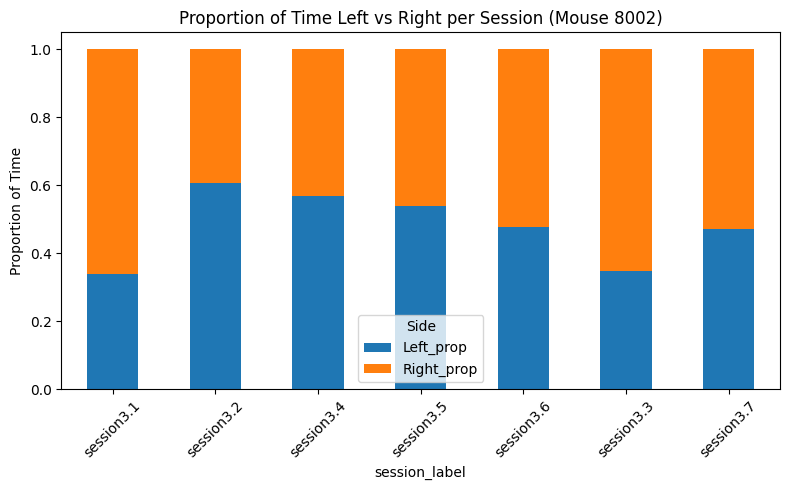

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      268.581     192.639   0.582327    0.417673
session_3.2      453.215     232.192   0.661235    0.338765
session_3.3      386.945     194.486   0.665505    0.334495
session_3.4      309.029     246.785   0.555994    0.444006
session_3.5      368.010     181.301   0.669948    0.330052
session_3.6      239.861     133.053   0.643207    0.356793
session_3.7      300.610      81.178   0.787374    0.212626
session_3.8      296.163     675.309   0.304860    0.695140


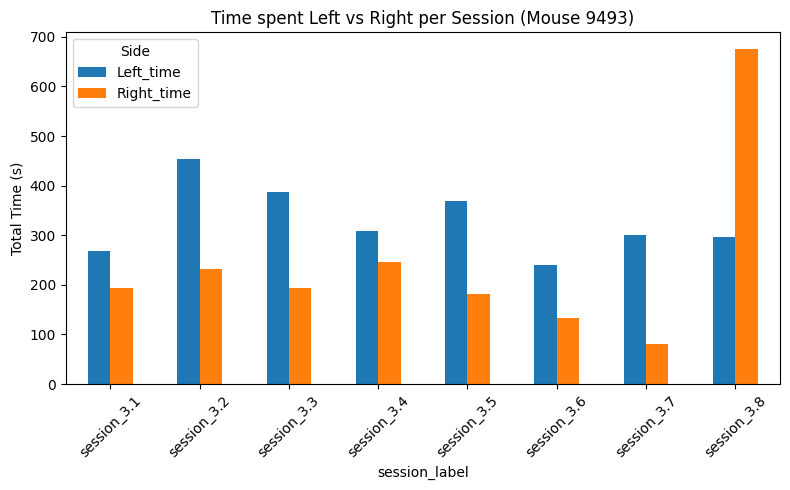

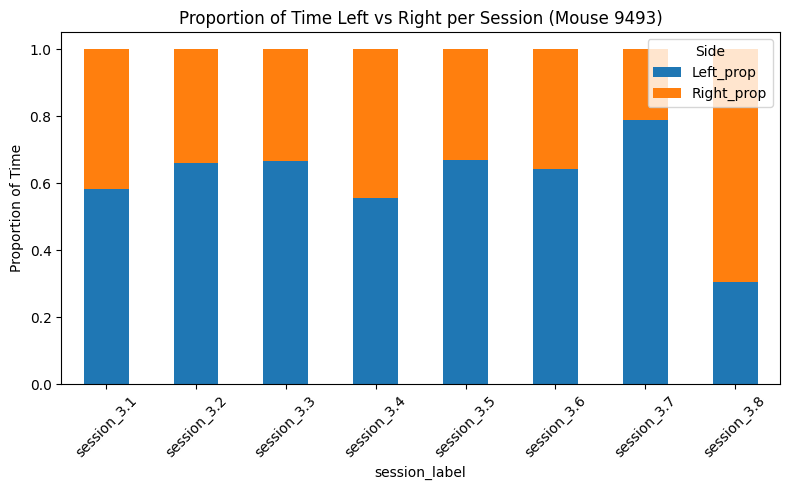

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      239.375     311.473   0.434557    0.565443
session_3.2      310.912     147.343   0.678469    0.321531
session_3.3      544.100     337.397   0.617245    0.382755
session_3.4        0.000       0.000   0.000000    0.000000
session_3.5      182.578     277.471   0.396866    0.603134
session_3.6      358.447     294.881   0.548648    0.451352
session_3.7      620.126     432.542   0.589099    0.410901


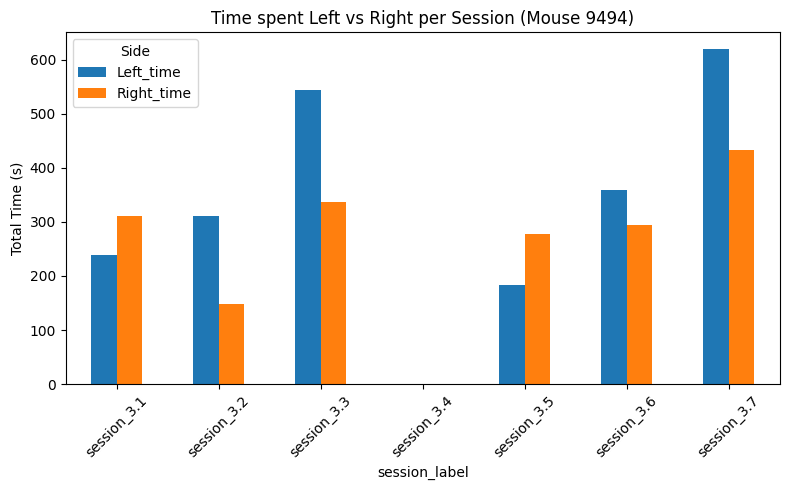

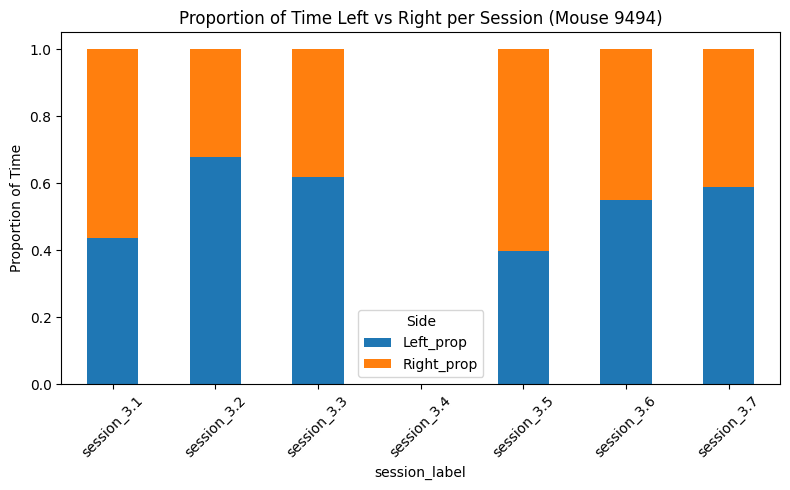

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      431.014     203.667   0.679103    0.320897
session_3.2      129.651     224.996   0.365578    0.634422
session_3.3      426.092     375.163   0.531781    0.468219
session_3.4      396.559     396.150   0.500258    0.499742
session_3.5      235.298     545.342   0.301417    0.698583
session_3.6      426.337     430.907   0.497334    0.502666
session_3.7      630.078     282.417   0.690500    0.309500
session_3.8      315.794     428.519   0.424276    0.575724


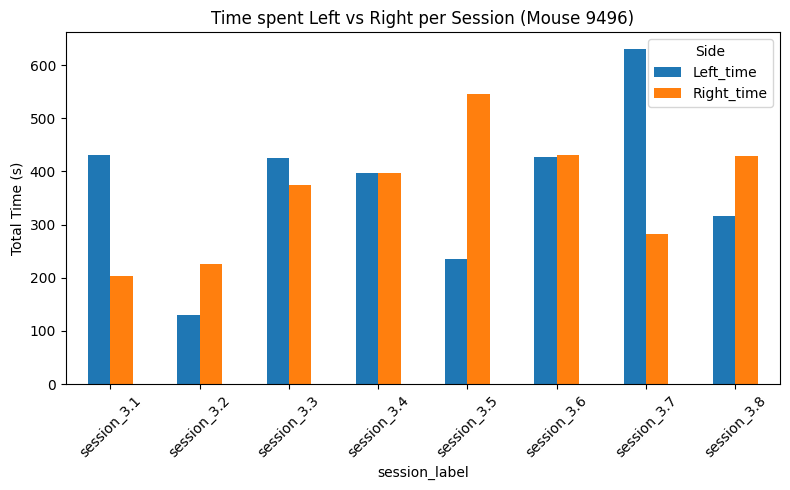

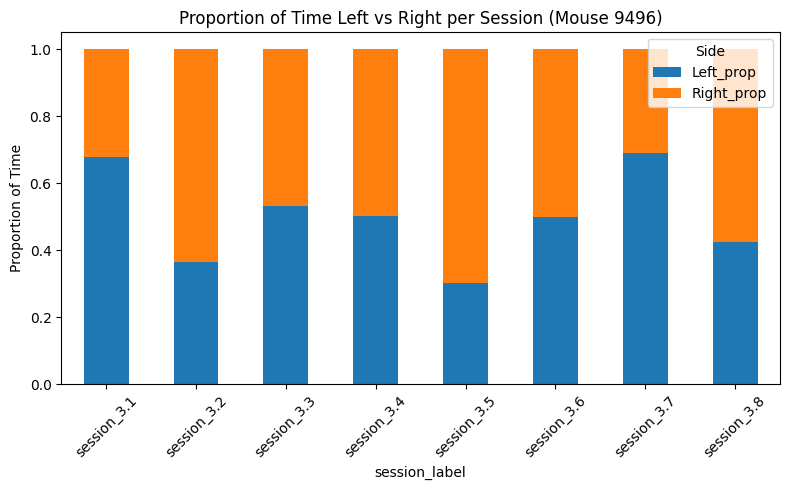

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      554.963     281.631   0.663360    0.336640
session_3.2      325.726     270.207   0.546582    0.453418
session_3.3      588.756     309.492   0.655449    0.344551
session_3.4      340.181     173.979   0.661625    0.338375
session_3.5      287.231     185.917   0.607064    0.392936
session_3.6      329.442     186.602   0.638399    0.361601
session_3.7      370.943     132.896   0.736233    0.263767
session_3.8      246.054     310.421   0.442165    0.557835


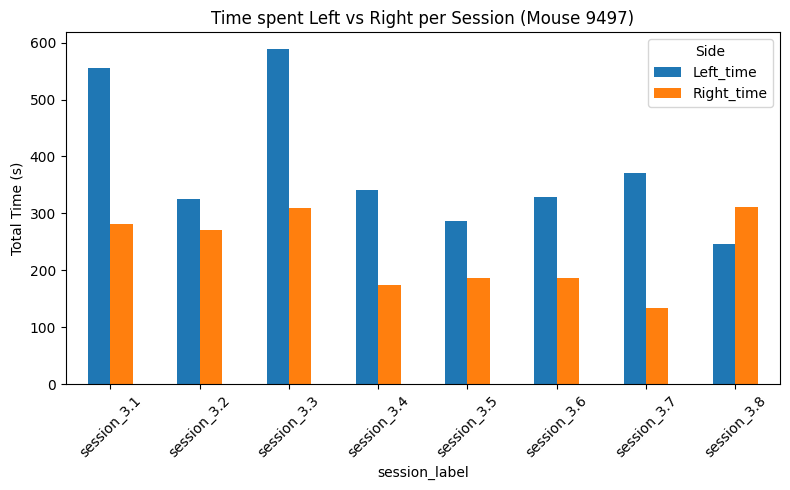

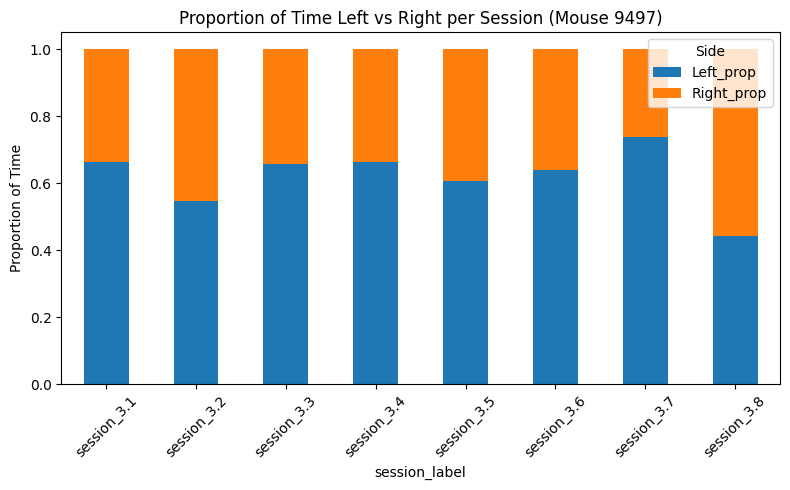

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      501.175     210.413   0.704305    0.295695
session_3.2      431.788     347.950   0.553760    0.446240
session_3.3      293.186     352.632   0.453976    0.546024
session_3.4      341.090     431.297   0.441605    0.558395
session_3.5      355.171     498.597   0.416004    0.583996
session_3.6      139.014     603.979   0.187100    0.812900
session_3.7      259.946     685.878   0.274835    0.725165
session_3.8      295.445     782.020   0.274204    0.725796
session_3.8      204.242    1299.708   0.135804    0.864196
session_3.9      192.533     347.401   0.356586    0.643414
session_3.10     219.918     396.410   0.356820    0.643180
session_3.11     237.765     559.700   0.298151    0.701849
session_3.12     248.338     222.812   0.527089    0.472911


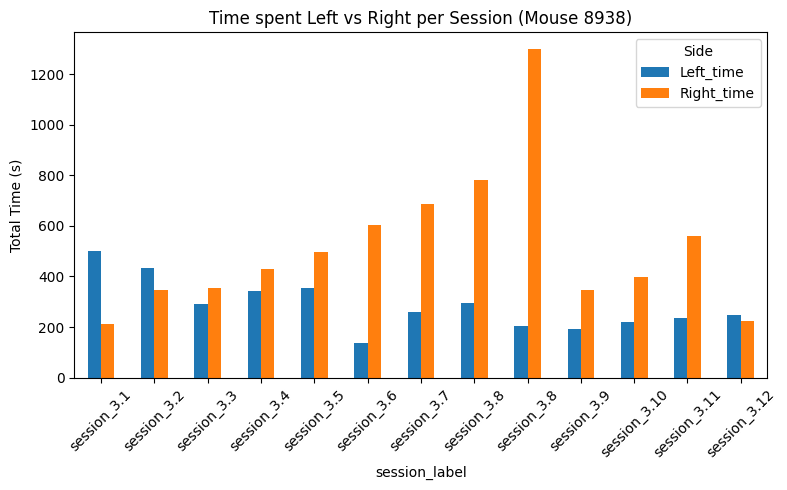

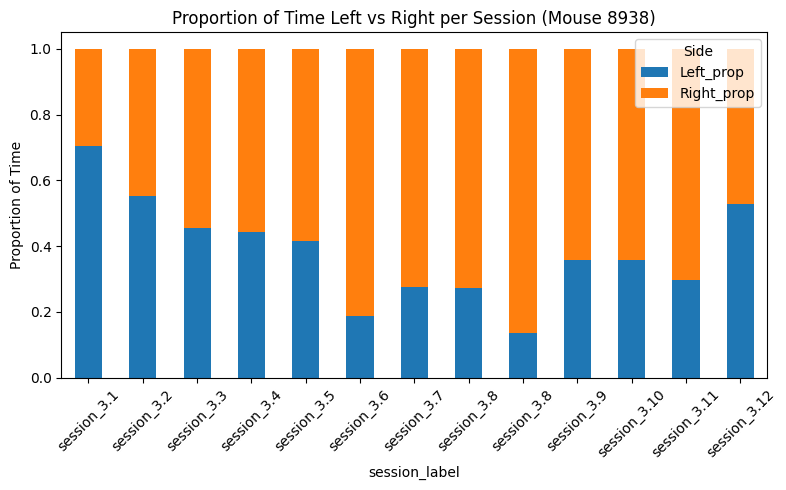

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       235.432     313.073   0.429225    0.570775
session_3.1        0.000       0.000   0.000000    0.000000
session_3.2      369.715     129.119   0.741158    0.258842
session_3.3      222.819     402.953   0.356071    0.643929
session_3.4      259.269     294.002   0.468611    0.531389
session_3.5      391.688     323.552   0.547632    0.452368
session_3.6      249.375     384.089   0.393669    0.606331
session_3.7      135.421     431.883   0.238710    0.761290
session_3.8      119.512     295.281   0.288124    0.711876
session_3.8      211.244     901.774   0.189794    0.810206
session_3.9      295.567     327.839   0.474116    0.525884
session_3.10     125.015     298.284   0.295335    0.704665
session_3.11     114.297     252.831   0.311327    0.688673
session_3.12     282.993     673.731   0.295794    0.704206


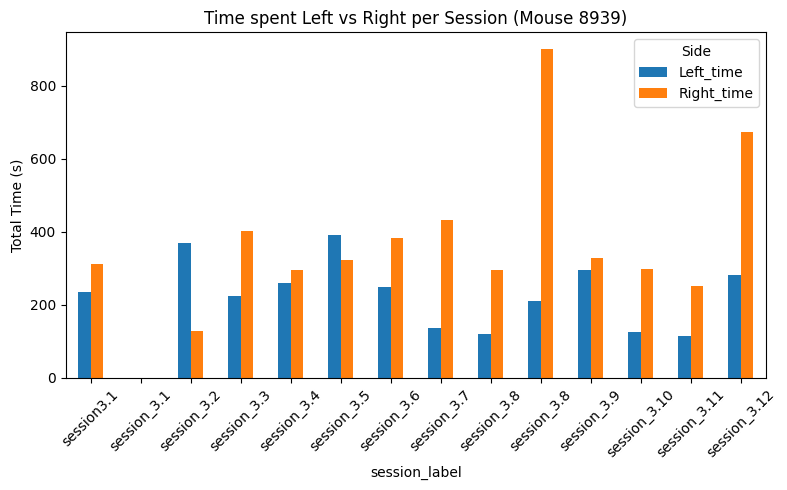

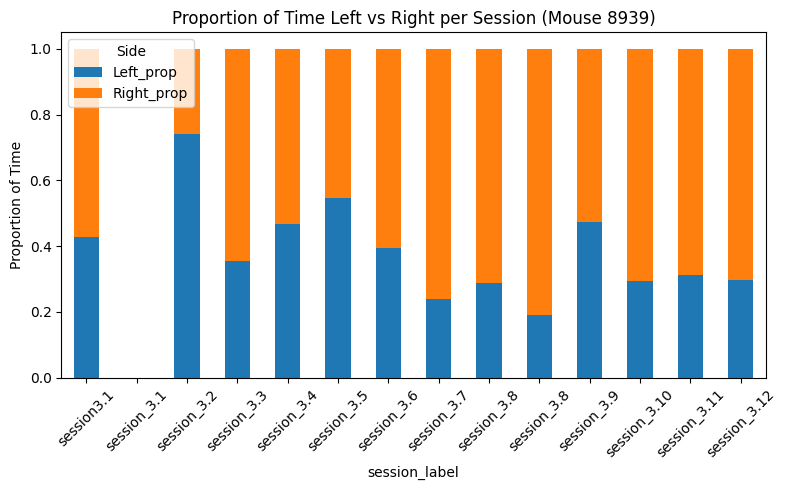

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      648.363     324.365   0.666541    0.333459
session_3.2      483.341     288.957   0.625848    0.374152
session_3.3      678.379     490.002   0.580615    0.419385
session_3.4      598.102     701.405   0.460253    0.539747
session_3.5      433.174     544.297   0.443158    0.556842
session_3.6      301.545     466.132   0.392802    0.607198
session_3.7      233.456     522.280   0.308912    0.691088
session_3.8      367.912     586.489   0.385490    0.614510
session_3.9      372.127     516.476   0.418778    0.581222
session_3.10     296.973     554.022   0.348971    0.651029
session_3.11     305.706     718.496   0.298482    0.701518
session_3.12     402.084     772.431   0.342340    0.657660


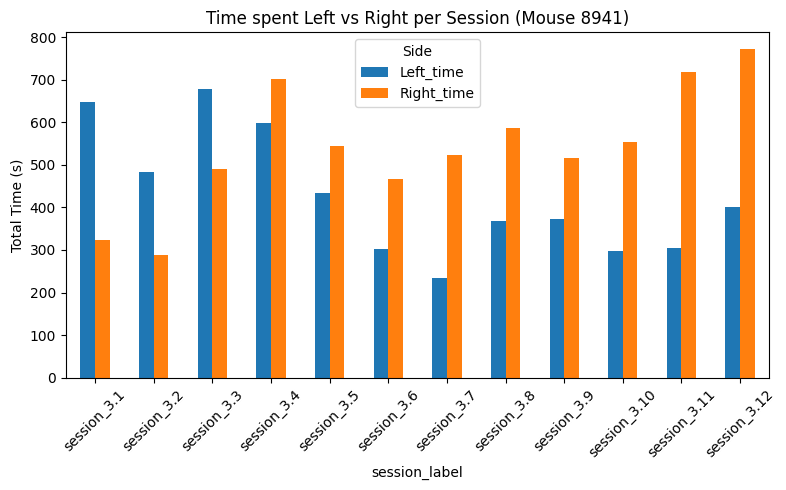

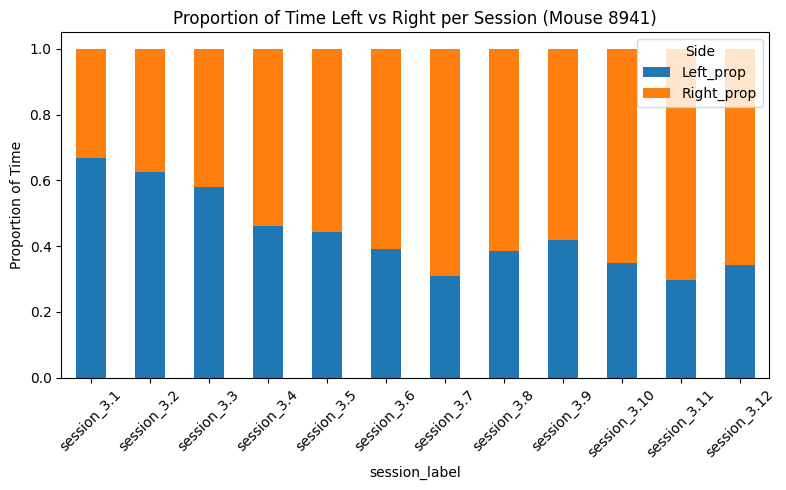

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      429.423     424.077   0.503132    0.496868
session_3.2      343.106     263.918   0.565226    0.434774
session_3.3      157.997     348.682   0.311829    0.688171
session_3.4      403.299     707.911   0.362937    0.637063
session_3.5      217.057     593.455   0.267802    0.732198
session_3.6      273.079     597.816   0.313561    0.686439
session_3.7      182.850     518.162   0.260837    0.739163
session_3.8      293.346     465.221   0.386711    0.613289
session_3.9      317.518     294.183   0.519074    0.480926
session_3.10     244.832     332.884   0.423793    0.576207
session_3.11     195.157     431.742   0.311305    0.688695
session_3.12     228.697     381.771   0.374626    0.625374


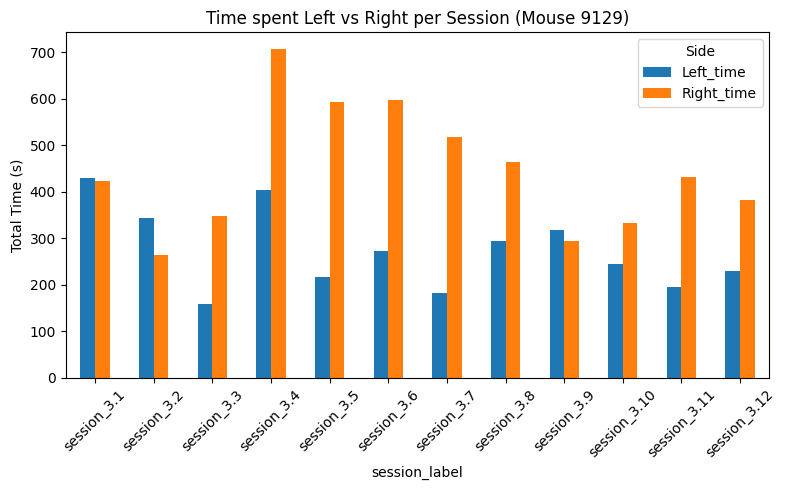

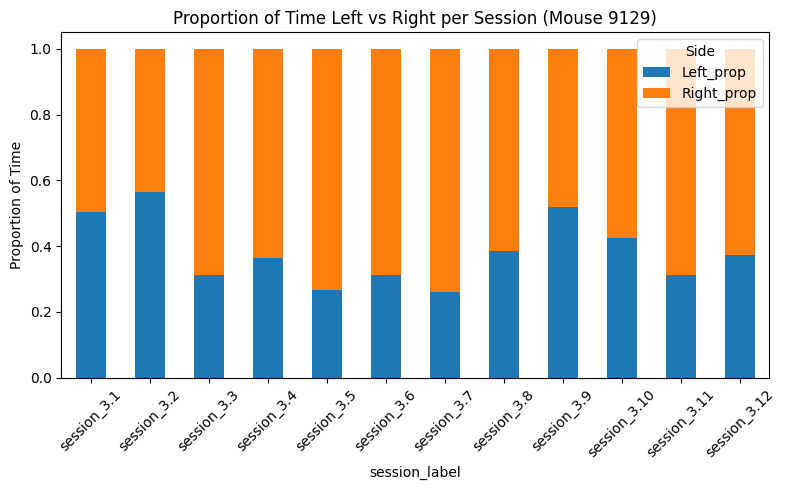

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      289.143     313.218   0.480016    0.519984
session_3.2      350.273     381.245   0.478830    0.521170
session_3.3      243.072     249.030   0.493946    0.506054
session_3.4      209.240     205.274   0.504784    0.495216
session_3.5      298.166     171.991   0.634184    0.365816
session_3.6      230.648     242.004   0.487987    0.512013
session_3.7      215.048     233.498   0.479434    0.520566
session_3.8      213.942     170.837   0.556013    0.443987


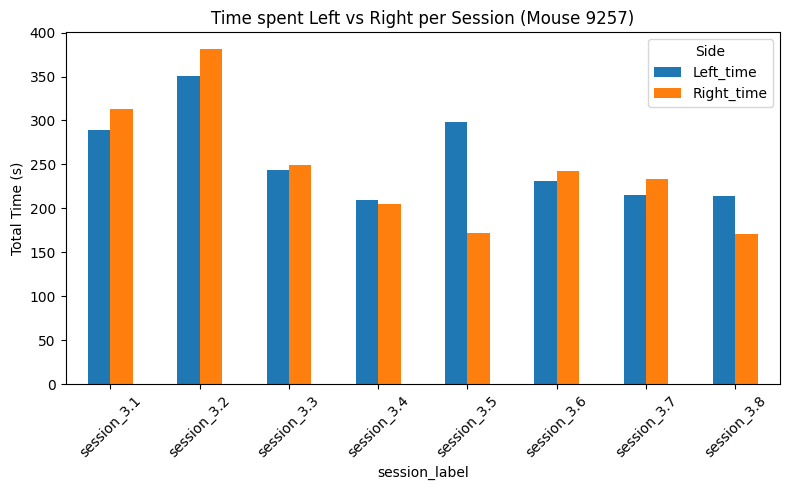

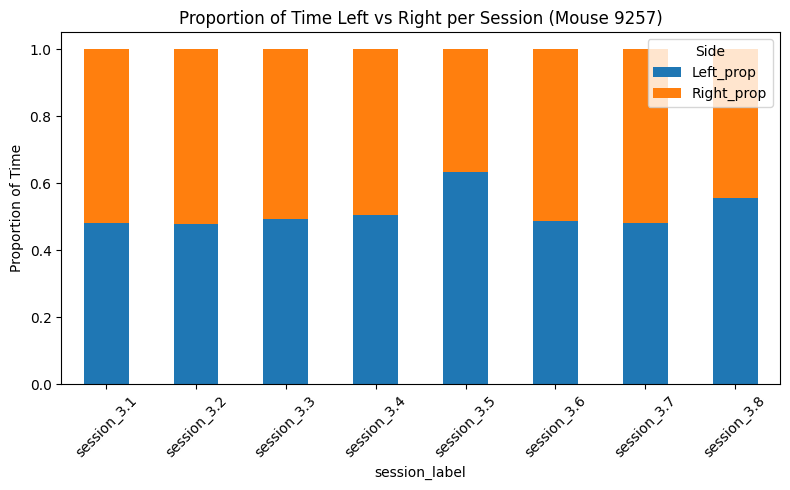

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      182.686     157.390   0.537192    0.462808
session_3.2      104.465     134.578   0.437013    0.562987
session_3.3      130.021      93.667   0.581261    0.418739
session_3.4      153.583     120.019   0.561337    0.438663
session_3.5      137.766     110.696   0.554475    0.445525
session_3.6      138.288     169.272   0.449629    0.550371
session_3.7      136.992     101.590   0.574193    0.425807
session_3.8      102.962      78.908   0.566130    0.433870


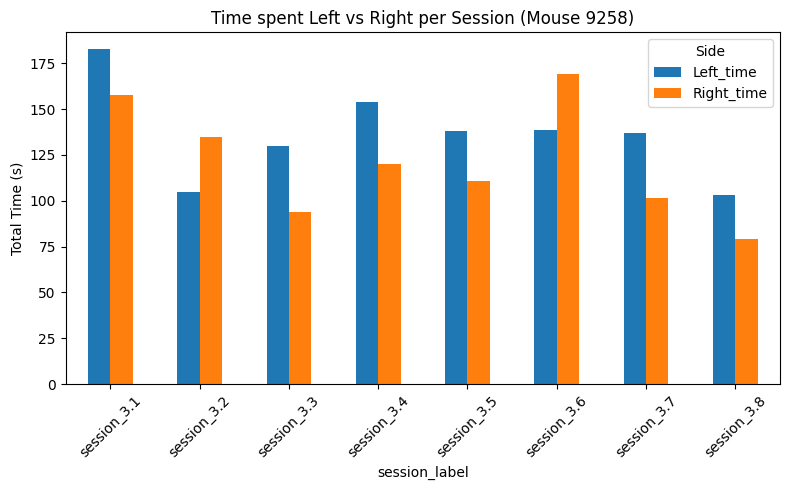

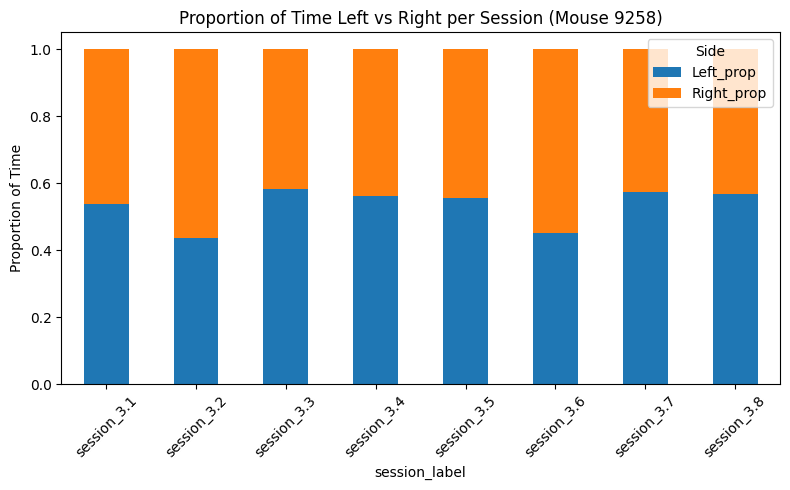

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      466.107     385.321   0.547441    0.452559
session_3.2      362.242     236.823   0.604679    0.395321
session_3.3      419.233     164.616   0.718050    0.281950
session_3.4      353.778     223.388   0.612957    0.387043
session_3.5      491.132     290.206   0.628578    0.371422
session_3.6       72.633       0.000   1.000000    0.000000
session_3.7      186.264     184.129   0.502882    0.497118
session_3.8      286.742     214.230   0.572371    0.427629


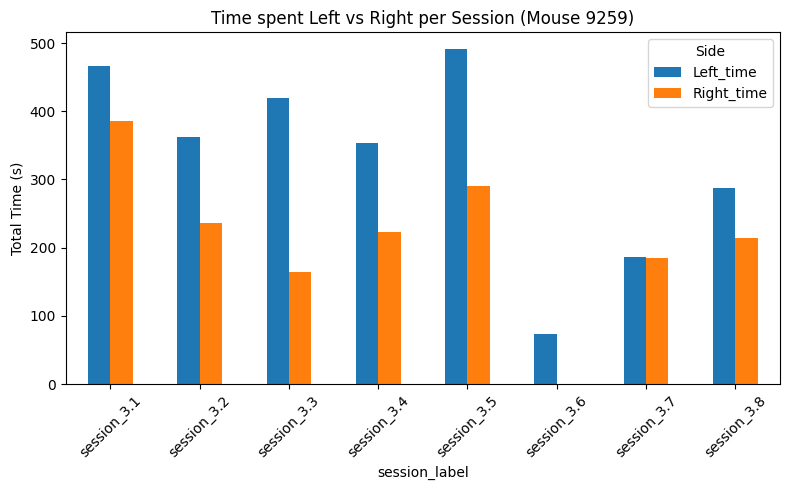

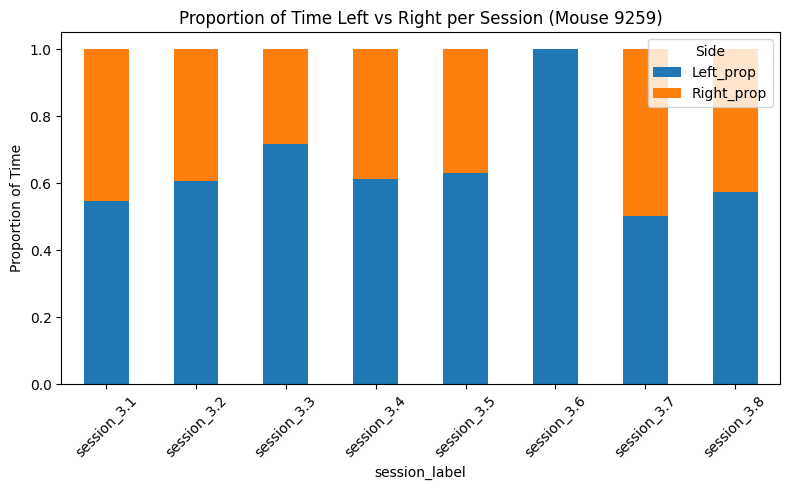

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      239.853     112.284   0.681135    0.318865
session_3.2      462.815     236.379   0.661926    0.338074
session_3.3       91.353       0.000   1.000000    0.000000
session_3.4      387.435     359.333   0.518816    0.481184
session_3.5      300.240     366.149   0.450548    0.549452
session_3.6      388.594     282.047   0.579437    0.420563
session_3.7      292.276     275.611   0.514673    0.485327
session_3.8      174.794     354.080   0.330502    0.669498


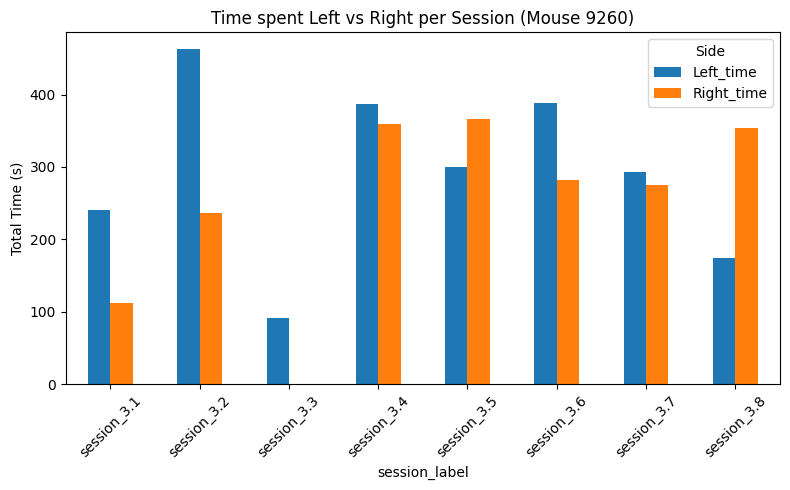

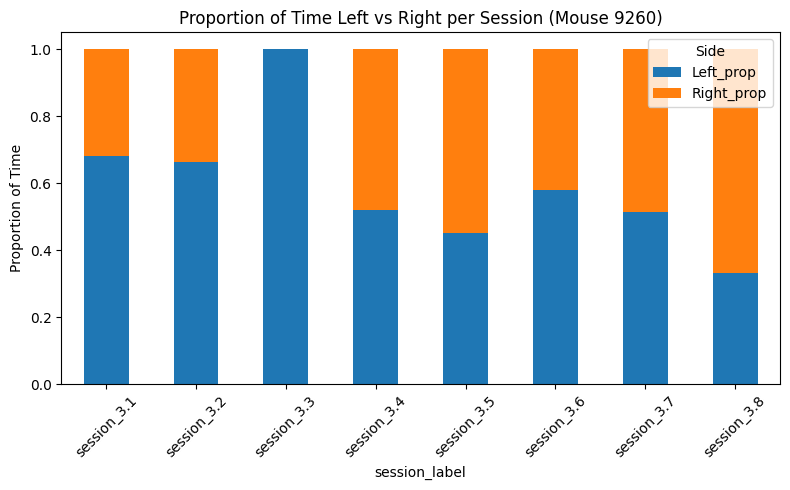

In [41]:
mice_that_matter = ["6357", "6359", "7999", "8001", "8002", "9493", "9494", "9496", "9497", "8938", "8939", "8941", "9129", "9257", "9258", "9259", "9260"]


for i in mice_that_matter:
    filepaths = []
    for j in all_mice_sessions_sorted:
        if i in j and "session3" in j: 
            filepaths.append(j)

    summary = calculate_left_right_time(filepaths)
    # Relabel index to "session 1", "session 2", ...
    summary["session_label"] = [re.search(r"(session[_\s]?3\.\d+)", p, flags=re.I).group(1)
                                if re.search(r"(session[_\s]?3\.\d+)", p, flags=re.I) else f"session3.?"
                                for p in summary.index]
    summary = summary.set_index("session_label")
    print(summary)

    plot_left_right(summary, mouse_id=i)

Below is a little script that just plots mean ± SD for the total time spent in left vs right per mouse + proportions normalised by 1

Mean ± SD per mouse (across session3 files)


Left_time_mean  Right_time_mean  Left_prop_mean  Right_prop_mean  \
mouse_id                                                                     
6357             513.337          414.591           0.521            0.479   
6359             504.837          538.472           0.481            0.519   
7999             277.634          228.019           0.525            0.475   
8001             243.620          251.092           0.492            0.508   
8002             354.296          442.482           0.478            0.522   
8938             286.124          518.369           0.383            0.617   
8939             215.168          359.172           0.359            0.569   
8941             426.764          540.446           0.439            0.561   
9129             273.863          446.652           0.383            0.617   
9257             256.192          245.887           0.514            0.486   
9258             135.845          120.765           0.533            0.467   
9259             329.766          212.339           0.648            0.352   
9260             292.170          248.235           0.592            0.408   
9493             327.802          242.118           0.609            0.391   
9494             322.220          257.301           0.466            0.391   
9496             373.853          360.895           0.499            0.501   
9497             380.412          231.393           0.619            0.381   

          Left_time_sd  Right_time_sd  Left_prop_sd  Right_prop_sd  n_sessions  
mouse_id                                                                        
6357           313.910        135.726         0.175          0.175           8  
6359           182.375        214.643         0.126          0.126           8  
7999           224.405        128.753         0.078          0.078           8  
8001           161.455        142.408         0.176          0.176           8  
8002           141.353        285.398         0.104          0.104           7  
8938           100.553        289.810         0.157          0.157          13  
8939           107.352        216.766         0.175          0.217          14  
8941           146.666        145.432         0.123          0.123          12  
9129            86.364        135.592         0.101          0.101          12  
9257            50.998         71.490         0.055          0.055           8  
9258            25.689         31.262         0.057          0.057           8  
9259           142.841        110.112         0.155          0.155           8  
9260           122.124        130.705         0.200          0.200           8  
9493            69.874        182.830         0.141          0.141           8  
9494           211.978        141.523         0.228          0.199           7  
9496           149.819        116.060         0.138          0.138           8  
9497           124.158         69.125         0.089          0.089           8

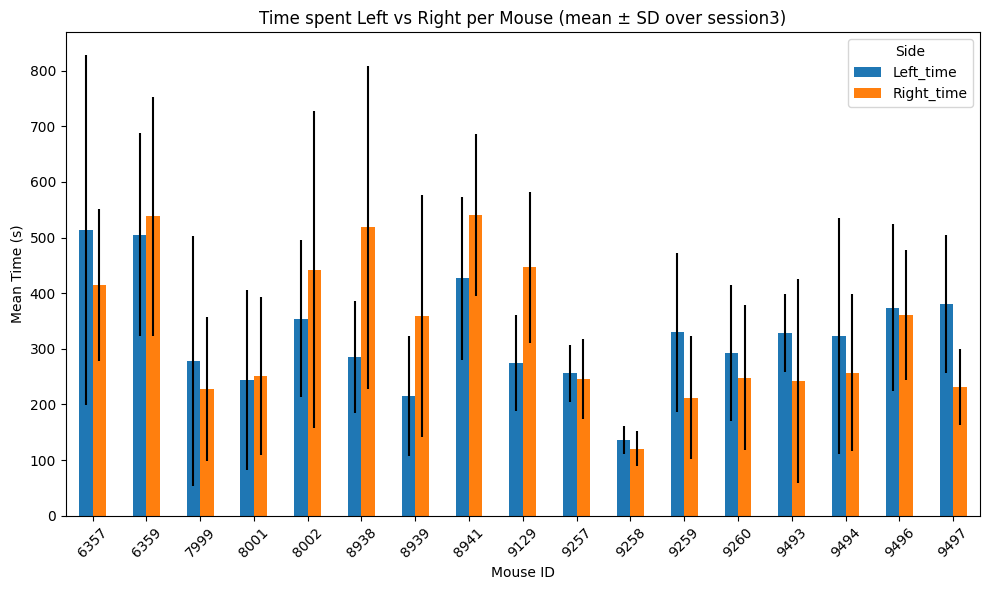

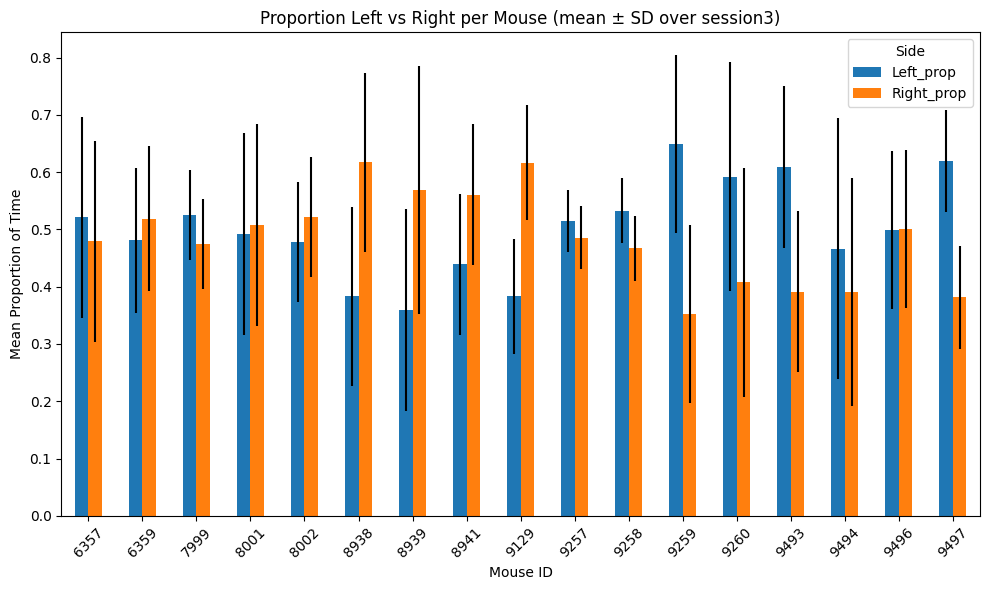

In [75]:

def extract_mouse_id(path):
    m = re.search(r"mouse\s?(\d+)", path.replace("\\", "/"))
    return m.group(1) if m else "unknown"

# --- Collect all session3 files ---
all_files = [p for p in all_mice_sessions_sorted if "session3" in p]

# --- Build per-file summary ---
summary_per_file = calculate_left_right_time(all_files)
summary_per_file["mouse_id"] = summary_per_file.index.map(extract_mouse_id)

# --- Aggregate per mouse: mean, SD, N ---
group = summary_per_file.groupby("mouse_id")

mean_df = group[["Left_time", "Right_time", "Left_prop", "Right_prop"]].mean()
std_df  = group[["Left_time", "Right_time", "Left_prop", "Right_prop"]].std(ddof=1)
n_df    = group.size().rename("n_sessions")

# Build tidy summary table
summary_table = pd.concat(
    [mean_df.add_suffix("_mean"), std_df.add_suffix("_sd"), n_df],
    axis=1
).sort_index()

# --- Print summary table ---
print("Mean ± SD per mouse (across session3 files)")
display(summary_table.round(3))

# --- Plot absolute times (mean ± SD) ---
ax = mean_df[["Left_time", "Right_time"]].plot(
    kind="bar", rot=45, figsize=(10,6),
    yerr=std_df[["Left_time", "Right_time"]].T.values
)
ax.set_ylabel("Mean Time (s)")
ax.set_xlabel("Mouse ID")
ax.set_title("Time spent Left vs Right per Mouse (mean ± SD over session3)")
ax.legend(title="Side")
plt.tight_layout()
plt.show()

# --- Plot proportions (mean ± SD) ---
ax = mean_df[["Left_prop", "Right_prop"]].plot(
    kind="bar", rot=45, figsize=(10,6),
    yerr=std_df[["Left_prop", "Right_prop"]].T.values
)
ax.set_ylabel("Mean Proportion of Time")
ax.set_xlabel("Mouse ID")
ax.set_title("Proportion Left vs Right per Mouse (mean ± SD over session3)")
ax.legend(title="Side")
plt.tight_layout()
plt.show()


this cell just gets the left vs right for sessions 1 + 3


=== Mouse 6357 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session1.1       356.769     482.271   0.425211    0.574789
session_3.1      328.062     438.201   0.428132    0.571868
session3.2       312.882     503.640   0.383189    0.616811
session3.3       300.370     443.856   0.403601    0.596399
session3.4       350.017     588.219   0.373059    0.626941
session3.5       207.109     298.344   0.409749    0.590251
session3.6      1044.719     313.499   0.769184    0.230816
session3.7       674.567     190.979   0.779354    0.220646
session3.8       888.971     539.990   0.622110    0.377890


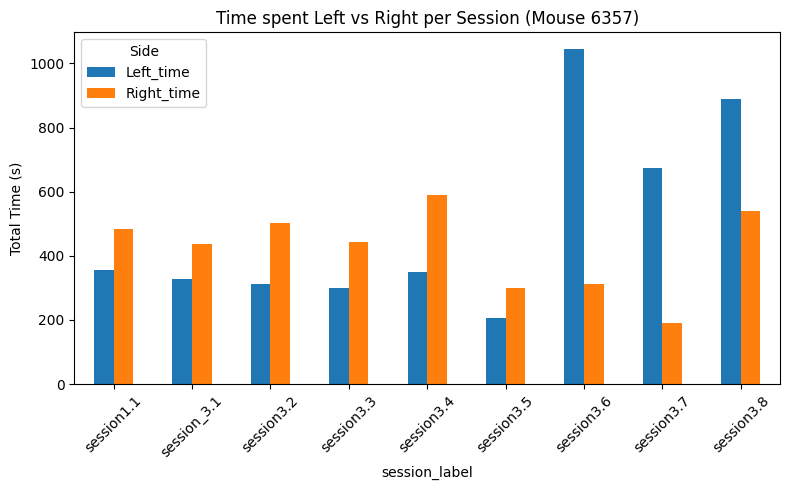

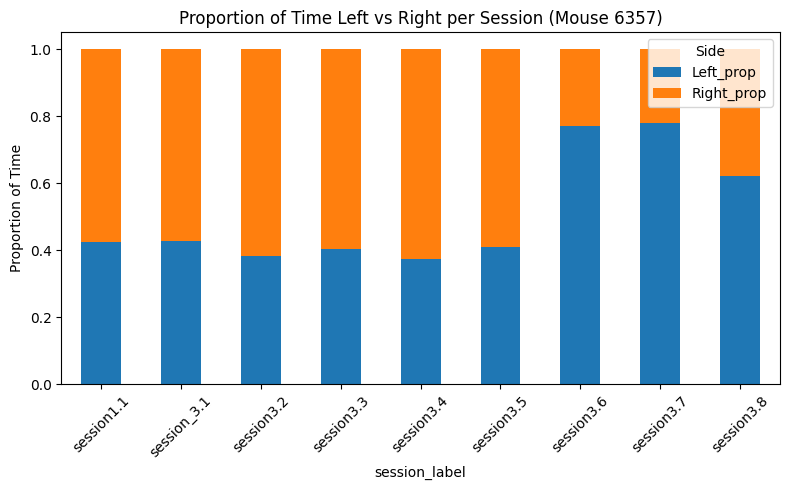


=== Mouse 6359 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session1.1       264.268     293.803   0.473538    0.526462
session3.1       156.301     458.163   0.254370    0.745630
session3.2       703.579     925.395   0.431915    0.568085
session3.3       550.680     747.141   0.424311    0.575689
session3.4       717.527     353.018   0.670245    0.329755
session3.5       578.574     478.364   0.547406    0.452594
session3.6       487.704     648.758   0.429142    0.570858
session3.7       472.712     333.835   0.586094    0.413906
session3.8       371.618     363.105   0.505793    0.494207


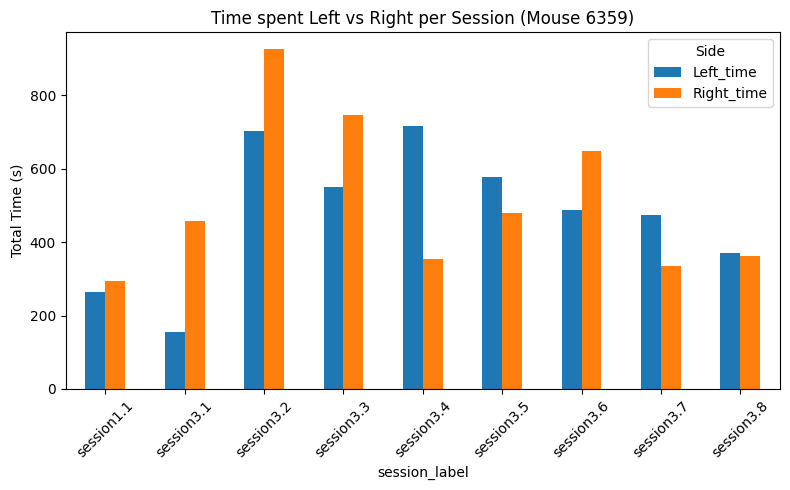

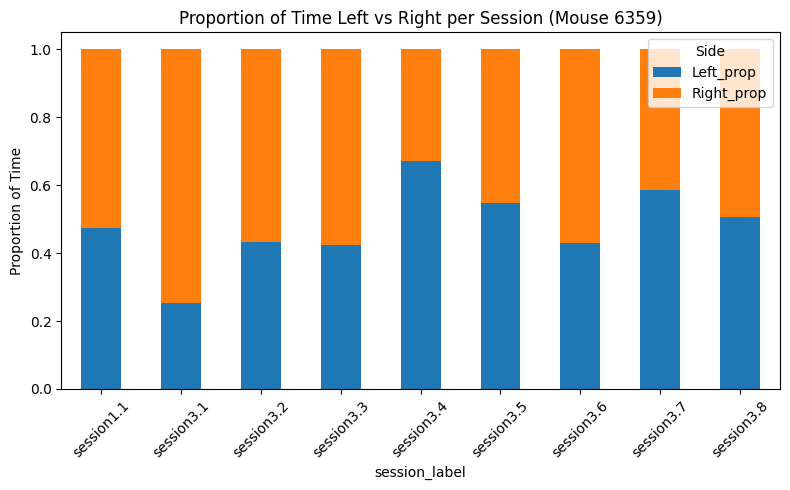


=== Mouse 7999 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session1.1       578.602     451.757   0.561554    0.438446
session3.1       757.789     358.593   0.678790    0.321210
session3.2       436.509     461.240   0.486226    0.513774
session3.3       199.219     225.422   0.469147    0.530853
session3.4       110.139      99.277   0.525934    0.474066
session3.5       125.988     101.474   0.553886    0.446114
session3.6       153.284     134.303   0.533000    0.467000
session3.7       126.362     182.247   0.409457    0.590543
session3.8       311.785     261.598   0.543764    0.456236


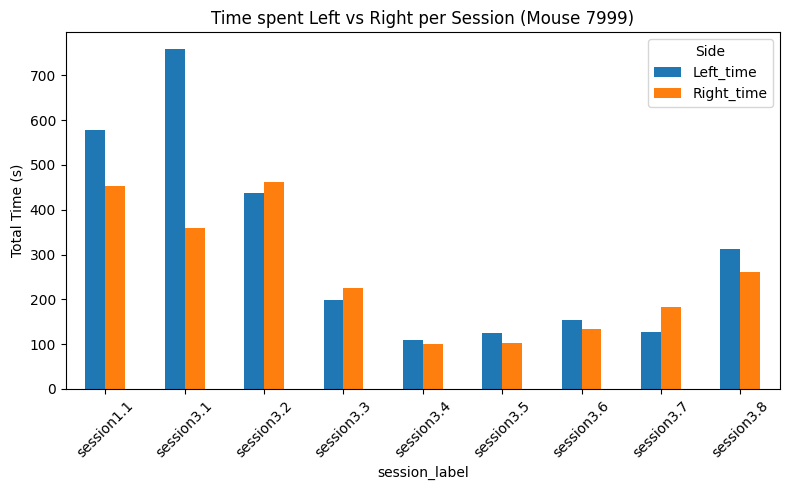

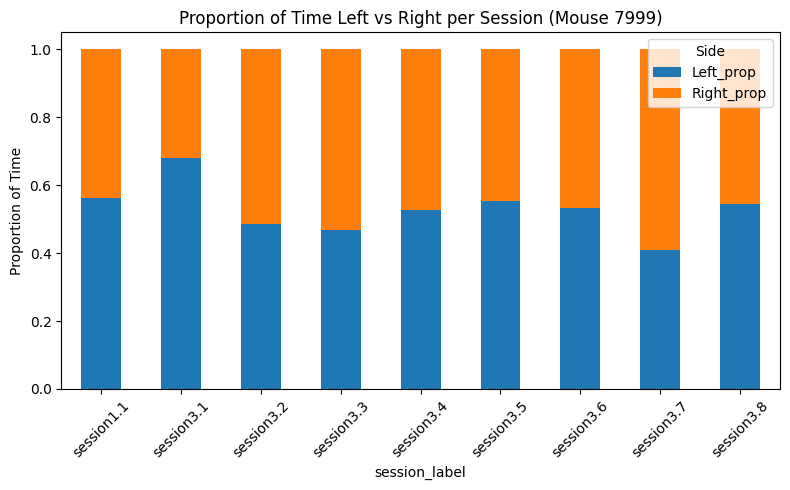


=== Mouse 8001 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session1.1       178.773     253.822   0.413257    0.586743
session3.1       617.364     199.706   0.755583    0.244417
session3.2       122.380      98.392   0.554328    0.445672
session3.3       284.941     126.875   0.691913    0.308087
session3.4       147.302     180.005   0.450042    0.549958
session3.5       241.440     247.601   0.493701    0.506299
session3.6       170.645     227.343   0.428769    0.571231
session3.7       228.758     420.052   0.352581    0.647419
session3.8       136.130     508.764   0.211089    0.788911


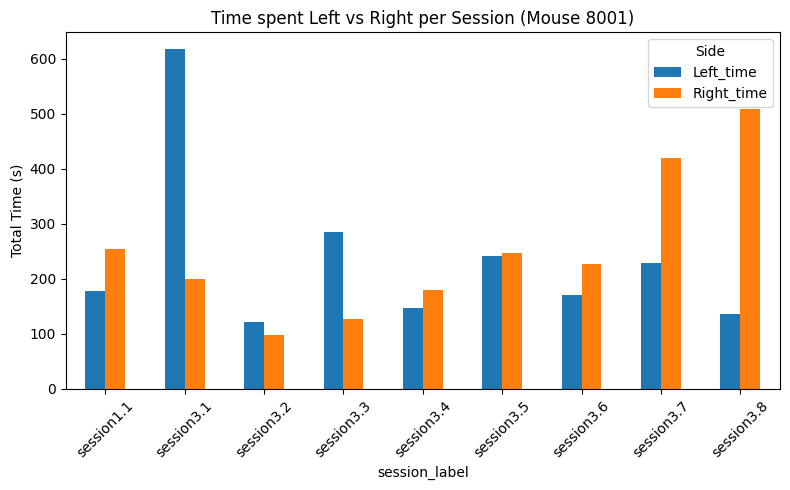

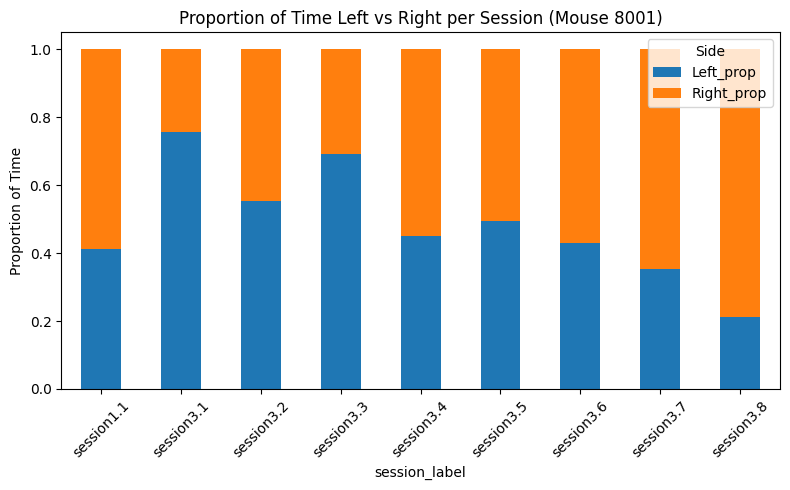


=== Mouse 8002 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       494.555     970.078   0.337665    0.662335
session3.2       134.369      87.516   0.605579    0.394421
session3.3       262.842     496.189   0.346286    0.653714
session3.4       302.444     230.243   0.567771    0.432229
session3.5       419.877     359.038   0.539054    0.460946
session3.6       542.774     593.469   0.477692    0.522308
session3.7       323.208     360.842   0.472492    0.527508


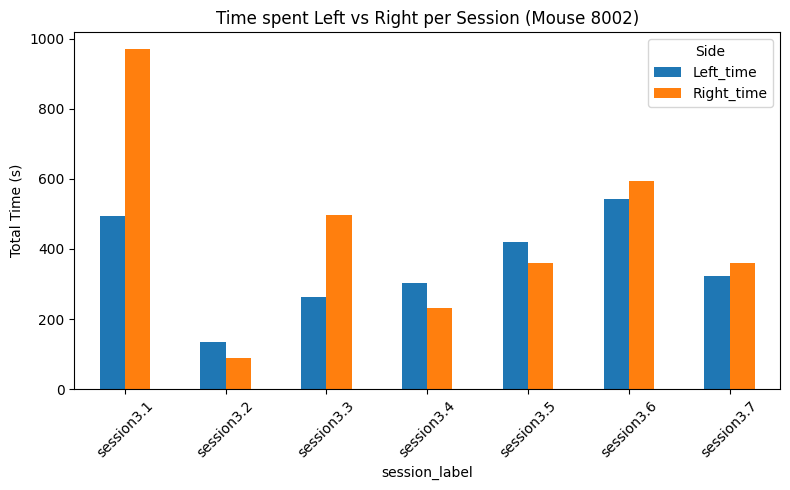

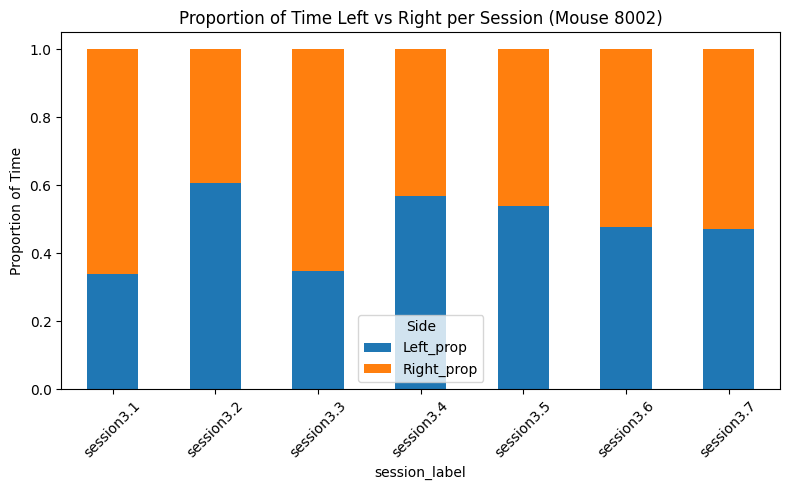


=== Mouse 9493 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_1.1      328.638     297.612   0.524771    0.475229
session_3.1      268.581     192.639   0.582327    0.417673
session_3.2      453.215     232.192   0.661235    0.338765
session_3.3      386.945     194.486   0.665505    0.334495
session_3.4      309.029     246.785   0.555994    0.444006
session_3.5      368.010     181.301   0.669948    0.330052
session_3.6      239.861     133.053   0.643207    0.356793
session_3.7      300.610      81.178   0.787374    0.212626
session_3.8      296.163     675.309   0.304860    0.695140


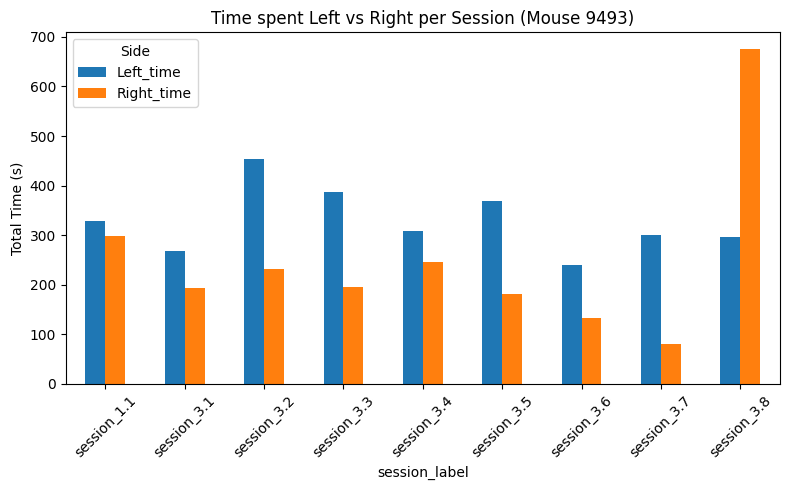

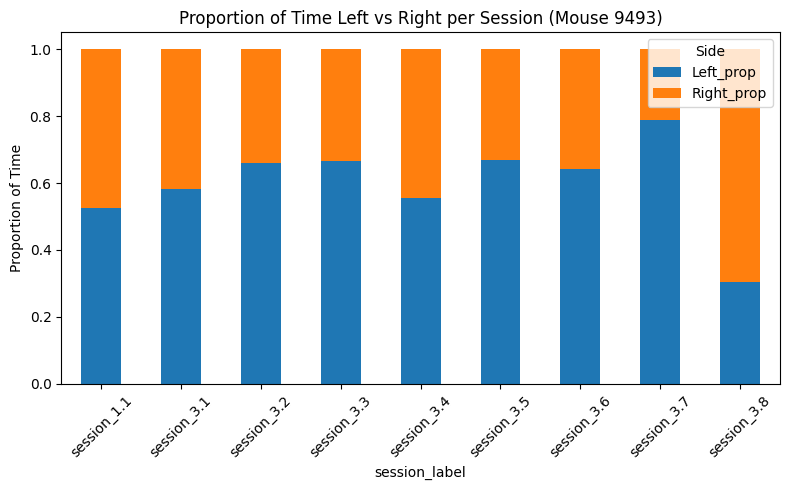


=== Mouse 9494 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_1.1      515.343     287.220   0.642122    0.357878
session_3.1      239.375     311.473   0.434557    0.565443
session_3.2      310.912     147.343   0.678469    0.321531
session_3.3      544.100     337.397   0.617245    0.382755
session_3.4        0.000       0.000   0.000000    0.000000
session_3.5      182.578     277.471   0.396866    0.603134
session_3.6      358.447     294.881   0.548648    0.451352
session_3.7      620.126     432.542   0.589099    0.410901


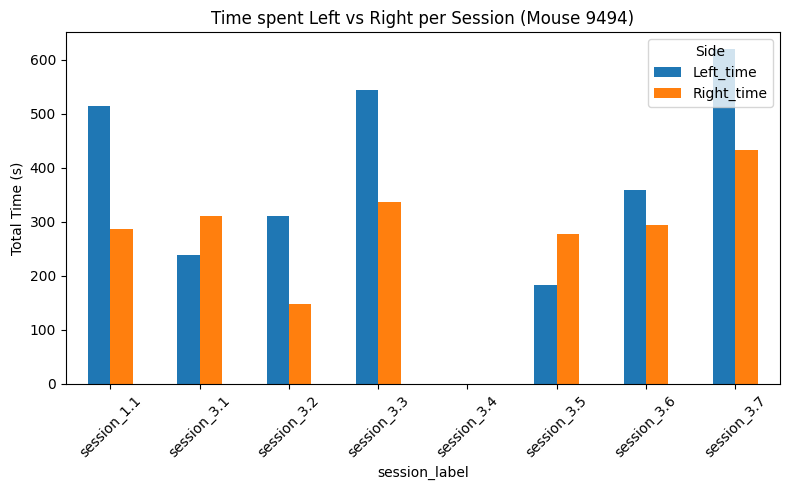

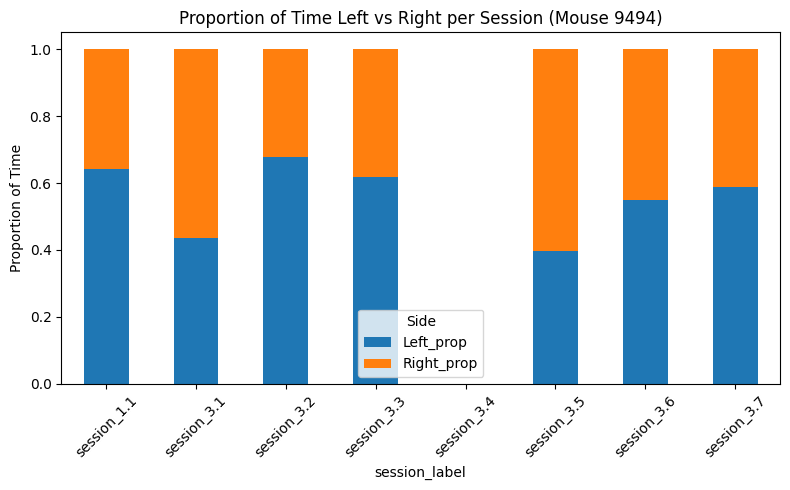


=== Mouse 9496 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_1.1      469.869     297.277   0.612490    0.387510
session_3.1      431.014     203.667   0.679103    0.320897
session_3.2      129.651     224.996   0.365578    0.634422
session_3.3      426.092     375.163   0.531781    0.468219
session_3.4      396.559     396.150   0.500258    0.499742
session_3.5      235.298     545.342   0.301417    0.698583
session_3.6      426.337     430.907   0.497334    0.502666
session_3.7      630.078     282.417   0.690500    0.309500
session_3.8      315.794     428.519   0.424276    0.575724


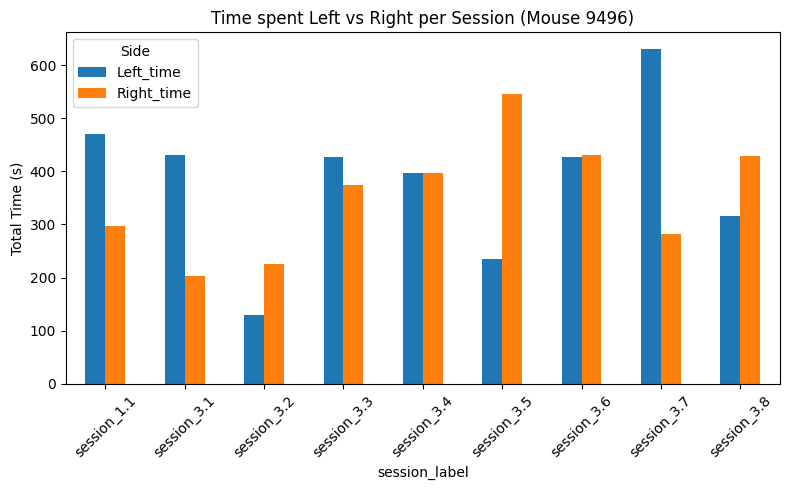

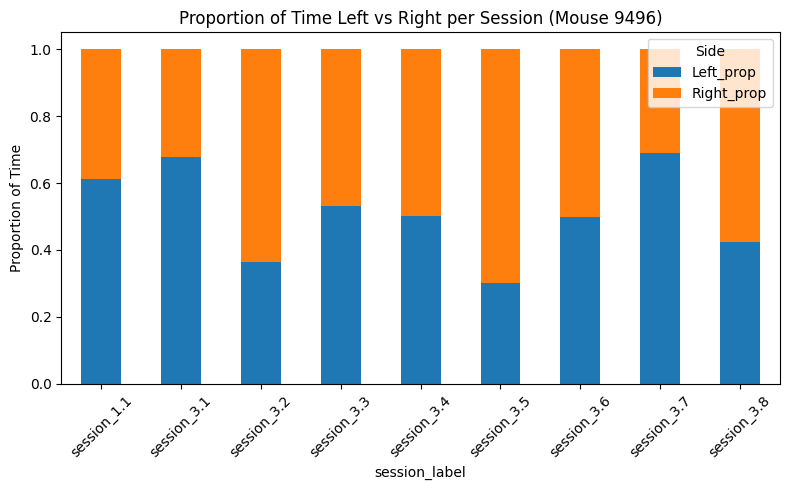


=== Mouse 9497 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_1.1      301.520     344.781   0.466532    0.533468
session_3.1      554.963     281.631   0.663360    0.336640
session_3.2      325.726     270.207   0.546582    0.453418
session_3.3      588.756     309.492   0.655449    0.344551
session_3.4      340.181     173.979   0.661625    0.338375
session_3.5      287.231     185.917   0.607064    0.392936
session_3.6      329.442     186.602   0.638399    0.361601
session_3.7      370.943     132.896   0.736233    0.263767
session_3.8      246.054     310.421   0.442165    0.557835


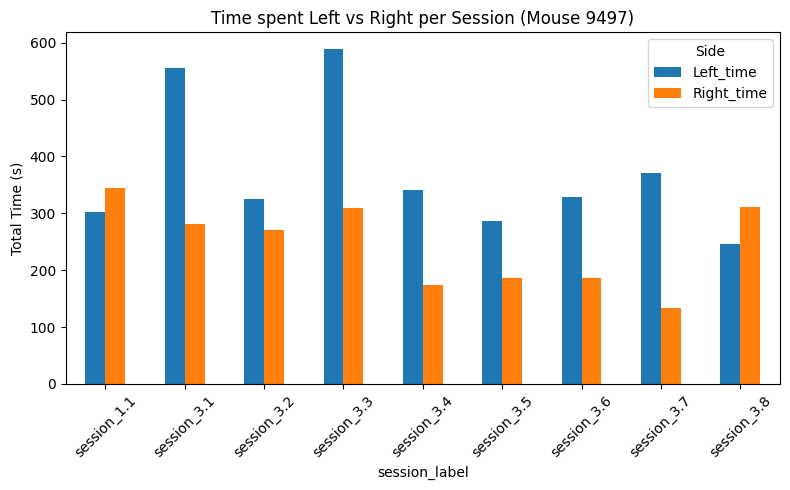

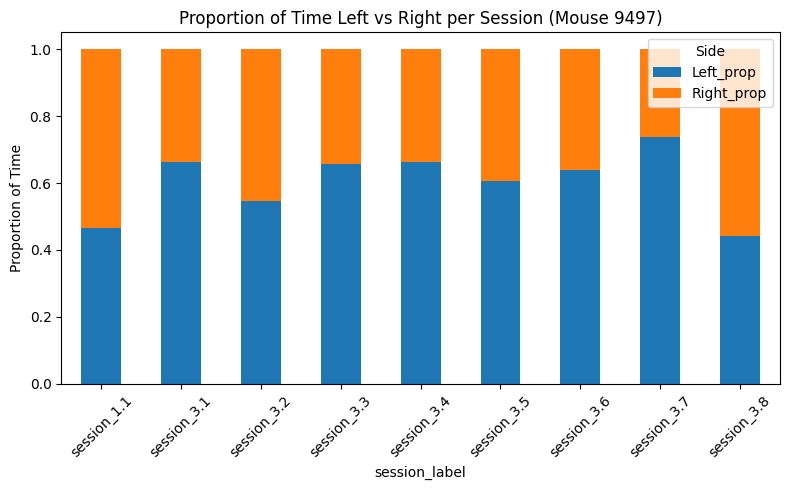


=== Mouse 8938 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session1.1       230.731     149.834   0.606285    0.393715
session_3.1      501.175     210.413   0.704305    0.295695
session_3.2      431.788     347.950   0.553760    0.446240
session_3.3      293.186     352.632   0.453976    0.546024
session_3.4      341.090     431.297   0.441605    0.558395
session_3.5      355.171     498.597   0.416004    0.583996
session_3.6      139.014     603.979   0.187100    0.812900
session_3.7      259.946     685.878   0.274835    0.725165
session_3.8      295.445     782.020   0.274204    0.725796
session_3.8      204.242    1299.708   0.135804    0.864196
session_3.9      192.533     347.401   0.356586    0.643414
session_3.10     219.918     396.410   0.356820    0.643180
session_3.11     237.765     559.700   0.298151    0.701849
session_3.12     248.338     222.812   0.527089    0.472911


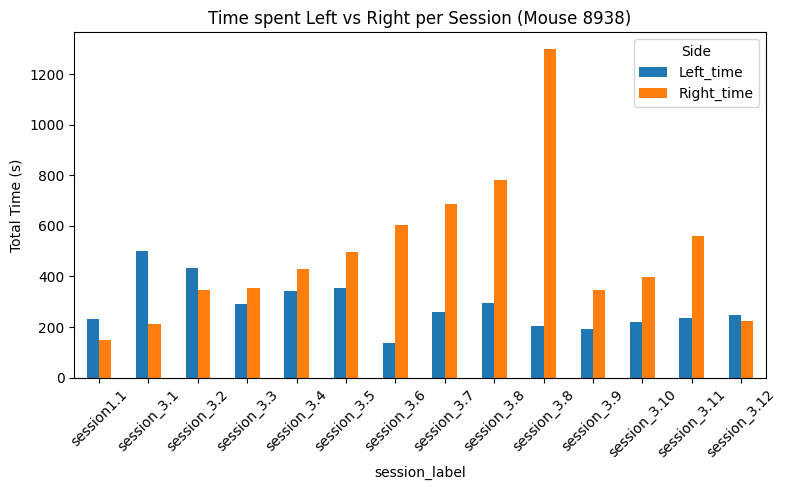

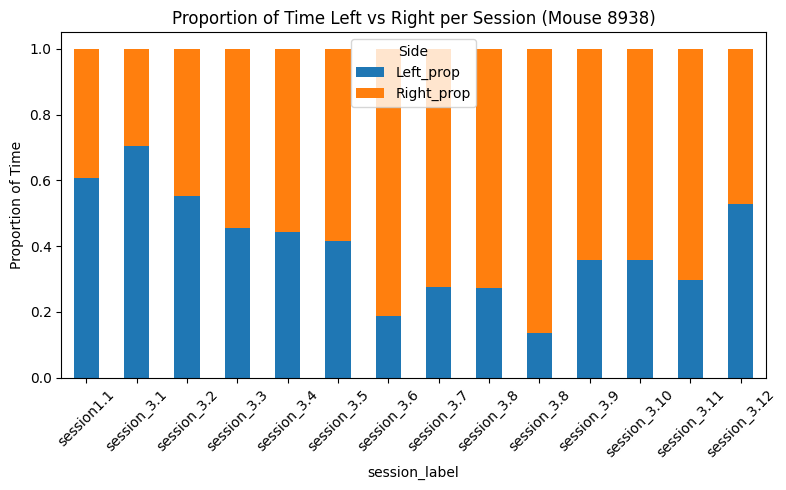


=== Mouse 8939 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session1.1       148.732     148.283   0.500756    0.499244
session3.1       235.432     313.073   0.429225    0.570775
session_3.1        0.000       0.000   0.000000    0.000000
session_3.2      369.715     129.119   0.741158    0.258842
session_3.3      222.819     402.953   0.356071    0.643929
session_3.4      259.269     294.002   0.468611    0.531389
session_3.5      391.688     323.552   0.547632    0.452368
session_3.6      249.375     384.089   0.393669    0.606331
session_3.7      135.421     431.883   0.238710    0.761290
session_3.8      119.512     295.281   0.288124    0.711876
session_3.8      211.244     901.774   0.189794    0.810206
session_3.9      295.567     327.839   0.474116    0.525884
session_3.10     125.015     298.284   0.295335    0.704665
session_3.11     114.297     252.831   0.311327    0.688673
session_3.12     282

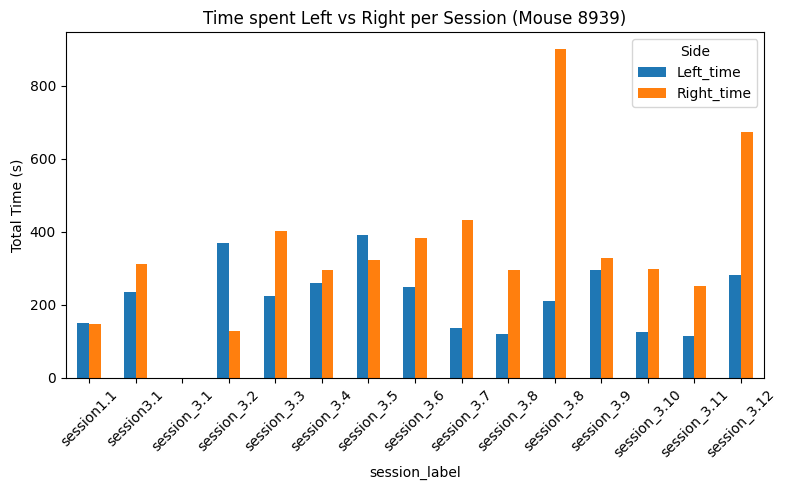

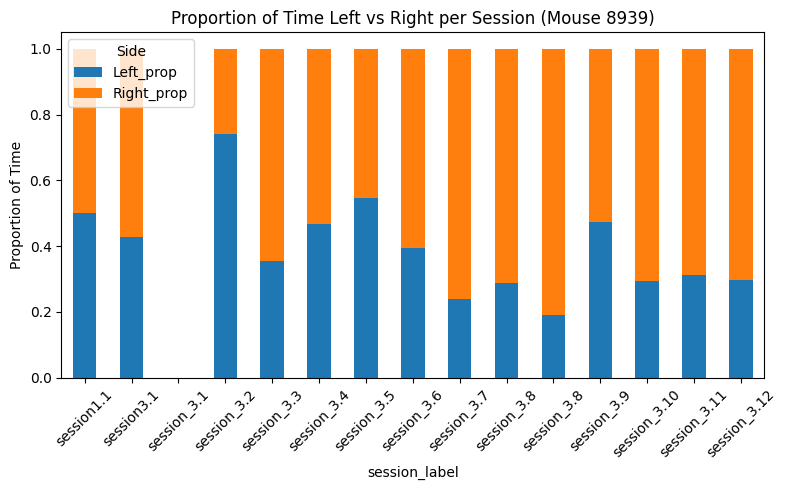


=== Mouse 8941 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session1.1       421.085     258.873   0.619281    0.380719
session_3.1      648.363     324.365   0.666541    0.333459
session_3.2      483.341     288.957   0.625848    0.374152
session_3.3      678.379     490.002   0.580615    0.419385
session_3.4      598.102     701.405   0.460253    0.539747
session_3.5      433.174     544.297   0.443158    0.556842
session_3.6      301.545     466.132   0.392802    0.607198
session_3.7      233.456     522.280   0.308912    0.691088
session_3.8      367.912     586.489   0.385490    0.614510
session_3.9      372.127     516.476   0.418778    0.581222
session_3.10     296.973     554.022   0.348971    0.651029
session_3.11     305.706     718.496   0.298482    0.701518
session_3.12     402.084     772.431   0.342340    0.657660


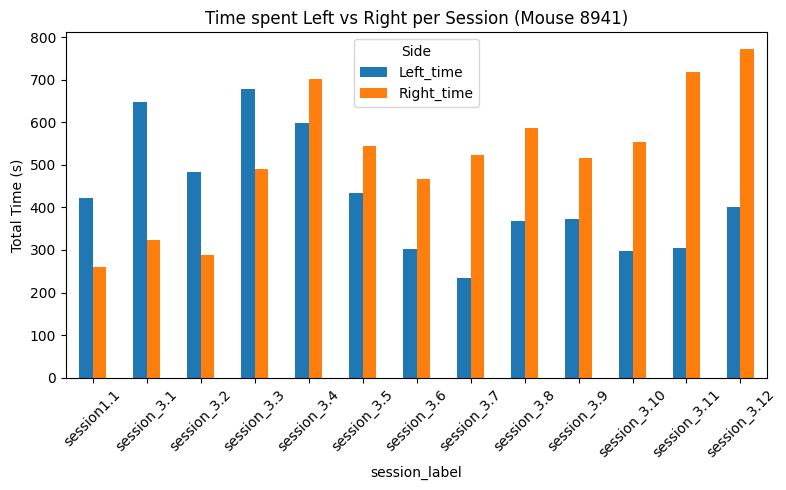

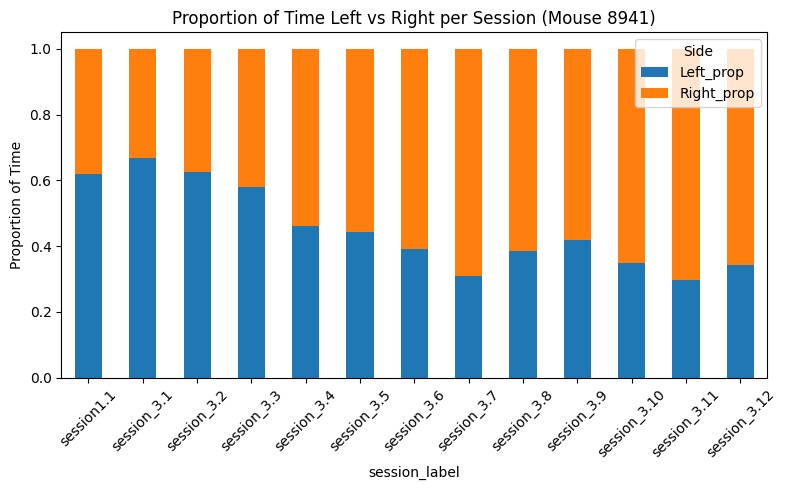


=== Mouse 9129 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session1.1       148.732     148.283   0.500756    0.499244
session1.1         0.000       0.000   0.000000    0.000000
session_3.1      429.423     424.077   0.503132    0.496868
session_3.2      343.106     263.918   0.565226    0.434774
session_3.3      157.997     348.682   0.311829    0.688171
session_3.4      403.299     707.911   0.362937    0.637063
session_3.5      217.057     593.455   0.267802    0.732198
session_3.6      273.079     597.816   0.313561    0.686439
session_3.7      182.850     518.162   0.260837    0.739163
session_3.8      293.346     465.221   0.386711    0.613289
session_3.9      317.518     294.183   0.519074    0.480926
session_3.10     244.832     332.884   0.423793    0.576207
session_3.11     195.157     431.742   0.311305    0.688695
session_3.12     228.697     381.771   0.374626    0.625374


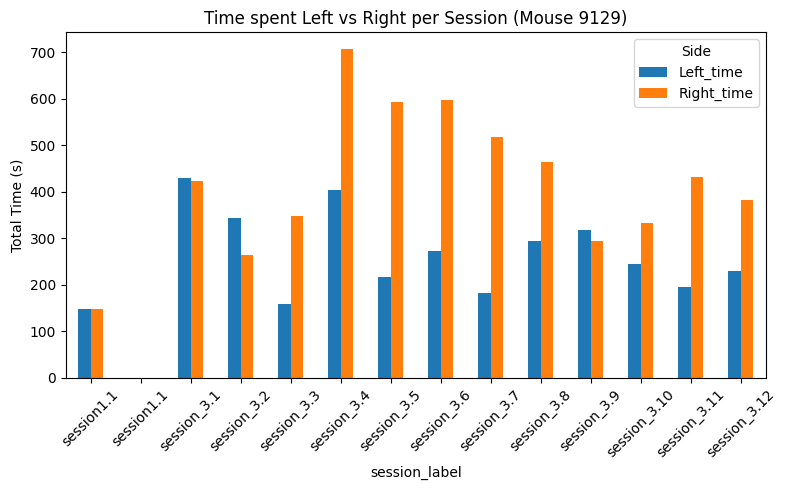

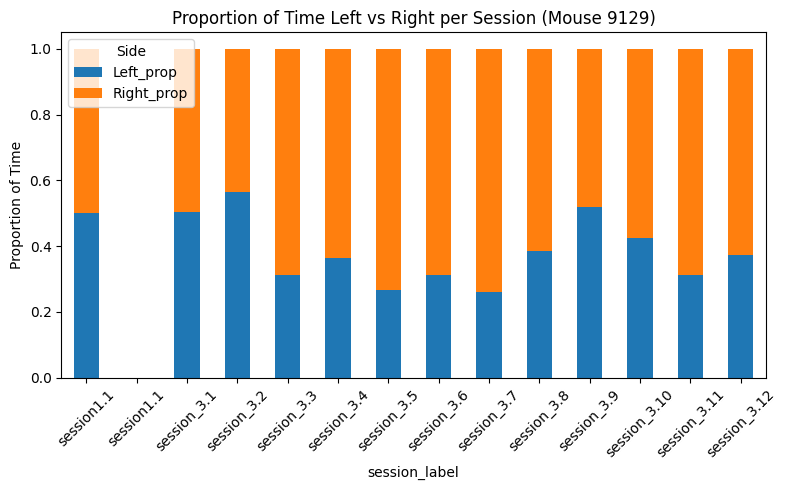


=== Mouse 9257 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_1.1       56.963     134.249   0.297905    0.702095
session_3.1      289.143     313.218   0.480016    0.519984
session_3.2      350.273     381.245   0.478830    0.521170
session_3.3      243.072     249.030   0.493946    0.506054
session_3.4      209.240     205.274   0.504784    0.495216
session_3.5      298.166     171.991   0.634184    0.365816
session_3.6      230.648     242.004   0.487987    0.512013
session_3.7      215.048     233.498   0.479434    0.520566
session_3.8      213.942     170.837   0.556013    0.443987


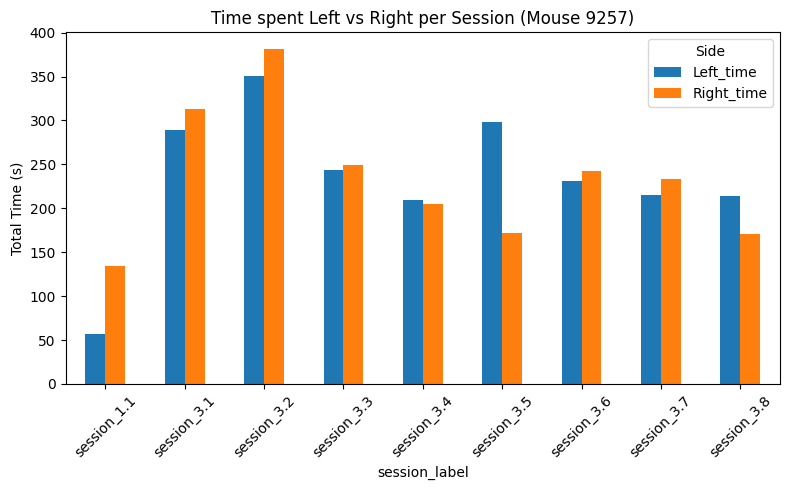

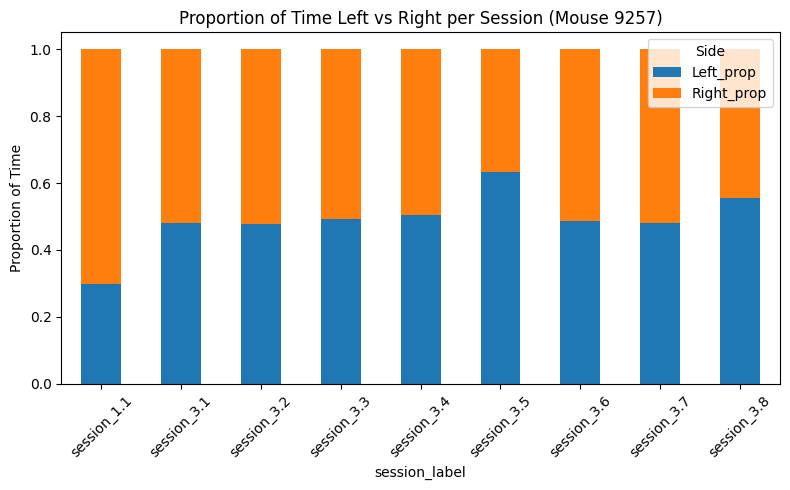


=== Mouse 9258 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_1.1      271.656     287.098   0.486182    0.513818
session_3.1      182.686     157.390   0.537192    0.462808
session_3.2      104.465     134.578   0.437013    0.562987
session_3.3      130.021      93.667   0.581261    0.418739
session_3.4      153.583     120.019   0.561337    0.438663
session_3.5      137.766     110.696   0.554475    0.445525
session_3.6      138.288     169.272   0.449629    0.550371
session_3.7      136.992     101.590   0.574193    0.425807
session_3.8      102.962      78.908   0.566130    0.433870


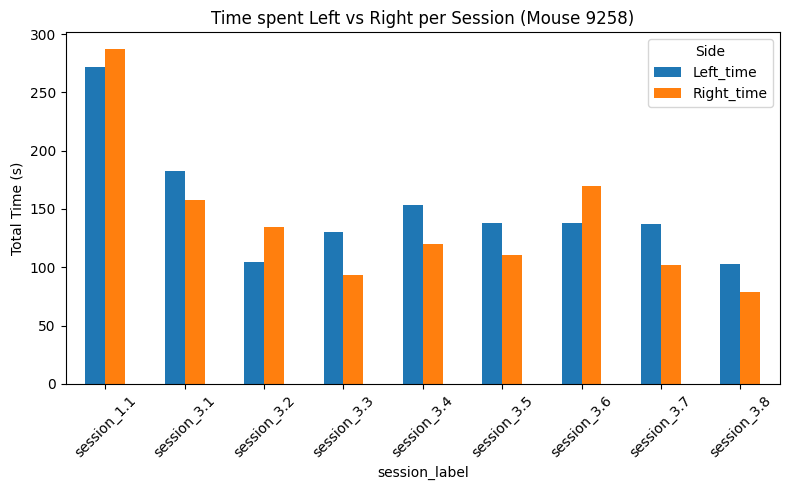

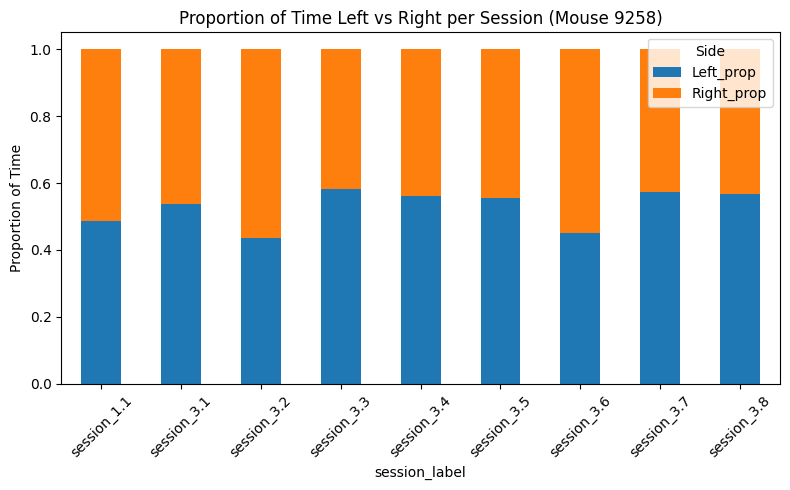


=== Mouse 9259 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_1.1      278.095     158.092   0.637559    0.362441
session_3.1      466.107     385.321   0.547441    0.452559
session_3.2      362.242     236.823   0.604679    0.395321
session_3.3      419.233     164.616   0.718050    0.281950
session_3.4      353.778     223.388   0.612957    0.387043
session_3.5      491.132     290.206   0.628578    0.371422
session_3.6       72.633       0.000   1.000000    0.000000
session_3.7      186.264     184.129   0.502882    0.497118
session_3.8      286.742     214.230   0.572371    0.427629


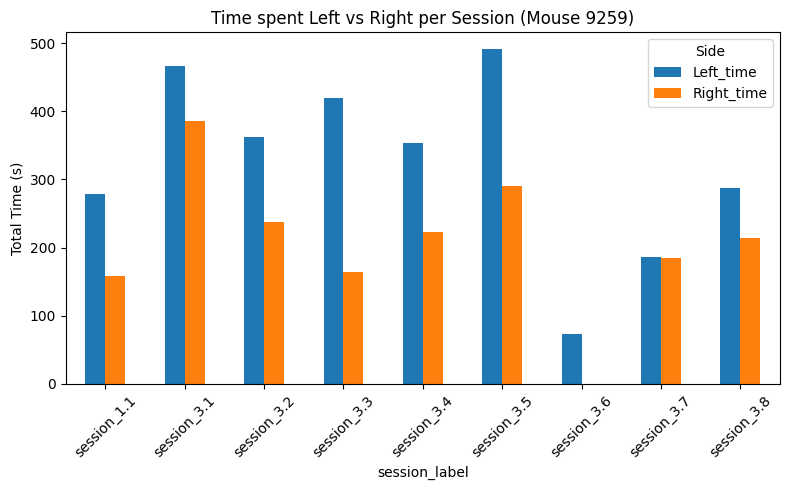

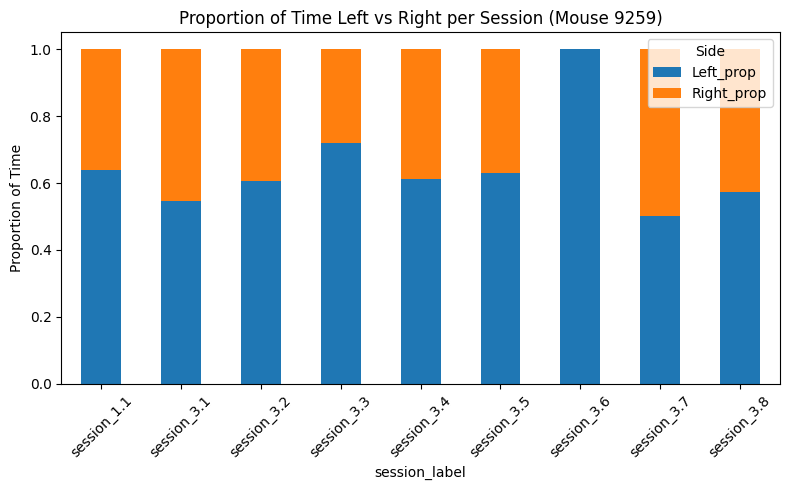


=== Mouse 9260 ===
               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_1.1      274.235     218.343   0.556734    0.443266
session_3.1      239.853     112.284   0.681135    0.318865
session_3.2      462.815     236.379   0.661926    0.338074
session_3.3       91.353       0.000   1.000000    0.000000
session_3.4      387.435     359.333   0.518816    0.481184
session_3.5      300.240     366.149   0.450548    0.549452
session_3.6      388.594     282.047   0.579437    0.420563
session_3.7      292.276     275.611   0.514673    0.485327
session_3.8      174.794     354.080   0.330502    0.669498


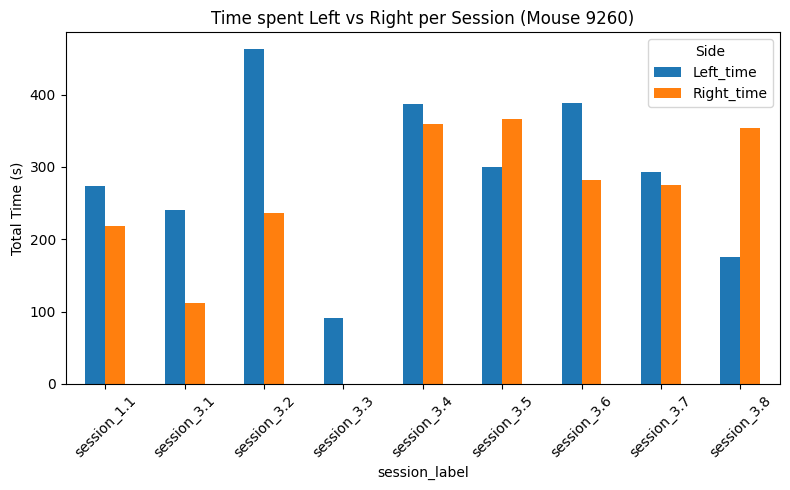

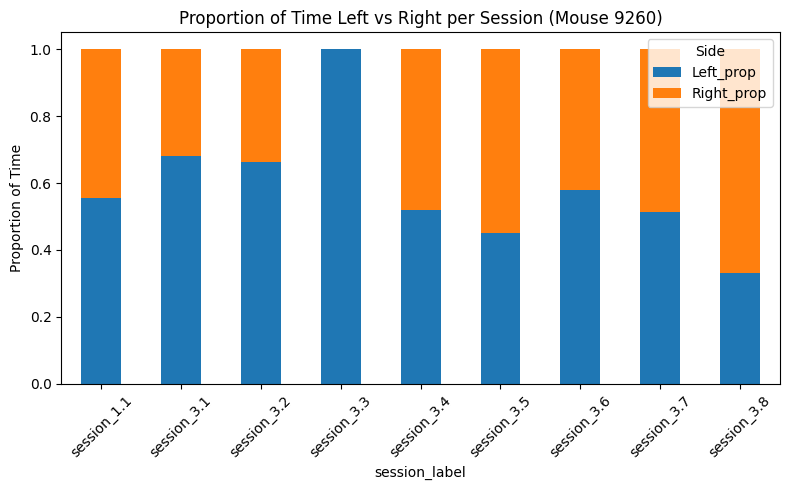

In [68]:
mice_that_matter = ["6357", "6359", "7999", "8001", "8002", 
                    "9493", "9494", "9496", "9497", 
                    "8938", "8939", "8941", "9129", 
                    "9257", "9258", "9259", "9260"]

for i in mice_that_matter:
    filepaths = []
    for j in all_mice_sessions_sorted:
        # include session 1.1 AND any session 3.x
        if i in j and (re.search(r"session[_\s]?1\.1", j, flags=re.I) or
                       re.search(r"session[_\s]?3\.\d+", j, flags=re.I)):
            filepaths.append(j)

    if not filepaths:
        continue  # skip mice with no files

    summary = calculate_left_right_time(filepaths)

    # Relabel sessions consistently
    summary["session_label"] = [
        re.search(r"(session[_\s]?\d+\.\d+)", p, flags=re.I).group(1).replace(" ", "_")
        if re.search(r"(session[_\s]?\d+\.\d+)", p, flags=re.I) else "session_?.?"
        for p in summary.index
    ]
    summary = summary.set_index("session_label")

    # sort numerically (1.1 before 3.1, 3.2, …)
    def sess_key(lbl):
        m = re.search(r"(\d+)\.(\d+)", lbl)
        return (int(m.group(1)), int(m.group(2))) if m else (999, 999)

    summary = summary.sort_index(key=lambda idx: idx.map(sess_key))

    print(f"\n=== Mouse {i} ===")
    print(summary)

    plot_left_right(summary, mouse_id=i)


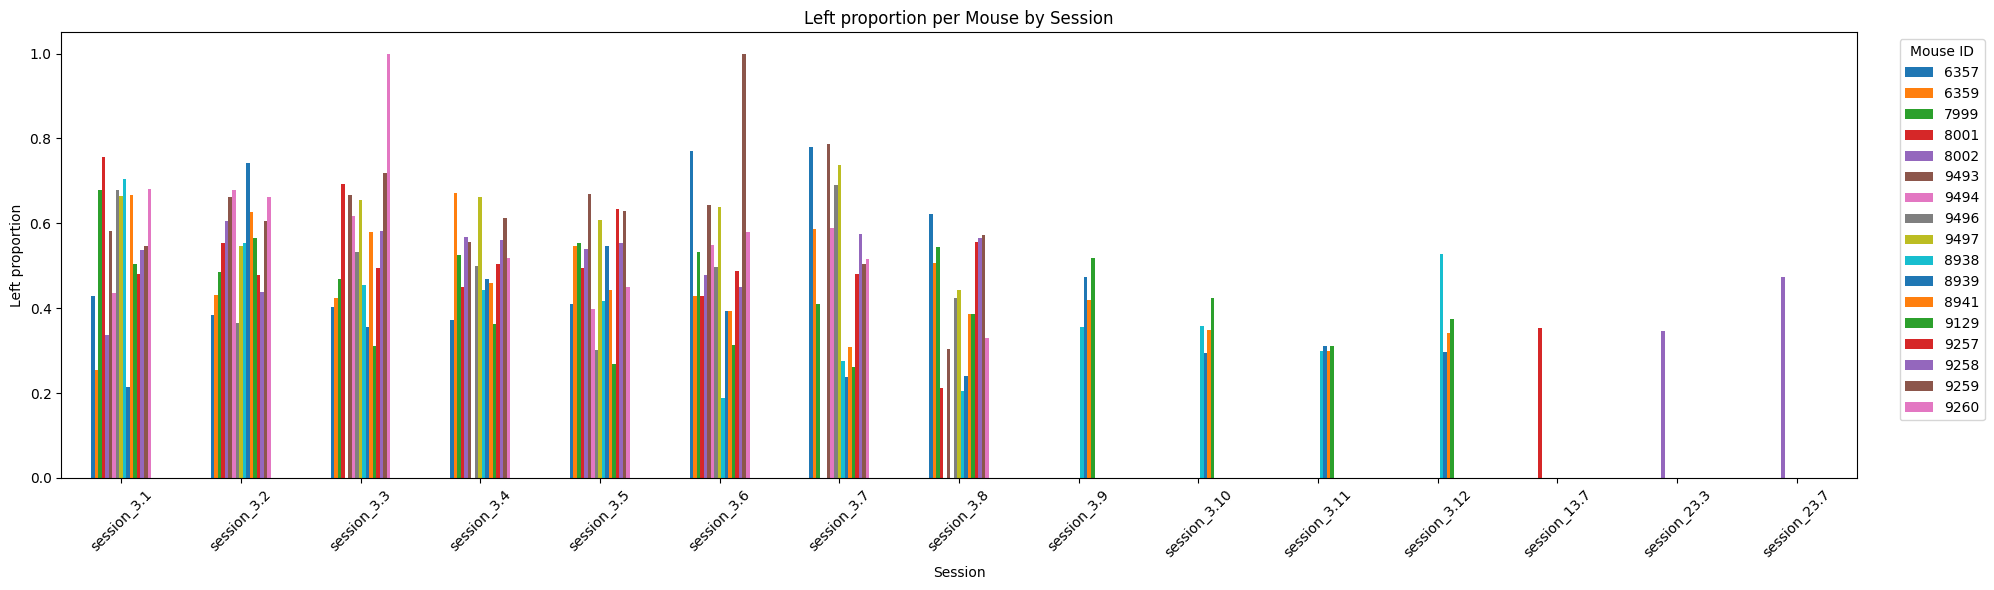

In [50]:
def key(p):
    fname = os.path.basename(p)  # e.g., "mouse8938_session3.10_trial_info.csv"
    parts = fname.replace(".csv", "").split("_")  # ["mouse8938", "session3.10", ...]
    mouse = parts[0].replace("mouse", "")
    session = parts[1].replace("session", "")
    major, *minor = session.split(".")
    return int(mouse), int(major), int(minor[0]) if minor else 0

# Add parsed fields to summary_per_file (assumes index are file paths)
summary_per_file["mouse_id"]      = summary_per_file.index.map(lambda p: key(p)[0])
summary_per_file["session_major"] = summary_per_file.index.map(lambda p: key(p)[1])
summary_per_file["session_minor"] = summary_per_file.index.map(lambda p: key(p)[2])

# Canonical session label for display (e.g., "session_3.2")
summary_per_file["session"] = summary_per_file.apply(
    lambda r: f"session_{r.session_major}.{r.session_minor}", axis=1
)

# Pivot to Session x Mouse with Left_prop
pivot = summary_per_file.pivot_table(
    index="session",
    columns="mouse_id",
    values="Left_prop",
    aggfunc="mean",
)

# Build numeric session order from parsed columns and reindex
session_order = (
    summary_per_file[["session", "session_major", "session_minor"]]
    .drop_duplicates()
    .sort_values(["session_major", "session_minor"])
    ["session"].tolist()
)
pivot = pivot.reindex(index=session_order)

# Optional: enforce mouse column order
try:
    # If you have this list already defined
    pivot = pivot.reindex(columns=[int(m) for m in mice_that_matter if int(m) in pivot.columns])
except NameError:
    # otherwise just sort numerically
    pivot = pivot.reindex(columns=sorted(pivot.columns))

# Plot
ax = pivot.plot(kind="bar", rot=45, figsize=(20,6))
ax.set_ylabel("Left proportion")
ax.set_xlabel("Session")
ax.set_title("Left proportion per Mouse by Session")
ax.legend(title="Mouse ID", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [69]:
def calculate_entry_probabilities(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)

        # Drop NaNs
        valid = df['first_reward_area_visited'].dropna()

        # Count occurrences
        counts = valid.value_counts()

        # Convert to probabilities
        probs = counts / counts.sum()

        results[path] = probs.to_dict()

    prob_df = pd.DataFrame(results).T.fillna(0)

    # Ensure consistent column order
    all_areas = ["rewA", "rewB", "rewC", "rewD"]
    prob_df = prob_df.reindex(columns=all_areas, fill_value=0)

    return prob_df


def plot_entry_probabilities(prob_df, mouse_id=None):
    # Fixed colors for reward areas
    colors = {
        "rewA": "tab:blue",
        "rewB": "tab:orange",
        "rewC": "tab:green",
        "rewD": "tab:red"
    }

    ax = prob_df.plot(
        kind="bar",
        figsize=(8, 5),
        rot=0,  # keep labels horizontal
        color=[colors[col] for col in prob_df.columns]
    )

    ax.set_ylabel("Probability")
    title = "Probability of Entering Each Reward Area First"
    if mouse_id is not None:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    ax.legend(title="Reward Area")
    plt.tight_layout()
    plt.show()



=== Mouse 6357 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session 3.1    0.357143  0.071429  0.285714  0.285714
session3.2     0.166667  0.111111  0.666667  0.055556
session3.3     0.150000  0.050000  0.700000  0.100000
session3.4     0.117647  0.352941  0.411765  0.117647
session3.5     0.148148  0.000000  0.740741  0.111111
session3.6     0.142857  0.547619  0.285714  0.023810
session3.7     0.428571  0.306122  0.163265  0.102041
session3.8     0.400000  0.266667  0.311111  0.022222


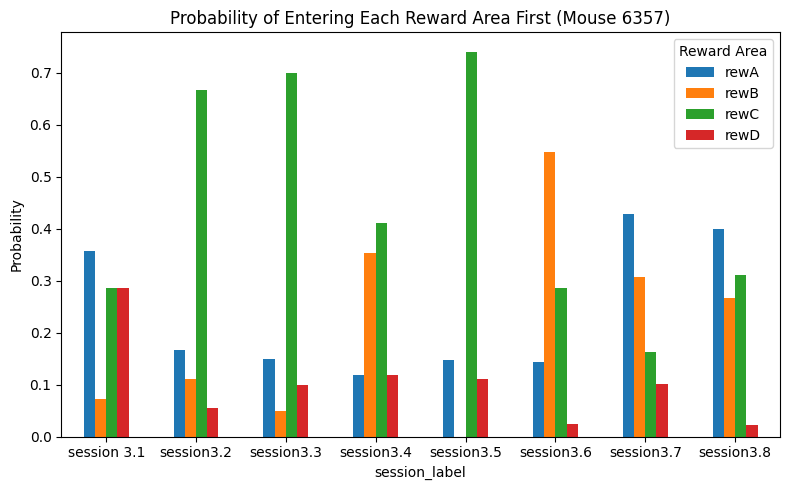


=== Mouse 6359 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session3.1     0.133333  0.066667  0.600000  0.200000
session3.2     0.214286  0.214286  0.357143  0.214286
session3.3     0.157895  0.210526  0.368421  0.263158
session3.4     0.294118  0.411765  0.235294  0.058824
session3.5     0.255814  0.255814  0.441860  0.046512
session3.6     0.269841  0.365079  0.253968  0.111111
session3.7     0.269841  0.253968  0.476190  0.000000
session3.8     0.192982  0.350877  0.438596  0.017544


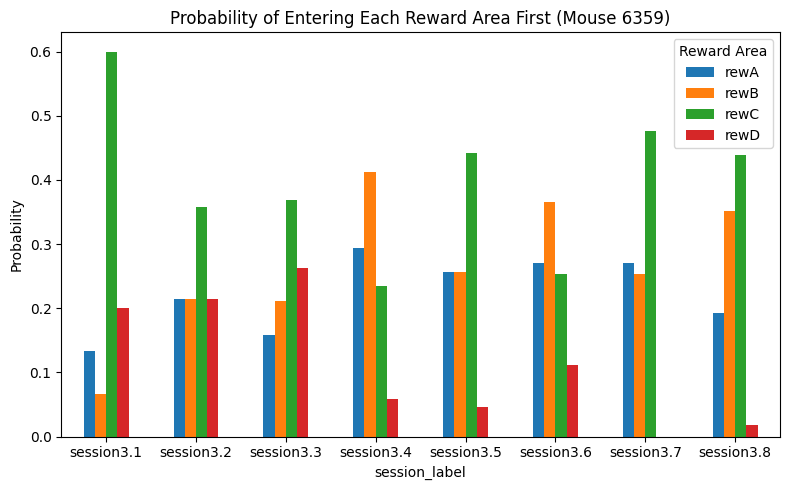


=== Mouse 7999 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session3.1     0.360000  0.280000  0.320000  0.040000
session3.2     0.500000  0.125000  0.312500  0.062500
session3.3     0.363636  0.000000  0.181818  0.454545
session3.4     0.500000  0.250000  0.250000  0.000000
session3.5     0.272727  0.363636  0.272727  0.090909
session3.6     0.600000  0.200000  0.100000  0.100000
session3.7     0.181818  0.454545  0.363636  0.000000
session3.8     0.388889  0.277778  0.111111  0.222222


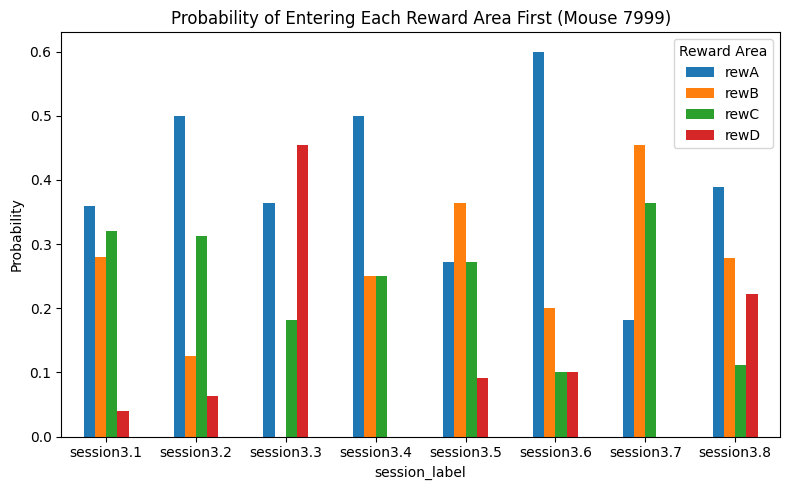


=== Mouse 8001 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session3.1     0.545455  0.151515  0.272727  0.030303
session3.2     0.433333  0.133333  0.333333  0.100000
session3.3     0.200000  0.480000  0.160000  0.160000
session3.4     0.290323  0.322581  0.322581  0.064516
session3.5     0.333333  0.314815  0.203704  0.148148
session3.6     0.225000  0.175000  0.450000  0.150000
session3.8     0.155556  0.155556  0.422222  0.266667
session3.7     0.244898  0.142857  0.265306  0.346939


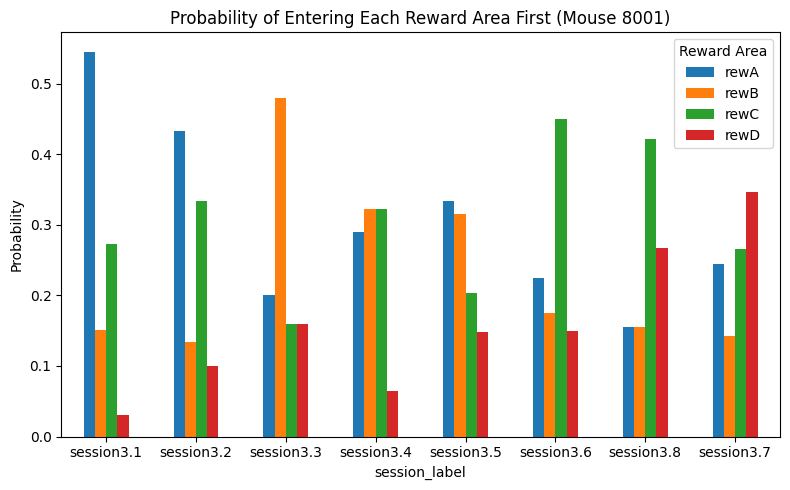


=== Mouse 8002 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session3.1     0.125000  0.125000  0.250000  0.500000
session3.2     0.666667  0.333333  0.000000  0.000000
session3.4     0.368421  0.210526  0.315789  0.105263
session3.5     0.352941  0.058824  0.235294  0.352941
session3.6     0.090909  0.000000  0.303030  0.606061
session3.3     0.266667  0.133333  0.266667  0.333333
session3.7     0.125000  0.000000  0.312500  0.562500


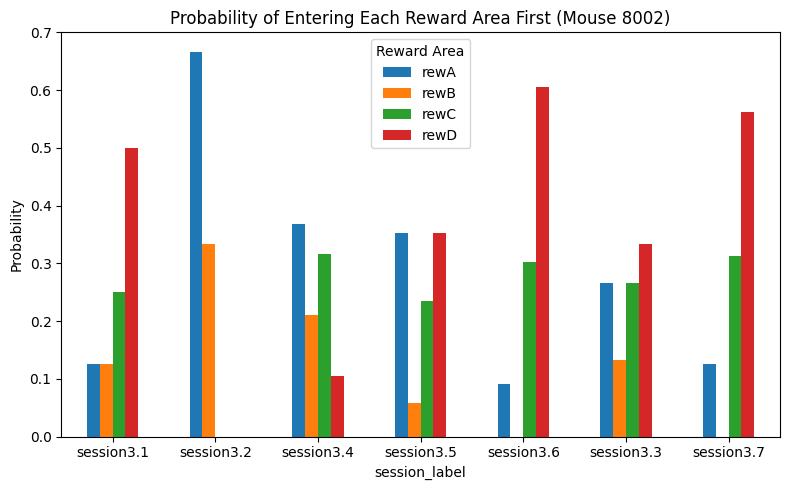


=== Mouse 9493 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.363636  0.181818  0.181818  0.272727
session_3.2    0.538462  0.153846  0.230769  0.076923
session_3.3    0.655172  0.206897  0.103448  0.034483
session_3.4    0.718750  0.062500  0.093750  0.125000
session_3.5    0.561404  0.070175  0.175439  0.192982
session_3.6    0.509434  0.037736  0.188679  0.264151
session_3.7    0.436364  0.200000  0.054545  0.309091
session_3.8    0.354839  0.016129  0.096774  0.532258


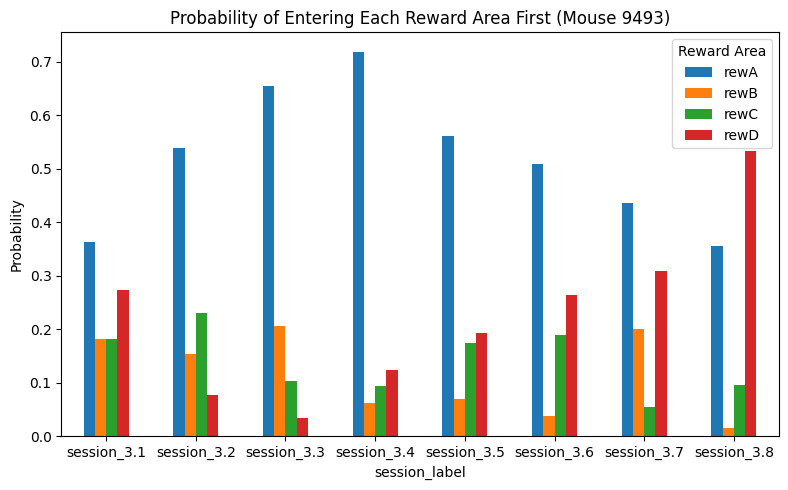


=== Mouse 9494 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.600000  0.200000  0.133333  0.066667
session_3.2    0.642857  0.071429  0.071429  0.214286
session_3.3    0.571429  0.142857  0.071429  0.214286
session_3.4    0.000000  0.000000  0.000000  0.000000
session_3.5    0.611111  0.111111  0.111111  0.166667
session_3.6    0.478261  0.217391  0.130435  0.173913
session_3.7    0.600000  0.066667  0.133333  0.200000


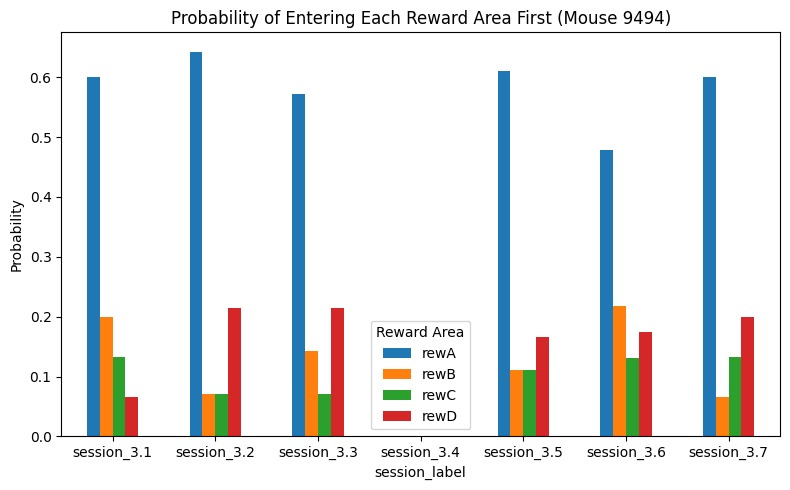


=== Mouse 9496 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.529412  0.176471  0.117647  0.176471
session_3.2    0.000000  0.260870  0.347826  0.391304
session_3.3    0.200000  0.033333  0.200000  0.566667
session_3.4    0.117647  0.058824  0.441176  0.382353
session_3.5    0.112903  0.032258  0.032258  0.822581
session_3.6    0.263158  0.035088  0.105263  0.596491
session_3.7    0.658228  0.012658  0.101266  0.227848
session_3.8    0.614458  0.048193  0.108434  0.228916


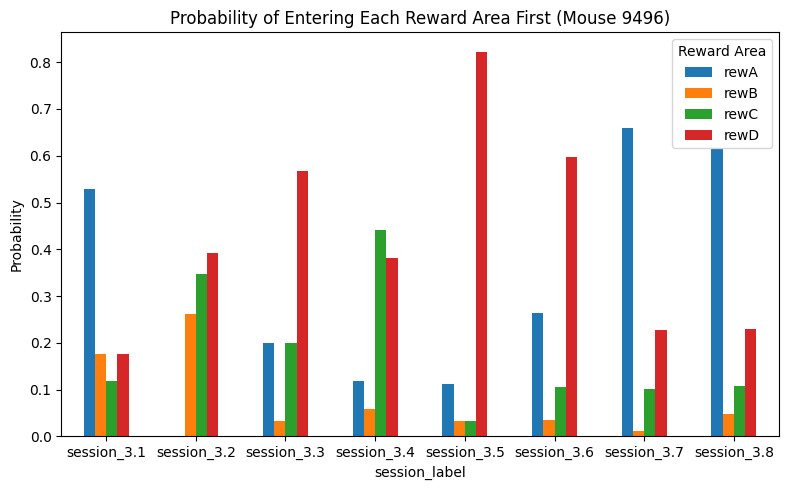


=== Mouse 9497 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.333333  0.200000  0.166667  0.300000
session_3.2    0.484848  0.030303  0.181818  0.303030
session_3.3    0.666667  0.104167  0.125000  0.104167
session_3.4    0.629630  0.074074  0.129630  0.166667
session_3.5    0.611111  0.074074  0.129630  0.185185
session_3.6    0.709677  0.016129  0.064516  0.209677
session_3.7    0.842105  0.017544  0.035088  0.105263
session_3.8    0.761905  0.047619  0.063492  0.126984


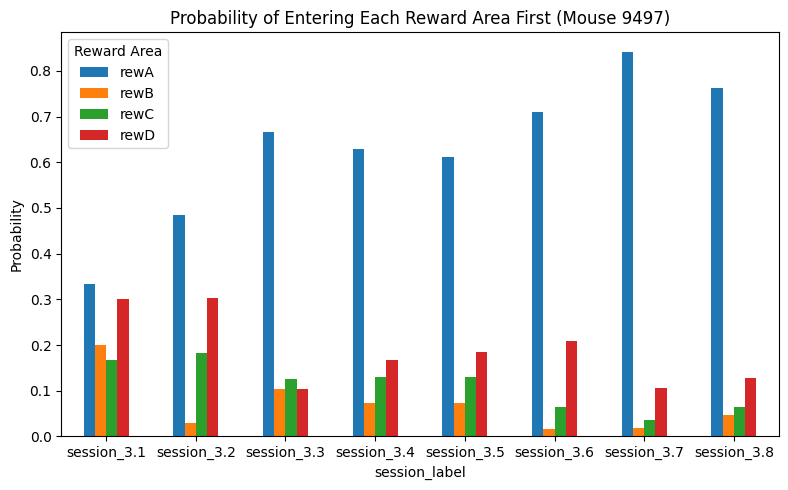


=== Mouse 8938 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.342857  0.400000  0.114286  0.142857
session_3.2    0.289855  0.362319  0.304348  0.043478
session_3.3    0.317460  0.253968  0.333333  0.095238
session_3.4    0.274725  0.153846  0.450549  0.120879
session_3.5    0.237113  0.164948  0.587629  0.010309
session_3.6    0.273810  0.047619  0.619048  0.059524
session_3.7    0.239583  0.062500  0.625000  0.072917
session_3.8    0.122807  0.070175  0.736842  0.070175
session_3.8    0.152778  0.000000  0.736111  0.111111
session_3.9    0.093458  0.196262  0.411215  0.299065
session_3.10   0.265152  0.045455  0.446970  0.242424
session_3.11   0.169643  0.133929  0.544643  0.151786
session_3.12   0.250000  0.250000  0.430000  0.070000


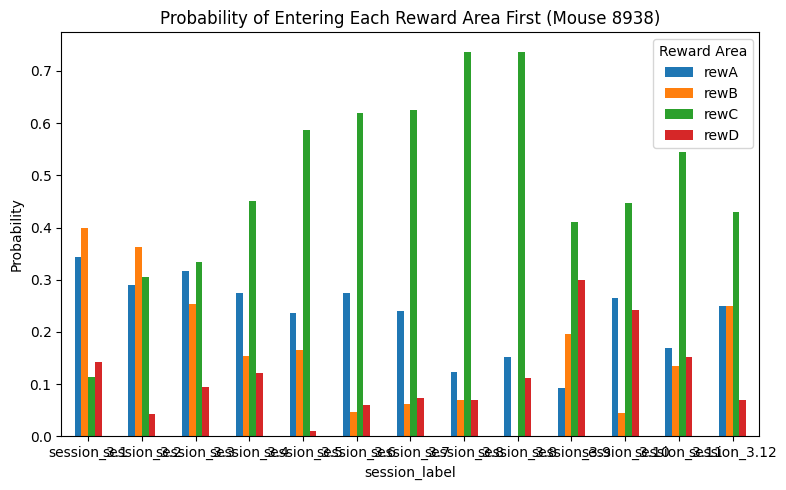


=== Mouse 8939 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session3.1     0.400000  0.160000  0.360000  0.080000
session_3.1    0.000000  0.000000  0.000000  0.000000
session_3.2    0.333333  0.333333  0.083333  0.250000
session_3.3    0.333333  0.000000  0.555556  0.111111
session_3.4    0.195122  0.268293  0.390244  0.146341
session_3.5    0.117647  0.235294  0.588235  0.058824
session_3.6    0.250000  0.000000  0.687500  0.062500
session_3.7    0.090909  0.181818  0.727273  0.000000
session_3.8    0.000000  0.100000  0.900000  0.000000
session_3.8    0.000000  0.000000  0.916667  0.083333
session_3.9    0.000000  0.058824  0.882353  0.058824
session_3.10   0.000000  0.062500  0.875000  0.062500
session_3.11   0.000000  0.277778  0.666667  0.055556
session_3.12   0.111111  0.083333  0.638889  0.166667


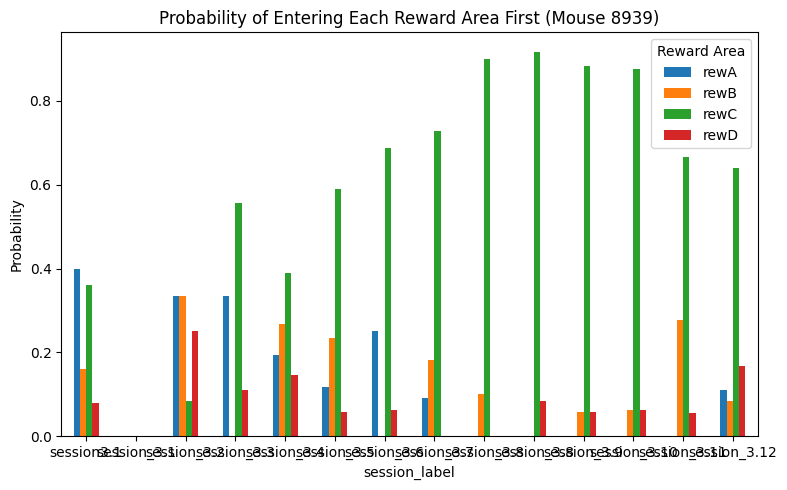


=== Mouse 8941 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.200000  0.233333  0.433333  0.133333
session_3.2    0.142857  0.285714  0.238095  0.333333
session_3.3    0.360000  0.120000  0.160000  0.360000
session_3.4    0.305556  0.111111  0.138889  0.444444
session_3.5    0.144928  0.260870  0.391304  0.202899
session_3.6    0.224490  0.183673  0.510204  0.081633
session_3.7    0.195122  0.207317  0.548780  0.048780
session_3.8    0.153846  0.138462  0.646154  0.061538
session_3.9    0.129870  0.077922  0.558442  0.233766
session_3.10   0.234694  0.071429  0.540816  0.153061
session_3.11   0.336957  0.097826  0.434783  0.130435
session_3.12   0.207317  0.170732  0.500000  0.121951


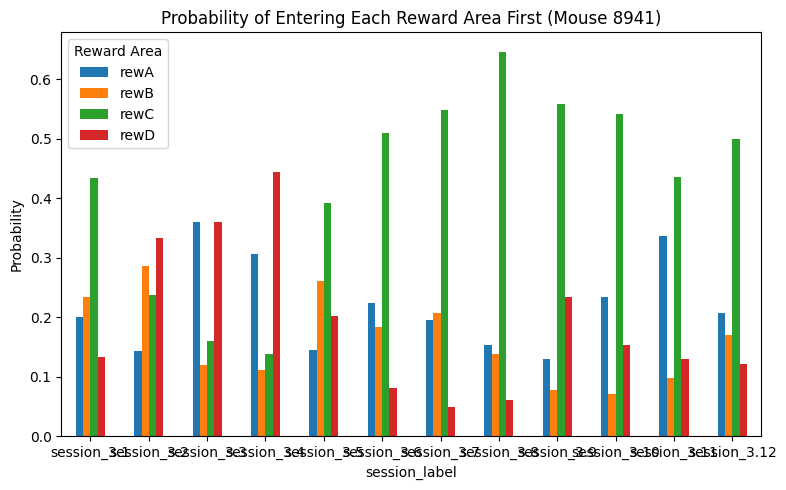


=== Mouse 9129 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.133333  0.266667  0.166667  0.433333
session_3.2    0.200000  0.133333  0.666667  0.000000
session_3.3    0.137931  0.068966  0.086207  0.706897
session_3.4    0.239130  0.086957  0.271739  0.402174
session_3.5    0.102941  0.029412  0.514706  0.352941
session_3.6    0.134615  0.067308  0.259615  0.538462
session_3.7    0.153061  0.061224  0.224490  0.561224
session_3.8    0.287770  0.107914  0.266187  0.338129
session_3.9    0.373984  0.056911  0.284553  0.284553
session_3.10   0.314286  0.190476  0.419048  0.076190
session_3.11   0.385827  0.078740  0.464567  0.070866
session_3.12   0.351145  0.045802  0.473282  0.129771


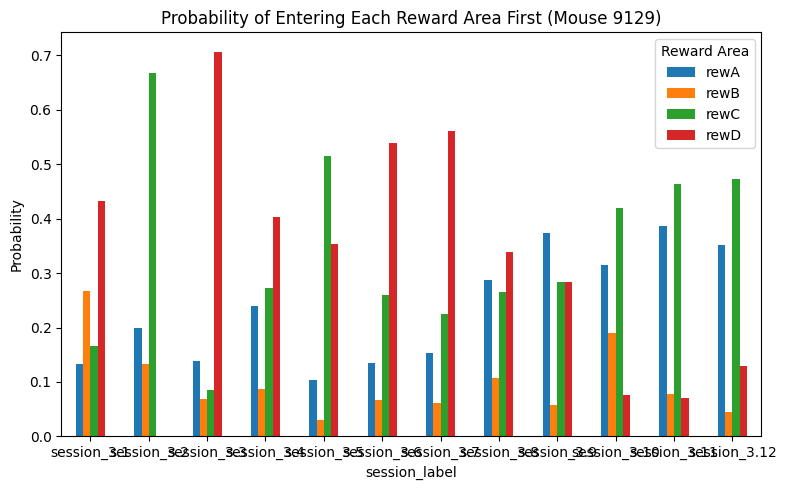


=== Mouse 9257 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.233333  0.400000  0.200000  0.166667
session_3.2    0.185185  0.148148  0.370370  0.296296
session_3.3    0.380952  0.095238  0.380952  0.142857
session_3.4    0.346939  0.244898  0.306122  0.102041
session_3.5    0.510204  0.306122  0.163265  0.020408
session_3.6    0.509434  0.226415  0.226415  0.037736
session_3.7    0.391304  0.260870  0.239130  0.108696
session_3.8    0.533333  0.088889  0.266667  0.111111


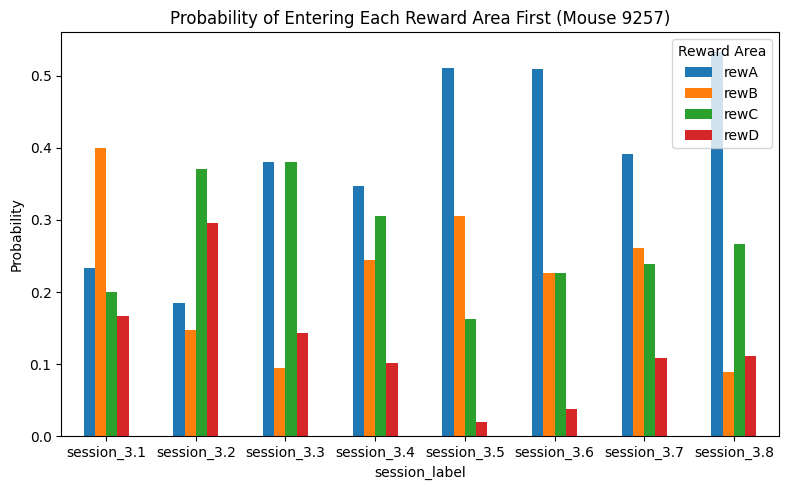


=== Mouse 9258 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.500000  0.058824  0.264706  0.176471
session_3.2    0.460000  0.000000  0.180000  0.360000
session_3.3    0.500000  0.184211  0.105263  0.210526
session_3.4    0.327273  0.109091  0.254545  0.309091
session_3.5    0.473684  0.052632  0.105263  0.368421
session_3.6    0.345455  0.018182  0.181818  0.454545
session_3.7    0.254902  0.098039  0.274510  0.372549
session_3.8    0.545455  0.136364  0.090909  0.227273


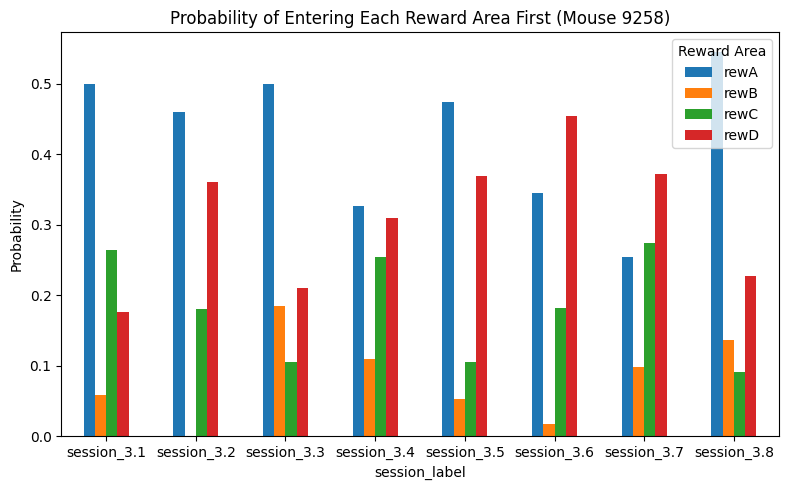


=== Mouse 9259 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.242424  0.090909  0.212121  0.454545
session_3.2    0.394737  0.131579  0.263158  0.210526
session_3.3    0.531250  0.062500  0.218750  0.187500
session_3.4    0.342857  0.057143  0.428571  0.171429
session_3.5    0.593220  0.084746  0.186441  0.135593
session_3.6    0.000000  1.000000  0.000000  0.000000
session_3.7    0.000000  0.534884  0.279070  0.186047
session_3.8    0.375000  0.321429  0.214286  0.089286


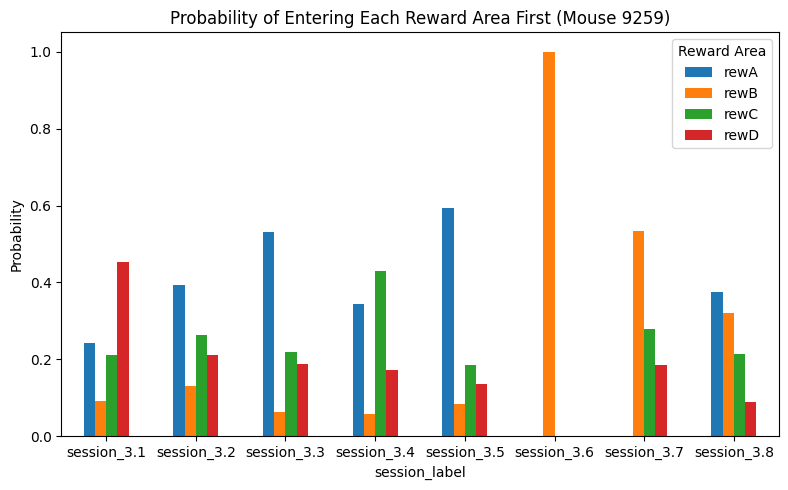


=== Mouse 9260 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_3.1    0.333333  0.111111  0.000000  0.555556
session_3.2    0.518519  0.074074  0.074074  0.333333
session_3.3    0.000000  1.000000  0.000000  0.000000
session_3.4    0.400000  0.088889  0.066667  0.444444
session_3.5    0.269231  0.019231  0.019231  0.692308
session_3.6    0.250000  0.020833  0.041667  0.687500
session_3.7    0.387755  0.061224  0.346939  0.204082
session_3.8    0.254545  0.127273  0.218182  0.400000


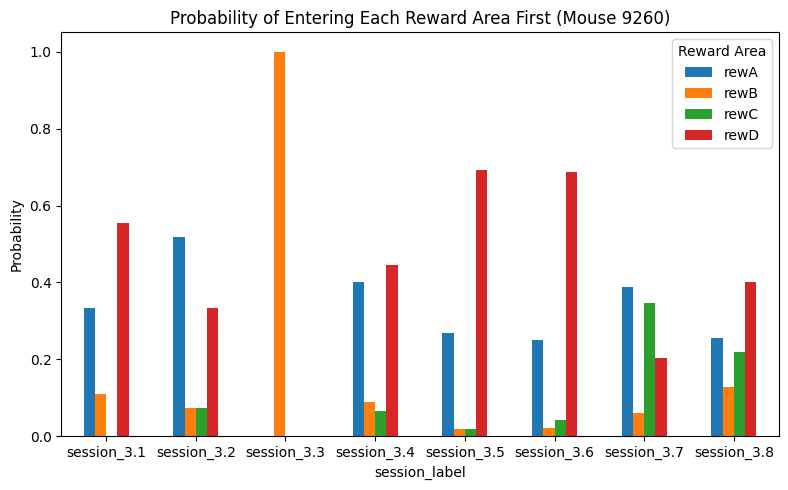

In [70]:
import re

mice_that_matter = ["6357", "6359", "7999", "8001", "8002",
                    "9493", "9494", "9496", "9497",
                    "8938", "8939", "8941", "9129",
                    "9257", "9258", "9259", "9260"]

for mid in mice_that_matter:
    filepaths = [p for p in all_mice_sessions_sorted if mid in p and "session3" in p]

    if not filepaths:
        continue  # skip mice with no session3 files

    # Calculate entry probabilities per session
    entry_probs = calculate_entry_probabilities(filepaths)

    # Add session labels (instead of raw paths)
    entry_probs["session_label"] = [
        re.search(r"(session[_\s]?3\.\d+)", p, flags=re.I).group(1)
        if re.search(r"(session[_\s]?3\.\d+)", p, flags=re.I) else "session3.?"
        for p in entry_probs.index
    ]
    entry_probs = entry_probs.set_index("session_label")

    print(f"\n=== Mouse {mid} ===")
    print(entry_probs)

    # Plot per mouse
    plot_entry_probabilities(entry_probs, mouse_id = mid)


Plotting the probability of entering each rew area first (normalised by 1)


=== Mouse 6357 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session1.1     0.160000  0.280000  0.360000  0.200000
session 3.1    0.357143  0.071429  0.285714  0.285714
session3.2     0.166667  0.111111  0.666667  0.055556
session3.3     0.150000  0.050000  0.700000  0.100000
session3.4     0.117647  0.352941  0.411765  0.117647
session3.5     0.148148  0.000000  0.740741  0.111111
session3.6     0.142857  0.547619  0.285714  0.023810
session3.7     0.428571  0.306122  0.163265  0.102041
session3.8     0.400000  0.266667  0.311111  0.022222


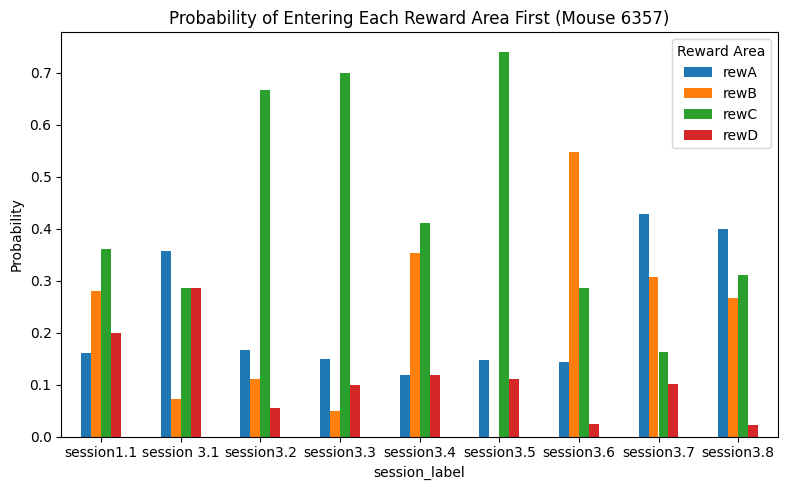


=== Mouse 6359 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session1.1     0.375000  0.166667  0.291667  0.166667
session3.1     0.133333  0.066667  0.600000  0.200000
session3.2     0.214286  0.214286  0.357143  0.214286
session3.3     0.157895  0.210526  0.368421  0.263158
session3.4     0.294118  0.411765  0.235294  0.058824
session3.5     0.255814  0.255814  0.441860  0.046512
session3.6     0.269841  0.365079  0.253968  0.111111
session3.7     0.269841  0.253968  0.476190  0.000000
session3.8     0.192982  0.350877  0.438596  0.017544


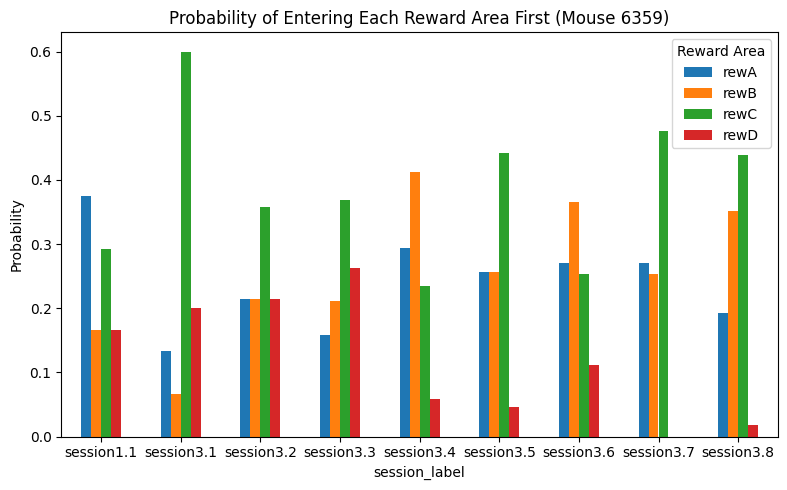


=== Mouse 7999 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session1.1     0.464286  0.178571  0.250000  0.107143
session3.1     0.360000  0.280000  0.320000  0.040000
session3.2     0.500000  0.125000  0.312500  0.062500
session3.3     0.363636  0.000000  0.181818  0.454545
session3.4     0.500000  0.250000  0.250000  0.000000
session3.5     0.272727  0.363636  0.272727  0.090909
session3.6     0.600000  0.200000  0.100000  0.100000
session3.7     0.181818  0.454545  0.363636  0.000000
session3.8     0.388889  0.277778  0.111111  0.222222


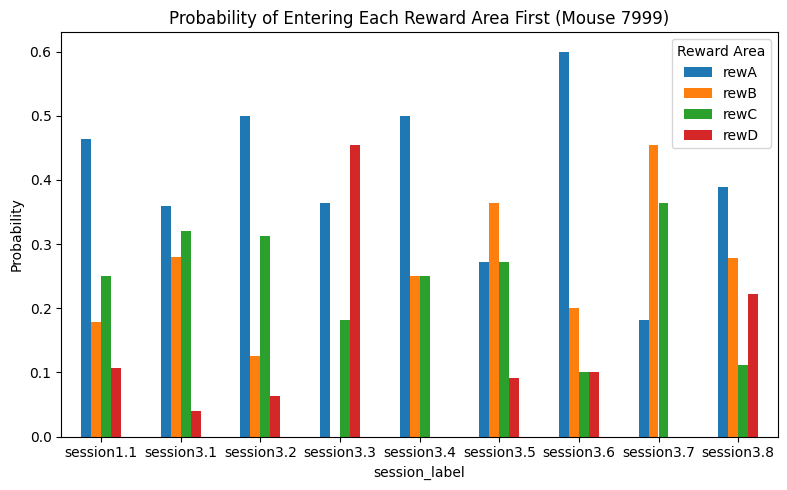


=== Mouse 8001 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session1.1     0.314286  0.142857  0.285714  0.257143
session3.1     0.545455  0.151515  0.272727  0.030303
session3.2     0.433333  0.133333  0.333333  0.100000
session3.3     0.200000  0.480000  0.160000  0.160000
session3.4     0.290323  0.322581  0.322581  0.064516
session3.5     0.333333  0.314815  0.203704  0.148148
session3.6     0.225000  0.175000  0.450000  0.150000
session3.8     0.155556  0.155556  0.422222  0.266667
session3.7     0.244898  0.142857  0.265306  0.346939


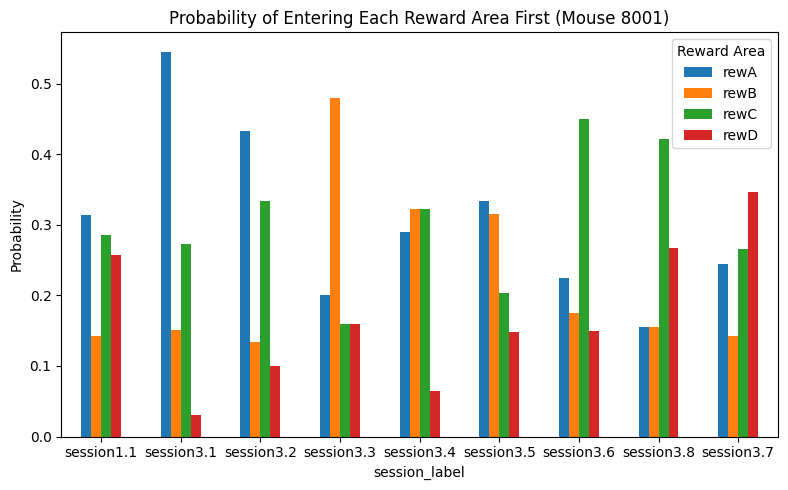


=== Mouse 8002 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session3.1     0.125000  0.125000  0.250000  0.500000
session3.2     0.666667  0.333333  0.000000  0.000000
session3.4     0.368421  0.210526  0.315789  0.105263
session3.5     0.352941  0.058824  0.235294  0.352941
session3.6     0.090909  0.000000  0.303030  0.606061
session3.3     0.266667  0.133333  0.266667  0.333333
session3.7     0.125000  0.000000  0.312500  0.562500


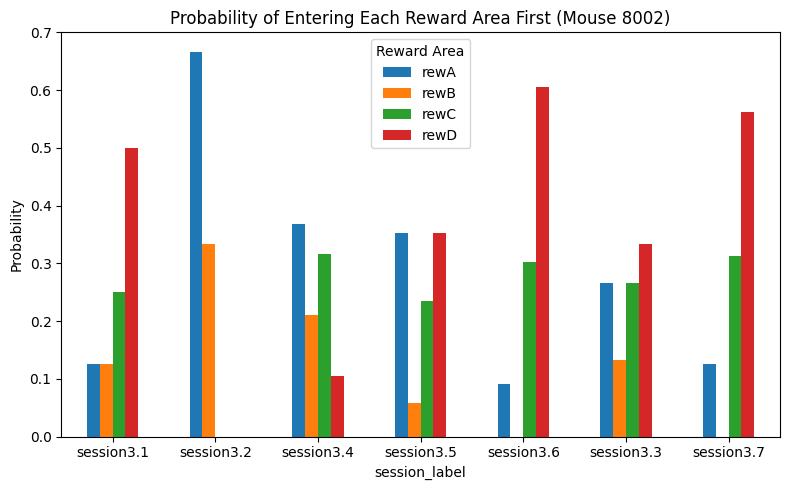


=== Mouse 9493 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_1.1    0.272727  0.272727  0.227273  0.227273
session_3.1    0.363636  0.181818  0.181818  0.272727
session_3.2    0.538462  0.153846  0.230769  0.076923
session_3.3    0.655172  0.206897  0.103448  0.034483
session_3.4    0.718750  0.062500  0.093750  0.125000
session_3.5    0.561404  0.070175  0.175439  0.192982
session_3.6    0.509434  0.037736  0.188679  0.264151
session_3.7    0.436364  0.200000  0.054545  0.309091
session_3.8    0.354839  0.016129  0.096774  0.532258


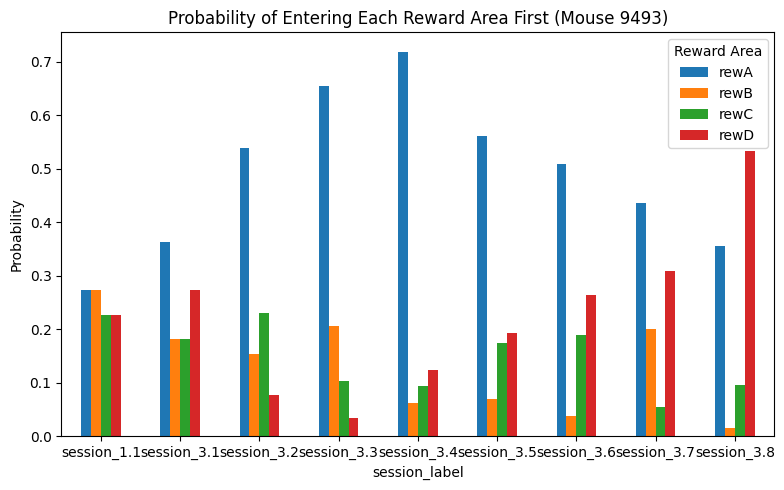


=== Mouse 9494 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_1.1    0.370370  0.148148  0.370370  0.111111
session_3.1    0.600000  0.200000  0.133333  0.066667
session_3.2    0.642857  0.071429  0.071429  0.214286
session_3.3    0.571429  0.142857  0.071429  0.214286
session_3.4    0.000000  0.000000  0.000000  0.000000
session_3.5    0.611111  0.111111  0.111111  0.166667
session_3.6    0.478261  0.217391  0.130435  0.173913
session_3.7    0.600000  0.066667  0.133333  0.200000


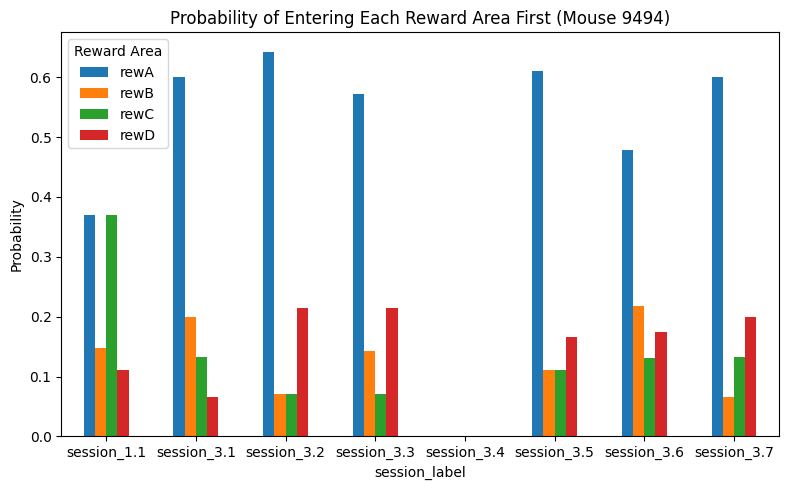


=== Mouse 9496 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_1.1    0.382353  0.294118  0.235294  0.088235
session_3.1    0.529412  0.176471  0.117647  0.176471
session_3.2    0.000000  0.260870  0.347826  0.391304
session_3.3    0.200000  0.033333  0.200000  0.566667
session_3.4    0.117647  0.058824  0.441176  0.382353
session_3.5    0.112903  0.032258  0.032258  0.822581
session_3.6    0.263158  0.035088  0.105263  0.596491
session_3.7    0.658228  0.012658  0.101266  0.227848
session_3.8    0.614458  0.048193  0.108434  0.228916


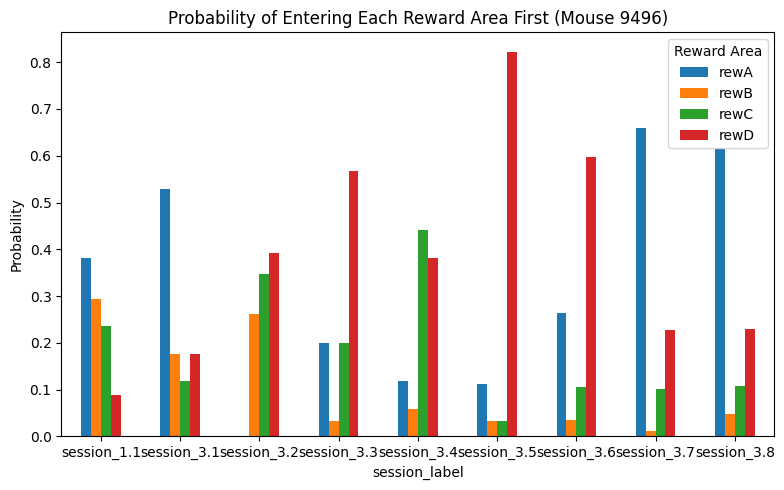


=== Mouse 9497 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_1.1    0.333333  0.259259  0.148148  0.259259
session_3.1    0.333333  0.200000  0.166667  0.300000
session_3.2    0.484848  0.030303  0.181818  0.303030
session_3.3    0.666667  0.104167  0.125000  0.104167
session_3.4    0.629630  0.074074  0.129630  0.166667
session_3.5    0.611111  0.074074  0.129630  0.185185
session_3.6    0.709677  0.016129  0.064516  0.209677
session_3.7    0.842105  0.017544  0.035088  0.105263
session_3.8    0.761905  0.047619  0.063492  0.126984


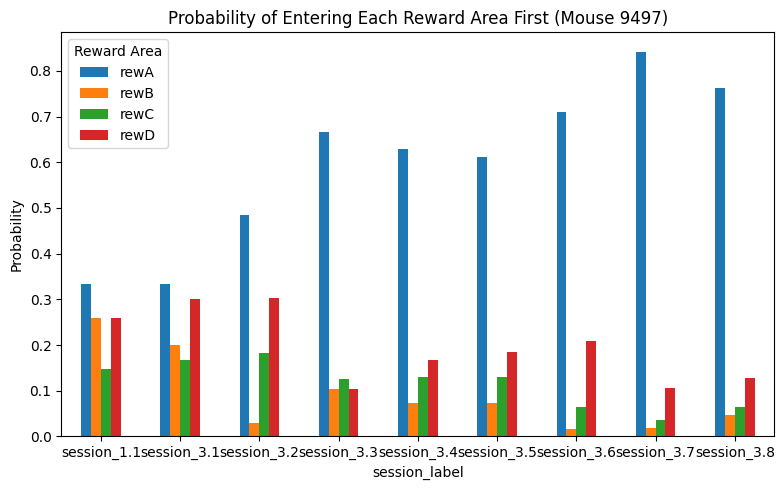


=== Mouse 8938 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session1.1     0.206897  0.275862  0.448276  0.068966
session_3.1    0.342857  0.400000  0.114286  0.142857
session_3.2    0.289855  0.362319  0.304348  0.043478
session_3.3    0.317460  0.253968  0.333333  0.095238
session_3.4    0.274725  0.153846  0.450549  0.120879
session_3.5    0.237113  0.164948  0.587629  0.010309
session_3.6    0.273810  0.047619  0.619048  0.059524
session_3.7    0.239583  0.062500  0.625000  0.072917
session_3.8    0.122807  0.070175  0.736842  0.070175
session_3.8    0.152778  0.000000  0.736111  0.111111
session_3.9    0.093458  0.196262  0.411215  0.299065
session_3.10   0.265152  0.045455  0.446970  0.242424
session_3.11   0.169643  0.133929  0.544643  0.151786
session_3.12   0.250000  0.250000  0.430000  0.070000


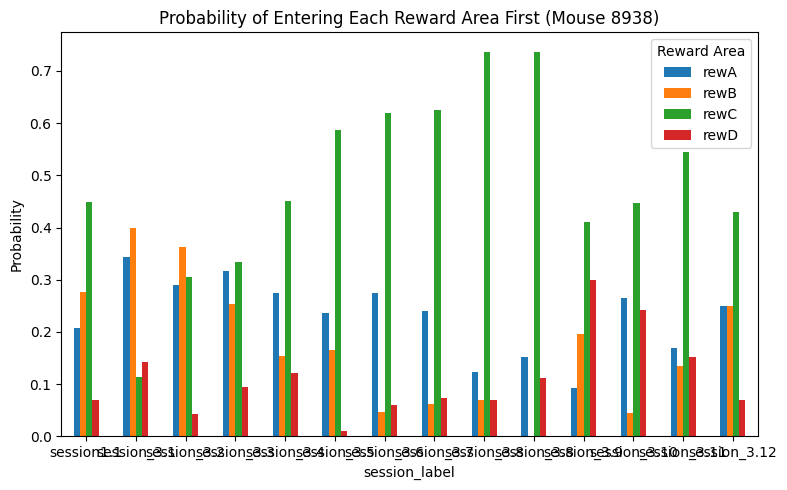


=== Mouse 8939 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session1.1     0.320000  0.240000  0.200000  0.240000
session3.1     0.400000  0.160000  0.360000  0.080000
session_3.1    0.000000  0.000000  0.000000  0.000000
session_3.2    0.333333  0.333333  0.083333  0.250000
session_3.3    0.333333  0.000000  0.555556  0.111111
session_3.4    0.195122  0.268293  0.390244  0.146341
session_3.5    0.117647  0.235294  0.588235  0.058824
session_3.6    0.250000  0.000000  0.687500  0.062500
session_3.7    0.090909  0.181818  0.727273  0.000000
session_3.8    0.000000  0.100000  0.900000  0.000000
session_3.8    0.000000  0.000000  0.916667  0.083333
session_3.9    0.000000  0.058824  0.882353  0.058824
session_3.10   0.000000  0.062500  0.875000  0.062500
session_3.11   0.000000  0.277778  0.666667  0.055556
session_3.12   0.111111  0.083333  0.638889  0.166667


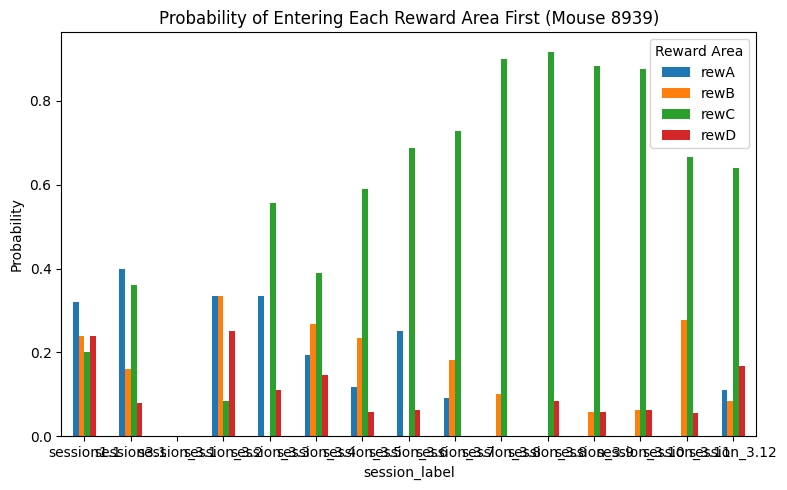


=== Mouse 8941 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session1.1     0.181818  0.227273  0.363636  0.227273
session_3.1    0.200000  0.233333  0.433333  0.133333
session_3.2    0.142857  0.285714  0.238095  0.333333
session_3.3    0.360000  0.120000  0.160000  0.360000
session_3.4    0.305556  0.111111  0.138889  0.444444
session_3.5    0.144928  0.260870  0.391304  0.202899
session_3.6    0.224490  0.183673  0.510204  0.081633
session_3.7    0.195122  0.207317  0.548780  0.048780
session_3.8    0.153846  0.138462  0.646154  0.061538
session_3.9    0.129870  0.077922  0.558442  0.233766
session_3.10   0.234694  0.071429  0.540816  0.153061
session_3.11   0.336957  0.097826  0.434783  0.130435
session_3.12   0.207317  0.170732  0.500000  0.121951


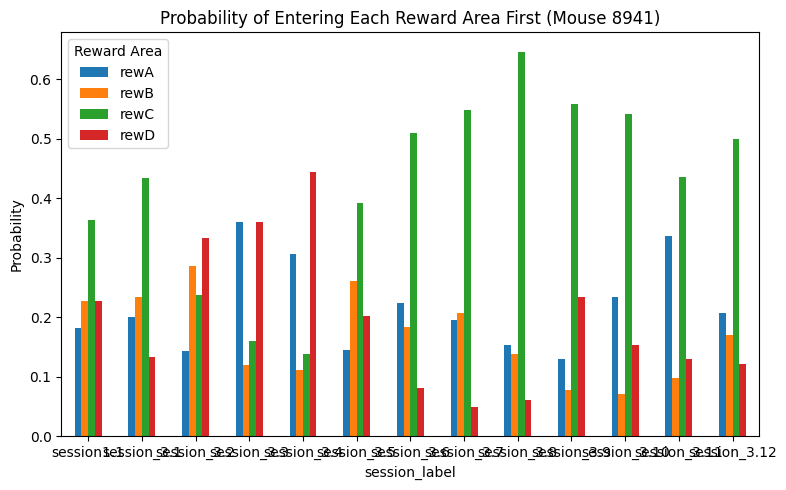


=== Mouse 9129 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session1.1     0.320000  0.240000  0.200000  0.240000
session1.1     0.000000  0.000000  0.000000  0.000000
session1.2     0.320000  0.240000  0.200000  0.240000
session_3.1    0.133333  0.266667  0.166667  0.433333
session_3.2    0.200000  0.133333  0.666667  0.000000
session_3.3    0.137931  0.068966  0.086207  0.706897
session_3.4    0.239130  0.086957  0.271739  0.402174
session_3.5    0.102941  0.029412  0.514706  0.352941
session_3.6    0.134615  0.067308  0.259615  0.538462
session_3.7    0.153061  0.061224  0.224490  0.561224
session_3.8    0.287770  0.107914  0.266187  0.338129
session_3.9    0.373984  0.056911  0.284553  0.284553
session_3.10   0.314286  0.190476  0.419048  0.076190
session_3.11   0.385827  0.078740  0.464567  0.070866
session_3.12   0.351145  0.045802  0.473282  0.129771


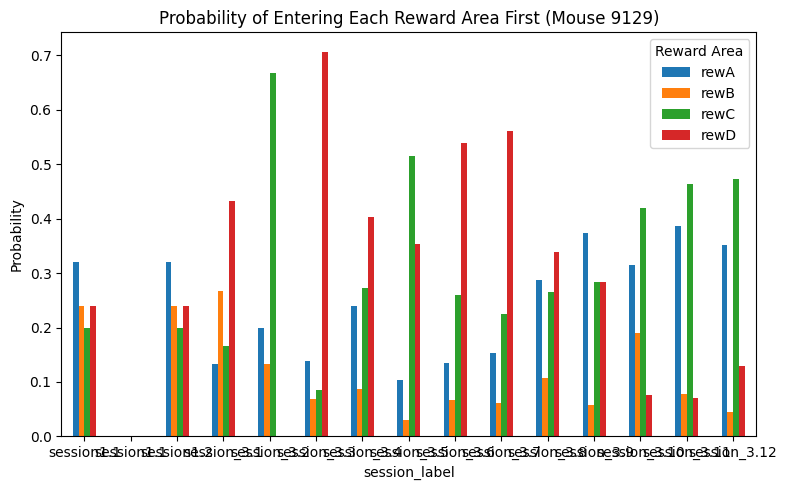


=== Mouse 9257 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_1.1    0.090909  0.181818  0.363636  0.363636
session_3.1    0.233333  0.400000  0.200000  0.166667
session_3.2    0.185185  0.148148  0.370370  0.296296
session_3.3    0.380952  0.095238  0.380952  0.142857
session_3.4    0.346939  0.244898  0.306122  0.102041
session_3.5    0.510204  0.306122  0.163265  0.020408
session_3.6    0.509434  0.226415  0.226415  0.037736
session_3.7    0.391304  0.260870  0.239130  0.108696
session_3.8    0.533333  0.088889  0.266667  0.111111


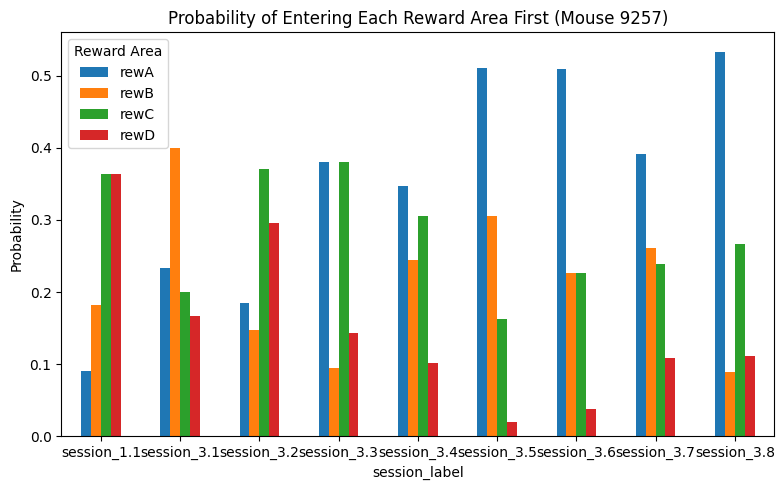


=== Mouse 9258 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_1.1    0.180000  0.240000  0.220000  0.360000
session_3.1    0.500000  0.058824  0.264706  0.176471
session_3.2    0.460000  0.000000  0.180000  0.360000
session_3.3    0.500000  0.184211  0.105263  0.210526
session_3.4    0.327273  0.109091  0.254545  0.309091
session_3.5    0.473684  0.052632  0.105263  0.368421
session_3.6    0.345455  0.018182  0.181818  0.454545
session_3.7    0.254902  0.098039  0.274510  0.372549
session_3.8    0.545455  0.136364  0.090909  0.227273


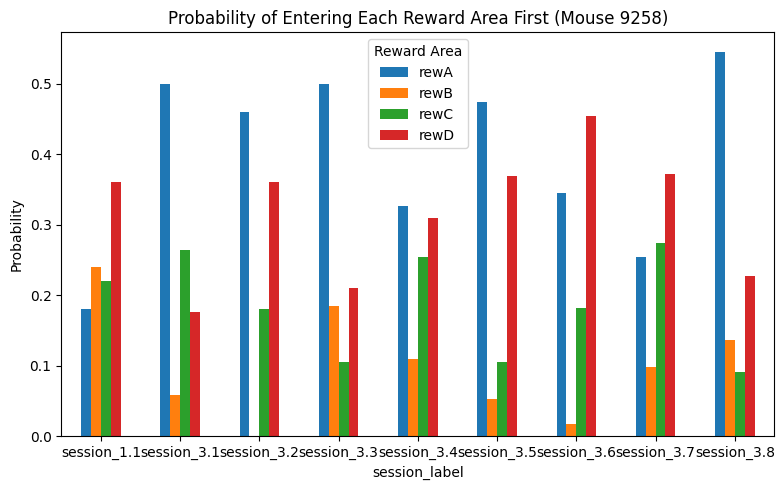


=== Mouse 9259 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_1.1    0.260870  0.217391  0.217391  0.304348
session_3.1    0.242424  0.090909  0.212121  0.454545
session_3.2    0.394737  0.131579  0.263158  0.210526
session_3.3    0.531250  0.062500  0.218750  0.187500
session_3.4    0.342857  0.057143  0.428571  0.171429
session_3.5    0.593220  0.084746  0.186441  0.135593
session_3.6    0.000000  1.000000  0.000000  0.000000
session_3.7    0.000000  0.534884  0.279070  0.186047
session_3.8    0.375000  0.321429  0.214286  0.089286


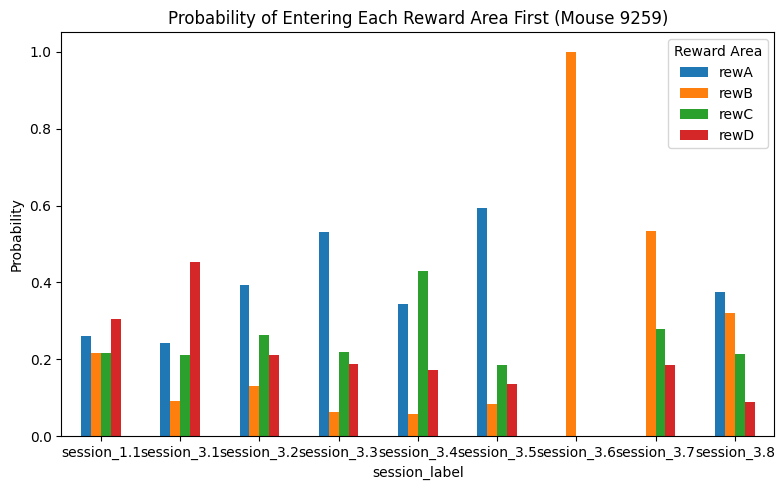


=== Mouse 9260 ===
                   rewA      rewB      rewC      rewD
session_label                                        
session_1.1    0.214286  0.214286  0.166667  0.404762
session_3.1    0.333333  0.111111  0.000000  0.555556
session_3.2    0.518519  0.074074  0.074074  0.333333
session_3.3    0.000000  1.000000  0.000000  0.000000
session_3.4    0.400000  0.088889  0.066667  0.444444
session_3.5    0.269231  0.019231  0.019231  0.692308
session_3.6    0.250000  0.020833  0.041667  0.687500
session_3.7    0.387755  0.061224  0.346939  0.204082
session_3.8    0.254545  0.127273  0.218182  0.400000


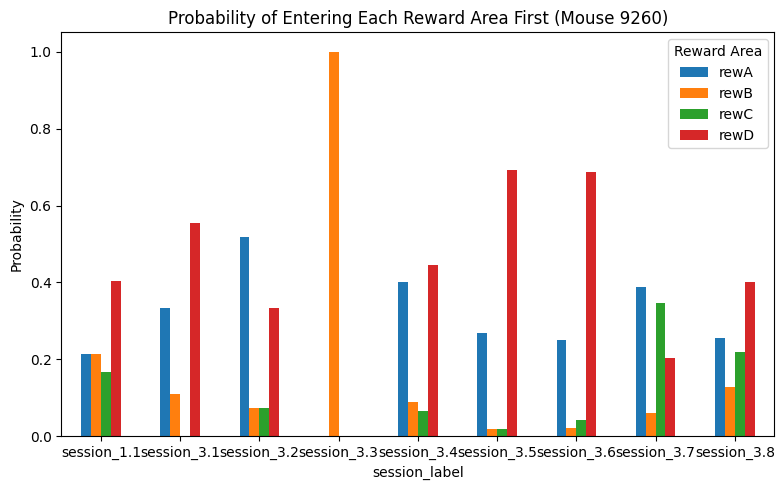

In [76]:
mice_that_matter = ["6357", "6359", "7999", "8001", "8002",
                    "9493", "9494", "9496", "9497",
                    "8938", "8939", "8941", "9129",
                    "9257", "9258", "9259", "9260"]

for mid in mice_that_matter:
    # Include both session1 and session3 files
    filepaths = [
        p for p in all_mice_sessions_sorted
        if mid in p and ("session1" in p or "session3" in p)
    ]

    if not filepaths:
        continue

    # Calculate entry probabilities per session
    entry_probs = calculate_entry_probabilities(filepaths)

    # Extract session labels (1.x or 3.x)
    entry_probs["session_label"] = [
        re.search(r"(session[_\s]?\d+\.\d+)", p, flags=re.I).group(1)
        if re.search(r"(session[_\s]?\d+\.\d+)", p, flags=re.I) else "session?.?"
        for p in entry_probs.index
    ]
    entry_probs = entry_probs.set_index("session_label")

    print(f"\n=== Mouse {mid} ===")
    print(entry_probs)

    # Plot per mouse
    plot_entry_probabilities(entry_probs, mouse_id=mid)


Plotting the mismatch vs hit ratios


Columns available: ['file', 'mismatch_count', 'hits', 'tot_active_trials', 'tot_trials', 'perc_wrong_rej_active', 'perc_wrong_rej_tot']


file  mismatch_count  hits  tot_active_trials  \
0    mouse6357_session3.1               3     3                 14   
1    mouse6357_session3.2               2     5                 18   
2    mouse6357_session3.3               0     1                 20   
3    mouse6357_session3.4               1     6                 34   
4    mouse6357_session3.5               0     6                 27   
..                    ...             ...   ...                ...   
148  mouse9497_session3.4               0     9                 54   
149  mouse9497_session3.5               0    10                 54   
150  mouse9497_session3.6               1    16                 62   
151  mouse9497_session3.7               0    11                 57   
152  mouse9497_session3.8               0    16                 63   

     tot_trials  perc_wrong_rej_active  perc_wrong_rej_tot  
0            21                  21.43               14.29  
1            25                  11.11                8.00  
2            39                   0.00                0.00  
3           124                   2.94                0.81  
4            57                   0.00                0.00  
..          ...                    ...                 ...  
148          81                   0.00                0.00  
149          70                   0.00                0.00  
150         106                   1.61                0.94  
151         105                   0.00                0.00  
152         107                   0.00                0.00  

[153 rows x 7 columns]

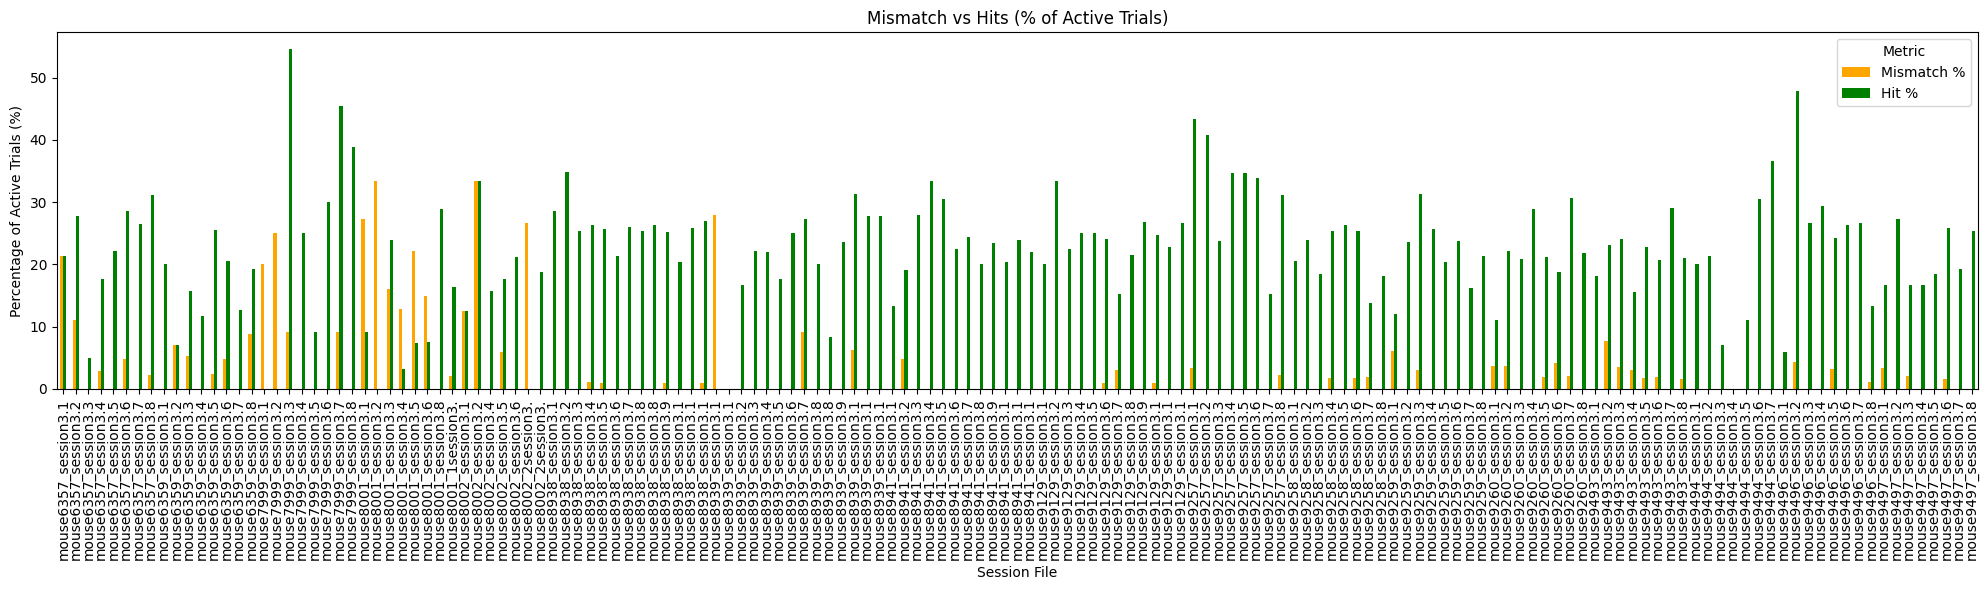

In [ ]:
# Load the summary
path = main_path+"/mismatch_summary.csv"
df = pd.read_csv(path)



print("Columns available:", df.columns.tolist())
display(df.head(len(df)))

# --- Compute percentages relative to active trials ---
df["perc_mismatch_act"] = (df["mismatch_count"] / df["tot_active_trials"] * 100).round(2)
df["perc_hits_act"]     = (df["hits"] / df["tot_active_trials"] * 100).round(2)

# --- Bar plot side by side ---
ax = df.plot(
    x="file",
    y=["perc_mismatch_act", "perc_hits_act"],
    kind="bar",
    figsize=(20,6),
    rot=90,
    color=["orange", "green"]
)

ax.set_ylabel("Percentage of Active Trials (%)")
ax.set_xlabel("Session File")
ax.set_title("Mismatch vs Hits (% of Active Trials)")
ax.legend(["Mismatch %", "Hit %"], title="Metric")

plt.tight_layout()
plt.show()


Plotting mismatchvs hit ratios with SD

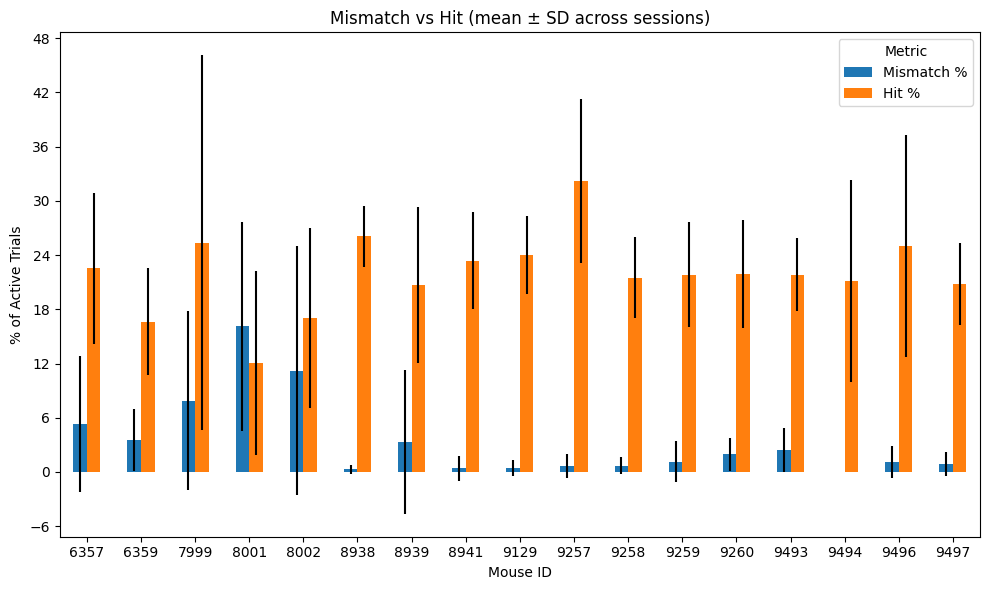

mismatch_mean_%  hit_mean_%  mismatch_sd_%  hit_sd_%  n_sessions
mouse_id                                                                  
6357                 5.31       22.54           7.50      8.33           8
6359                 3.53       16.61           3.46      5.91           8
7999                 7.90       25.37           9.94     20.74           8
8001                16.10       12.05          11.51     10.13           8
8002                11.20       17.03          13.76      9.99           7
8938                 0.31       26.06           0.49      3.39          13
8939                 3.33       20.73           7.96      8.62          14
8941                 0.40       23.39           1.37      5.35          12
9129                 0.41       23.98           0.91      4.33          12
9257                 0.69       32.20           1.32      9.04           8
9258                 0.70       21.52           0.97      4.51           8
9259                 1.15       21.83           2.27      5.84           8
9260                 1.94       21.92           1.79      6.01           8
9493                 2.44       21.83           2.46      4.04           8
9494                 0.00       21.13           0.00     11.18           7
9496                 1.10       25.02           1.74     12.26           8
9497                 0.88       20.79           1.30      4.58           8

In [77]:
from matplotlib.ticker import MaxNLocator

# --- load ---
path = main_path+"/mismatch_summary.csv"
df = pd.read_csv(path)

# make sure columns exist
needed = {"file","mismatch_count","hits","tot_active_trials"}
missing = needed - set(df.columns)
if missing:
    raise ValueError(f"CSV missing columns: {missing}")

# parse mouse_id and session label (optional)
df["mouse_id"] = df["file"].str.extract(r"mouse\s?(\d+)", expand=False)
df["session"]  = df["file"].str.extract(r"(session[_\s]?\d+\.\d+)", expand=False)

# per-session percentages
df["perc_mismatch_act"] = (df["mismatch_count"] / df["tot_active_trials"] * 100)
df["perc_hits_act"]     = (df["hits"]            / df["tot_active_trials"] * 100)

# aggregate per mouse: mean + SD + n
g = df.groupby("mouse_id")[["perc_mismatch_act","perc_hits_act"]]
mean = g.mean().sort_index()
sd   = g.std(ddof=1).reindex(mean.index)
n    = df.groupby("mouse_id").size()

# side-by-side bars with error bars
ax = mean.plot(
    kind="bar", y=["perc_mismatch_act","perc_hits_act"],
    yerr=sd[["perc_mismatch_act","perc_hits_act"]].T.values,
    figsize=(10,6), rot=0
)
ax.set_ylabel("% of Active Trials")
ax.set_xlabel("Mouse ID")
ax.set_title("Mismatch vs Hit (mean ± SD across sessions)")
ax.legend(["Mismatch %","Hit %"], title="Metric")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

# (optional) print the summary table
summary = mean.copy()
summary.columns = ["mismatch_mean_%","hit_mean_%"]
summary["mismatch_sd_%"] = sd["perc_mismatch_act"]
summary["hit_sd_%"]      = sd["perc_hits_act"]
summary["n_sessions"]    = n
display(summary.round(2))


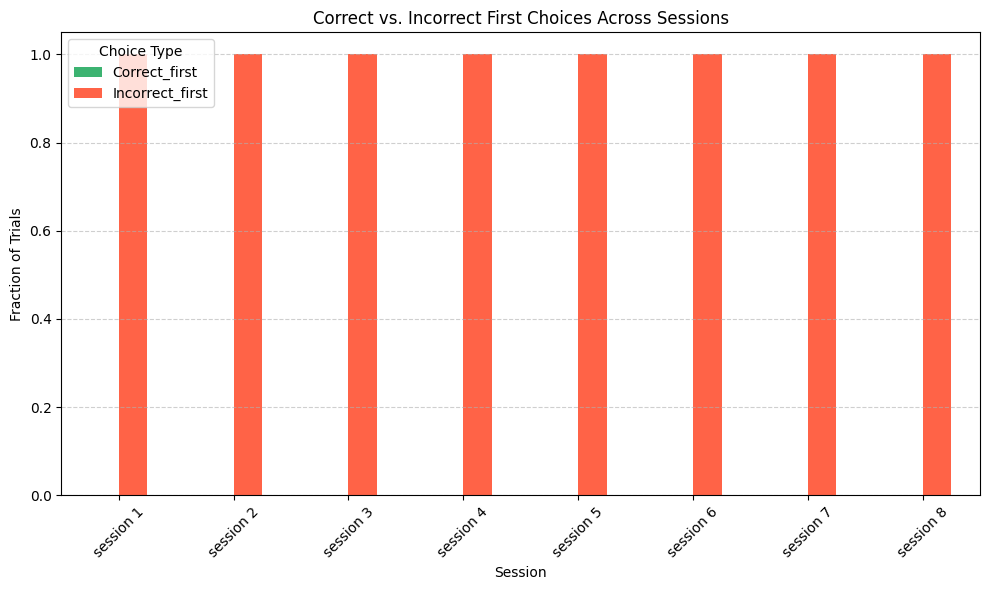

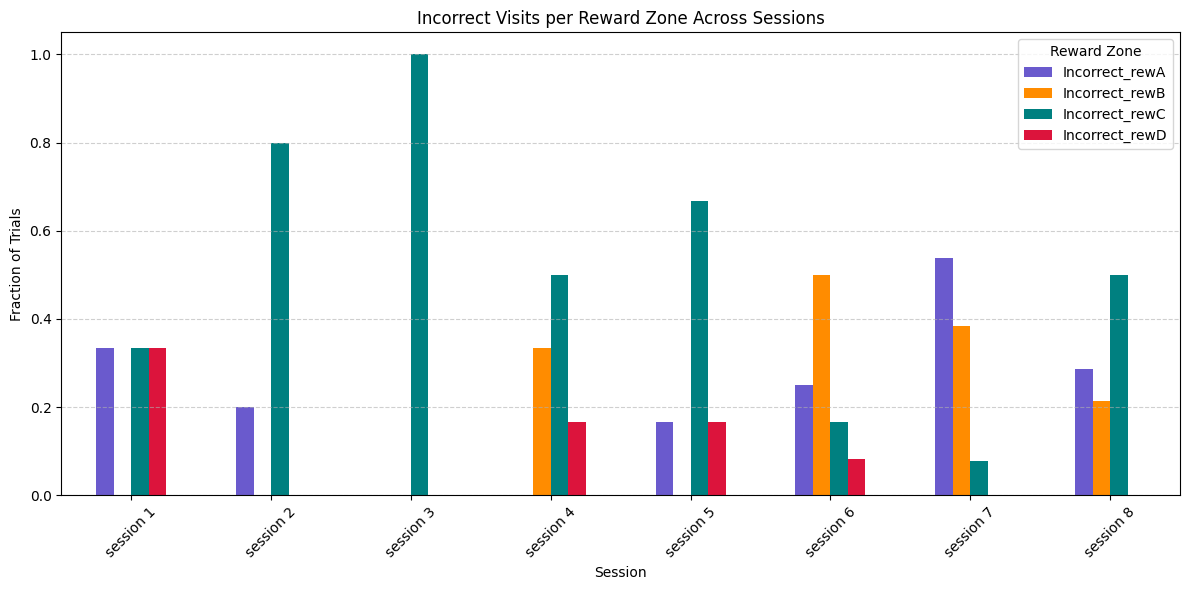

           Correct_first  Incorrect_first  Incorrect_rewA  Incorrect_rewB  \
session 1            0.0              1.0        0.333333        0.000000   
session 2            0.0              1.0        0.200000        0.000000   
session 3            0.0              1.0        0.000000        0.000000   
session 4            0.0              1.0        0.000000        0.333333   
session 5            0.0              1.0        0.166667        0.000000   
session 6            0.0              1.0        0.250000        0.500000   
session 7            0.0              1.0        0.538462        0.384615   
session 8            0.0              1.0        0.285714        0.214286   

           Incorrect_rewC  Incorrect_rewD  
session 1        0.333333        0.333333  
session 2        0.800000        0.000000  
session 3        1.000000        0.000000  
session 4        0.500000        0.166667  
session 5        0.666667        0.166667  
session 6        0.166667        0.083333 

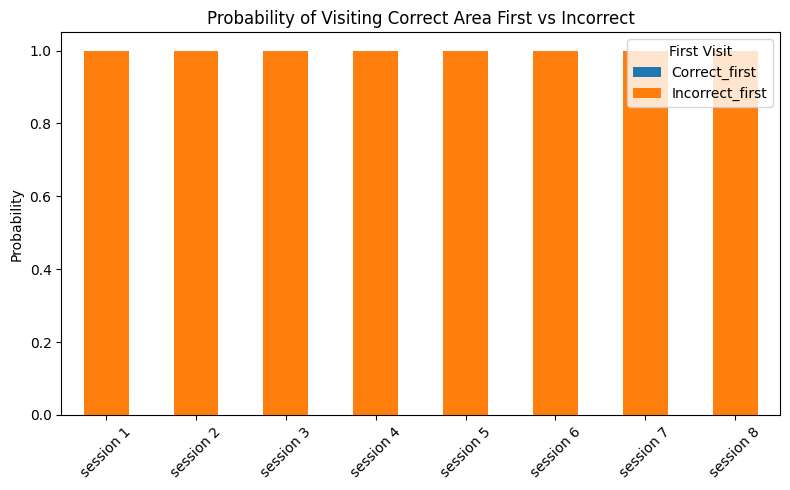

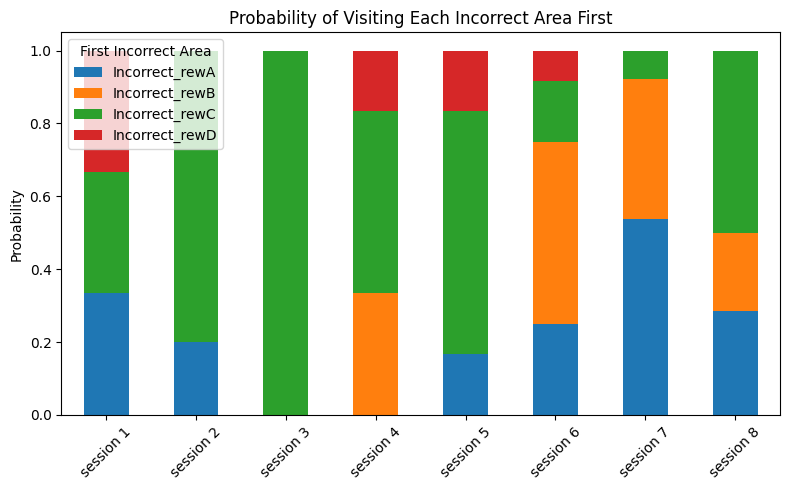

In [ ]:
def calculate_first_visit_probabilities(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)

        # Drop rows without data
        df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

        total_trials = len(df)
        if total_trials == 0:
            continue

        # Correct first visit
        correct_first = (df['first_reward_area_visited'] == df['area_rewarded']).sum()

        # Incorrect first visits (split by which area)
        incorrect_counts = df.loc[df['first_reward_area_visited'] != df['area_rewarded'], 'first_reward_area_visited'].value_counts()

        stats = {
            "Correct_first": correct_first / total_trials,
            "Incorrect_first": 1 - (correct_first / total_trials)
        }

        # Add per-area incorrect probabilities
        for area in ['rewA', 'rewB', 'rewC', 'rewD']:
            stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

        results[path] = stats

    return pd.DataFrame(results).T


def plot_first_visit_probabilities(summary_df):
    # Plot correct vs incorrect stacked
    summary_df[['Correct_first', 'Incorrect_first']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Probability of Visiting Correct Area First vs Incorrect")
    plt.legend(title="First Visit")
    plt.tight_layout()
    plt.show()

    # Plot breakdown of incorrect first visits by area
    incorrect_cols = [col for col in summary_df.columns if col.startswith("Incorrect_rew")]
    summary_df[incorrect_cols].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Probability of Visiting Each Incorrect Area First")
    plt.legend(title="First Incorrect Area")
    plt.tight_layout()
    plt.show()



In [ ]:


summary = calculate_first_visit_probabilities(filepaths)
# Rename index to session labels
summary.index = [f"session {i+1}" for i in range(len(summary))]
summary[['Correct_first', 'Incorrect_first']].plot.bar(
    figsize=(10, 6),
    color=['mediumseagreen', 'tomato']
)

plt.title("Correct vs. Incorrect First Choices Across Sessions")
plt.ylabel("Fraction of Trials")
plt.xlabel("Session")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Choice Type")
plt.tight_layout()
plt.show()

summary[['Incorrect_rewA', 'Incorrect_rewB', 'Incorrect_rewC', 'Incorrect_rewD']].plot.bar(
    figsize=(12, 6),
    color=['slateblue', 'darkorange', 'teal', 'crimson']
)

plt.title("Incorrect Visits per Reward Zone Across Sessions")
plt.ylabel("Fraction of Trials")
plt.xlabel("Session")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Reward Zone")
plt.tight_layout()
plt.show()

print(summary)

plot_first_visit_probabilities(summary)


    hit  miss  incorrect rew_location area_rewarded  time_to_reward  \
0   NaN   1.0        NaN            D           NaN             NaN   
1   1.0   NaN        NaN            A             A         10018.0   
2   NaN   NaN        1.0            D           NaN             NaN   
3   NaN   1.0        NaN            D           NaN             NaN   
4   NaN   1.0        NaN            D           NaN             NaN   
5   NaN   1.0        NaN            A           NaN             NaN   
6   NaN   1.0        NaN            A           NaN             NaN   
7   NaN   NaN        1.0            C           NaN             NaN   
8   NaN   NaN        1.0            D           NaN             NaN   
9   NaN   1.0        NaN            A           NaN             NaN   
10  NaN   1.0        NaN            A           NaN             NaN   
11  NaN   NaN        1.0            A           NaN             NaN   
12  NaN   1.0        NaN            D           NaN             NaN   
13  Na

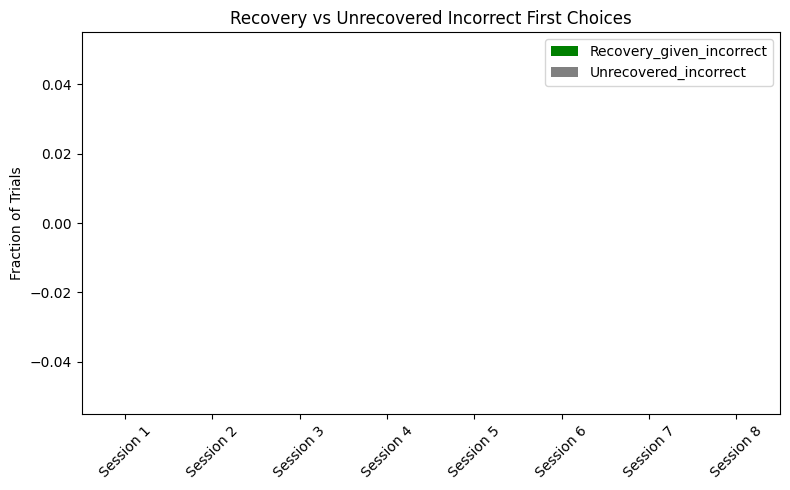

           Correct_first  Incorrect_first  Recovery_given_incorrect  \
Session 1            1.0              0.0                       0.0   
Session 2            1.0              0.0                       0.0   
Session 3            1.0              0.0                       0.0   
Session 4            1.0              0.0                       0.0   
Session 5            1.0              0.0                       0.0   
Session 6            1.0              0.0                       0.0   
Session 7            1.0              0.0                       0.0   
Session 8            1.0              0.0                       0.0   

           Mean_latency_correct  Mean_latency_incorrect   Latency_cost  \
Session 1         519298.666667                     0.0 -519298.666667   
Session 2         244739.000000                     0.0 -244739.000000   
Session 3         139855.000000                     0.0 -139855.000000   
Session 4         106548.166667                     0.0 -106548.

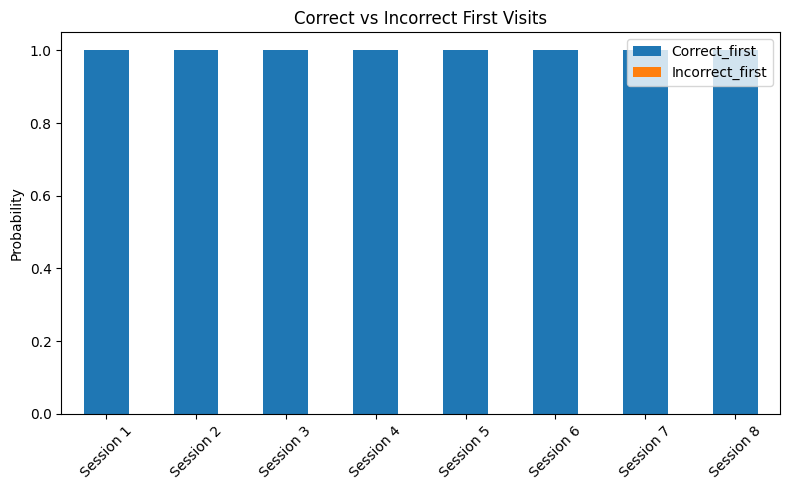

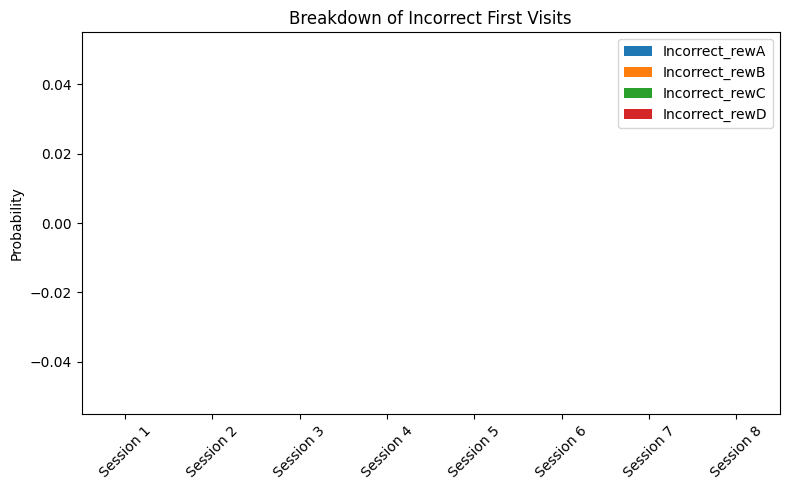

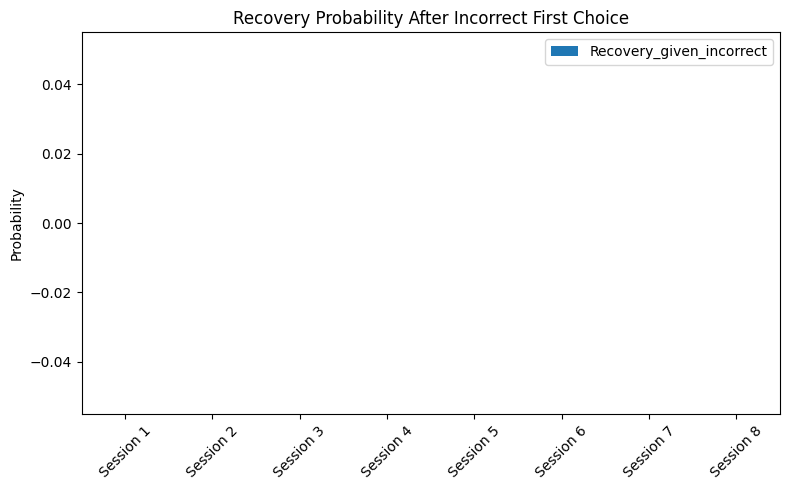

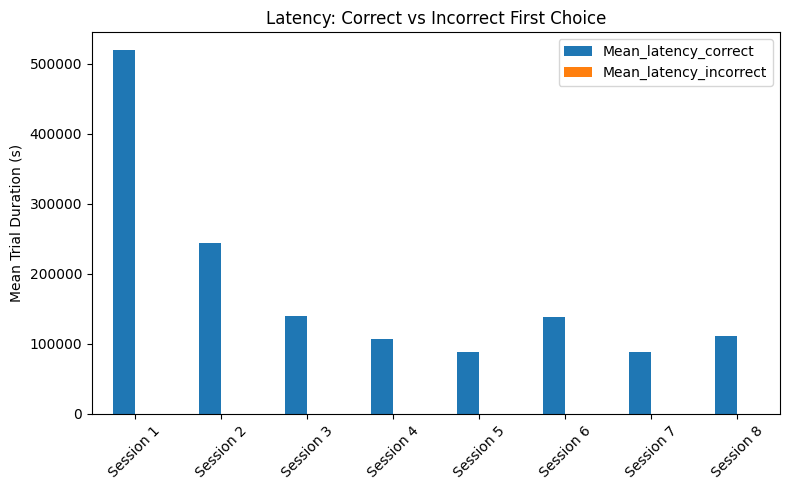

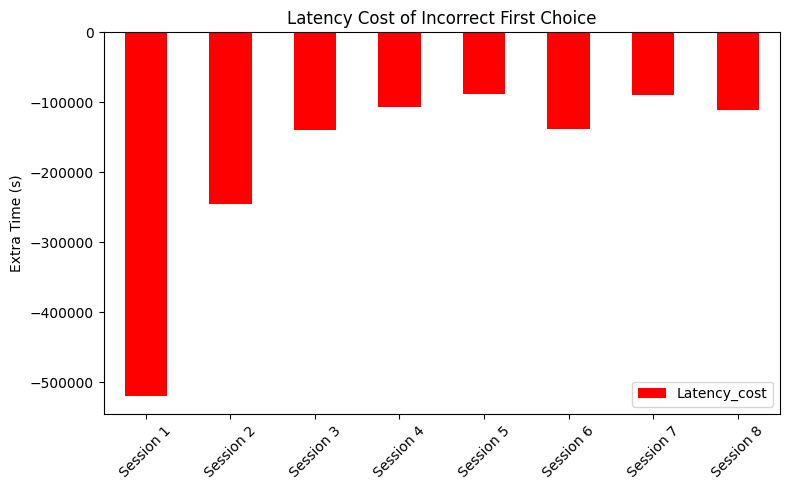

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_first_visit_recovery_latency(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)
        print(df)

        # Drop missing rows
        df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

        # Calculate trial duration
        df['trial_duration'] = df['end_trial_time'] - df['trial_start_time']

        

        total_trials = len(df)
        if total_trials == 0:
            continue

        # Correct first visit
        correct_df = df[df['first_reward_area_visited'] == df['area_rewarded']]
        incorrect_df = df[df['first_reward_area_visited'] != df['area_rewarded']]

        correct_first = len(correct_df)
        incorrect_first = len(incorrect_df)

        # Recovery rate (hit correct eventually)
        recovery_trials = incorrect_df[(incorrect_df['hit'] == 1) & (incorrect_df['rew_location'] == incorrect_df['area_rewarded'])]
        recovery_count = len(recovery_trials)

        # Mean latencies
        mean_correct_latency = correct_df['trial_duration'].mean() if len(correct_df) > 0 else 0
        mean_incorrect_latency = incorrect_df['trial_duration'].mean() if len(incorrect_df) > 0 else 0
        latency_cost = mean_incorrect_latency - mean_correct_latency

        # Incorrect breakdown
        incorrect_counts = incorrect_df['first_reward_area_visited'].value_counts()

        stats = {
            "Correct_first": correct_first / total_trials,
            "Incorrect_first": incorrect_first / total_trials,
            "Recovery_given_incorrect": recovery_count / incorrect_first if incorrect_first > 0 else 0,
            "Mean_latency_correct": mean_correct_latency,
            "Mean_latency_incorrect": mean_incorrect_latency,
            "Latency_cost": latency_cost
        }

        # Breakdown of incorrect first visits
        for area in ['rewA', 'rewB', 'rewC', 'rewD']:
            stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

        results[path] = stats

    return pd.DataFrame(results).T


def plot_first_visit_recovery_latency(summary_df):
    # Correct vs incorrect first
    summary_df[['Correct_first', 'Incorrect_first']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Correct vs Incorrect First Visits")
    plt.tight_layout()
    plt.show()

    # Breakdown incorrect
    incorrect_cols = [c for c in summary_df.columns if c.startswith("Incorrect_rew")]
    summary_df[incorrect_cols].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Breakdown of Incorrect First Visits")
    plt.tight_layout()
    plt.show()

    # Recovery
    summary_df[['Recovery_given_incorrect']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Recovery Probability After Incorrect First Choice")
    plt.tight_layout()
    plt.show()

    # Latency cost
    summary_df[['Mean_latency_correct', 'Mean_latency_incorrect']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Mean Trial Duration (s)")
    plt.title("Latency: Correct vs Incorrect First Choice")
    plt.tight_layout()
    plt.show()

    summary_df[['Latency_cost']].plot(
        kind='bar', figsize=(8, 5), rot=45, color="red")
    plt.ylabel("Extra Time (s)")
    plt.title("Latency Cost of Incorrect First Choice")
    plt.tight_layout()
    plt.show()


# # Example usage

# filepaths = [
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/session 3.1/session_data_2024-08-19_12_36_04.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-21_11_14_226357session3.2/session_data_2024-08-21_11_14_22.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-22_14_33_316357session3.3/session_data_2024-08-22_14_33_31.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-23_10_42_226357session3.4/session_data_2024-08-23_10_42_22.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-27_13_05_196357session3.5/session_data_2024-08-27_13_05_19.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-28_11_58_146357session3.6/session_data_2024-08-28_11_58_14.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-29_10_23_026357session3.7/session_data_2024-08-29_10_23_02.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-30_10_07_556357session3.8/session_data_2024-08-30_10_07_55.csv"
# ]

# summary = calculate_first_visit_recovery_latency(filepaths)
# summary.index = [f"Session {i+1}" for i in range(len(summary))]
# summary['Unrecovered_incorrect'] = summary['Incorrect_first'] - (summary['Recovery_given_incorrect'] * summary['Incorrect_first'])

# summary[['Recovery_given_incorrect', 'Unrecovered_incorrect']].plot(
#     kind='bar', stacked=True, figsize=(8, 5), rot=45, color=['green', 'gray']
# )
# plt.ylabel("Fraction of Trials")
# plt.title("Recovery vs Unrecovered Incorrect First Choices")
# plt.tight_layout()
# plt.show()

# print(summary)

# plot_first_visit_recovery_latency(summary)


> # Now use the clean datasets to find the latency

In [ ]:

results = {}

for path in filepaths:
    df = pd.read_csv(path)
    

    # Drop missing rows
    df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

    # Calculate trial duration
    df['trial_duration'] = df['end_trial_time'] - df['trial_start_time']

    df["first_reward_area_visited"] = df["first_reward_area_visited"].astype(str).str[-1]

    total_trials = len(df)
    if total_trials == 0:
        continue

    # Correct first visit -- 
    correct_df = df[df['first_reward_area_visited'] == df['area_rewarded']]
    incorrect_df = df[df['first_reward_area_visited'] != df['area_rewarded']]

    correct_first = len(correct_df)
    incorrect_first = len(incorrect_df)

    # Recovery rate (hit correct eventually)
    recovery_trials = incorrect_df[(incorrect_df['hit'] == 1.0) & (incorrect_df['rew_location'] == incorrect_df['area_rewarded'])]
    recovery_count = len(recovery_trials)

    # Mean latencies
    mean_correct_latency = correct_df['trial_duration'].mean() if len(correct_df) > 0 else 0
    mean_incorrect_latency = incorrect_df['trial_duration'].mean() if len(incorrect_df) > 0 else 0
    latency_cost = mean_incorrect_latency - mean_correct_latency

    # Incorrect breakdown
    incorrect_counts = incorrect_df['first_reward_area_visited'].value_counts()

    stats = {
        "Correct_first": correct_first / total_trials,
        "Incorrect_first": incorrect_first / total_trials,
        "Recovery_given_incorrect": recovery_count / incorrect_first if incorrect_first > 0 else 0,
        "Mean_latency_correct": mean_correct_latency,
        "Mean_latency_incorrect": mean_incorrect_latency,
        "Latency_cost": latency_cost
    }

    # Breakdown of incorrect first visits
    for area in ['rewA', 'rewB', 'rewC', 'rewD']:
        stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

    results[path] = stats



TypeError: unhashable type: 'Series'